# Mount my drive:

In [1]:
#Import drive
from google.colab import drive
#Mount Google Drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
os.chdir('drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2')
!ls

config.py   distributions  README.md	     trained_models
data	    experiments    requirements.txt  utils
DataLoader  __pycache__    results	     visualize


# Import:

In [0]:
!pip install pytorch-ignite

In [0]:
try:
  from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
  from ignite.metrics import Accuracy, Loss, ConfusionMatrix
  from ignite.handlers import ModelCheckpoint
  from utils.training import run, evaluate
except ImportError:
  raise RuntimeError("no module Ignite, to install Ignite: 'pip install pytorch-ignite'.")

from tqdm import tqdm

In [0]:
import torch
from torch import nn
from torch.optim import SGD
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision.transforms import Compose, ToTensor, Normalize
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

from utils.models import get_my_model_MNIST, fetch_last_checkpoint_model_filename
from DataLoader.dataLoaders import get_mnist_dataloaders
from utils.functions import Hardsigmoid

# Dataset:

In [4]:
batch_size_train = 10000
batch_size_test = 1000
# Dataset
train_loader, valid_loader, test_loader, classes = get_mnist_dataloaders(batch_size_train, batch_size_test)

Number of validation examples: 6000
Number of training examples: 6
Number of testing examples: 10


# Training: with bias

## Training parameters:

In [0]:
epochs = 50
lr = 1e-3
momentum = 0.5
log_interval = 10  # how many batches to wait before logging training status
criterion =  F.nll_loss

## Run No binary network:

In [0]:
# parameters model to load no Binary model
binary = False

model, name_model = get_my_model_MNIST(binary)
print(name_model)

MNIST_NonBinaryNet


ITERATION - loss: 0.26: 100%|█████████▉| 1680/1688 [00:20<00:00, 147.59it/s]

Training Results - Epoch: 1  Avg accuracy: 91.89 Avg loss: 0.32


ITERATION - loss: 0.19:   1%|          | 20/1688 [00:21<04:12,  6.60it/s]   

Validation Results - Epoch: 1  Avg accuracy: 92.23 Avg loss: 0.31


ITERATION - loss: 0.28: 1690it [00:41, 127.42it/s]

Training Results - Epoch: 2  Avg accuracy: 94.13 Avg loss: 0.22


ITERATION - loss: 0.23:   1%|          | 20/1688 [00:42<04:10,  6.66it/s]

Validation Results - Epoch: 2  Avg accuracy: 94.37 Avg loss: 0.22


ITERATION - loss: 0.13: 1690it [01:03, 147.82it/s]

Training Results - Epoch: 3  Avg accuracy: 95.11 Avg loss: 0.18


ITERATION - loss: 0.07:   1%|          | 20/1688 [01:04<04:09,  6.69it/s]

Validation Results - Epoch: 3  Avg accuracy: 95.28 Avg loss: 0.18


ITERATION - loss: 0.18: 1690it [01:24, 129.09it/s]

Training Results - Epoch: 4  Avg accuracy: 95.69 Avg loss: 0.16


ITERATION - loss: 0.21:   1%|          | 20/1688 [01:25<04:07,  6.74it/s]

Validation Results - Epoch: 4  Avg accuracy: 95.75 Avg loss: 0.16


ITERATION - loss: 0.32: 1690it [01:46, 140.66it/s]

Training Results - Epoch: 5  Avg accuracy: 96.10 Avg loss: 0.14


ITERATION - loss: 0.18:   1%|          | 20/1688 [01:47<04:07,  6.74it/s]

Validation Results - Epoch: 5  Avg accuracy: 96.12 Avg loss: 0.14


ITERATION - loss: 0.19: 100%|█████████▉| 1680/1688 [02:07<00:00, 144.36it/s]

Training Results - Epoch: 6  Avg accuracy: 96.51 Avg loss: 0.12


ITERATION - loss: 0.04:   1%|          | 20/1688 [02:08<04:08,  6.72it/s]   

Validation Results - Epoch: 6  Avg accuracy: 96.42 Avg loss: 0.13


ITERATION - loss: 0.18: 1690it [02:28, 143.30it/s]

Training Results - Epoch: 7  Avg accuracy: 96.81 Avg loss: 0.11


ITERATION - loss: 0.05:   1%|          | 20/1688 [02:29<04:18,  6.46it/s]

Validation Results - Epoch: 7  Avg accuracy: 96.75 Avg loss: 0.12


ITERATION - loss: 0.06: 1690it [02:50, 146.16it/s]

Training Results - Epoch: 8  Avg accuracy: 97.09 Avg loss: 0.11


ITERATION - loss: 0.06:   1%|          | 20/1688 [02:51<04:16,  6.51it/s]

Validation Results - Epoch: 8  Avg accuracy: 96.98 Avg loss: 0.11


ITERATION - loss: 0.08: 1690it [03:12, 145.59it/s]

Training Results - Epoch: 9  Avg accuracy: 97.25 Avg loss: 0.10


ITERATION - loss: 0.03:   1%|          | 20/1688 [03:13<04:08,  6.72it/s]

Validation Results - Epoch: 9  Avg accuracy: 97.08 Avg loss: 0.10


ITERATION - loss: 0.05: 1690it [03:33, 133.96it/s]

Training Results - Epoch: 10  Avg accuracy: 97.43 Avg loss: 0.09


ITERATION - loss: 0.02:   1%|          | 20/1688 [03:34<04:19,  6.43it/s]

Validation Results - Epoch: 10  Avg accuracy: 97.23 Avg loss: 0.10


ITERATION - loss: 0.07: 100%|█████████▉| 1680/1688 [03:55<00:00, 144.27it/s]

Training Results - Epoch: 11  Avg accuracy: 97.57 Avg loss: 0.09


ITERATION - loss: 0.09:   1%|          | 20/1688 [03:56<04:03,  6.86it/s]   

Validation Results - Epoch: 11  Avg accuracy: 97.32 Avg loss: 0.10


ITERATION - loss: 0.06: 1690it [04:16, 144.07it/s]

Training Results - Epoch: 12  Avg accuracy: 97.58 Avg loss: 0.09


ITERATION - loss: 0.04:   1%|          | 20/1688 [04:17<04:09,  6.68it/s]

Validation Results - Epoch: 12  Avg accuracy: 97.37 Avg loss: 0.09


ITERATION - loss: 0.12: 1690it [04:37, 144.24it/s]

Training Results - Epoch: 13  Avg accuracy: 97.82 Avg loss: 0.08


ITERATION - loss: 0.12:   1%|          | 20/1688 [04:38<04:06,  6.76it/s]

Validation Results - Epoch: 13  Avg accuracy: 97.63 Avg loss: 0.09


ITERATION - loss: 0.06: 1690it [04:58, 147.19it/s]

Training Results - Epoch: 14  Avg accuracy: 97.81 Avg loss: 0.08


ITERATION - loss: 0.02:   1%|          | 20/1688 [04:59<04:07,  6.75it/s]

Validation Results - Epoch: 14  Avg accuracy: 97.55 Avg loss: 0.09


ITERATION - loss: 0.02: 1690it [05:20, 148.37it/s]

Training Results - Epoch: 15  Avg accuracy: 97.97 Avg loss: 0.07


ITERATION - loss: 0.23:   1%|          | 20/1688 [05:21<04:11,  6.62it/s]

Validation Results - Epoch: 15  Avg accuracy: 97.75 Avg loss: 0.08


ITERATION - loss: 0.07: 100%|█████████▉| 1680/1688 [05:41<00:00, 144.82it/s]

Training Results - Epoch: 16  Avg accuracy: 98.04 Avg loss: 0.07


ITERATION - loss: 0.07:   1%|          | 20/1688 [05:42<04:03,  6.84it/s]   

Validation Results - Epoch: 16  Avg accuracy: 97.75 Avg loss: 0.08


ITERATION - loss: 0.02: 1690it [06:02, 147.27it/s]

Training Results - Epoch: 17  Avg accuracy: 98.07 Avg loss: 0.07


ITERATION - loss: 0.02:   1%|          | 20/1688 [06:03<04:03,  6.85it/s]

Validation Results - Epoch: 17  Avg accuracy: 97.70 Avg loss: 0.08


ITERATION - loss: 0.03: 1690it [06:23, 148.85it/s]

Training Results - Epoch: 18  Avg accuracy: 98.11 Avg loss: 0.07


ITERATION - loss: 0.02:   1%|          | 20/1688 [06:24<04:05,  6.79it/s]

Validation Results - Epoch: 18  Avg accuracy: 97.80 Avg loss: 0.08


ITERATION - loss: 0.03: 1690it [06:44, 136.27it/s]

Training Results - Epoch: 19  Avg accuracy: 98.18 Avg loss: 0.07


ITERATION - loss: 0.01:   1%|          | 20/1688 [06:45<04:12,  6.59it/s]

Validation Results - Epoch: 19  Avg accuracy: 97.82 Avg loss: 0.08


ITERATION - loss: 0.16: 1690it [07:06, 147.37it/s]

Training Results - Epoch: 20  Avg accuracy: 98.29 Avg loss: 0.06


ITERATION - loss: 0.16: 1690it [07:07, 147.37it/s]

Validation Results - Epoch: 20  Avg accuracy: 97.78 Avg loss: 0.07


ITERATION - loss: 0.11: 100%|█████████▉| 1680/1688 [07:27<00:00, 148.76it/s]

Training Results - Epoch: 21  Avg accuracy: 98.30 Avg loss: 0.06


ITERATION - loss: 0.05:   1%|          | 20/1688 [07:28<04:12,  6.61it/s]   

Validation Results - Epoch: 21  Avg accuracy: 97.80 Avg loss: 0.07


ITERATION - loss: 0.08: 1690it [07:49, 144.86it/s]

Training Results - Epoch: 22  Avg accuracy: 98.36 Avg loss: 0.06


ITERATION - loss: 0.03:   1%|          | 20/1688 [07:50<04:04,  6.83it/s]

Validation Results - Epoch: 22  Avg accuracy: 97.92 Avg loss: 0.07


ITERATION - loss: 0.04: 1690it [08:10, 146.10it/s]

Training Results - Epoch: 23  Avg accuracy: 98.43 Avg loss: 0.06


ITERATION - loss: 0.03:   1%|          | 20/1688 [08:11<04:08,  6.72it/s]

Validation Results - Epoch: 23  Avg accuracy: 97.90 Avg loss: 0.07


ITERATION - loss: 0.14: 1690it [08:31, 146.94it/s]

Training Results - Epoch: 24  Avg accuracy: 98.40 Avg loss: 0.06


ITERATION - loss: 0.01:   1%|          | 20/1688 [08:32<04:02,  6.87it/s]

Validation Results - Epoch: 24  Avg accuracy: 97.88 Avg loss: 0.07


ITERATION - loss: 0.13: 1690it [08:51, 138.01it/s]

Training Results - Epoch: 25  Avg accuracy: 98.40 Avg loss: 0.06


ITERATION - loss: 0.01:   1%|          | 20/1688 [08:52<04:02,  6.87it/s]

Validation Results - Epoch: 25  Avg accuracy: 97.98 Avg loss: 0.07


ITERATION - loss: 0.04: 100%|█████████▉| 1680/1688 [09:12<00:00, 150.12it/s]

Training Results - Epoch: 26  Avg accuracy: 98.49 Avg loss: 0.05


ITERATION - loss: 0.02:   1%|          | 20/1688 [09:13<04:00,  6.93it/s]   

Validation Results - Epoch: 26  Avg accuracy: 98.03 Avg loss: 0.07


ITERATION - loss: 0.02: 1690it [09:34, 133.84it/s]

Training Results - Epoch: 27  Avg accuracy: 98.59 Avg loss: 0.05


ITERATION - loss: 0.02:   1%|          | 20/1688 [09:35<04:18,  6.45it/s]

Validation Results - Epoch: 27  Avg accuracy: 98.07 Avg loss: 0.07


ITERATION - loss: 0.05: 1690it [09:56, 146.09it/s]

Training Results - Epoch: 28  Avg accuracy: 98.60 Avg loss: 0.05


ITERATION - loss: 0.01:   1%|          | 20/1688 [09:57<04:07,  6.74it/s]

Validation Results - Epoch: 28  Avg accuracy: 97.97 Avg loss: 0.07


ITERATION - loss: 0.16: 1690it [10:17, 148.30it/s]

Training Results - Epoch: 29  Avg accuracy: 98.63 Avg loss: 0.05


ITERATION - loss: 0.01:   1%|          | 20/1688 [10:18<04:11,  6.63it/s]

Validation Results - Epoch: 29  Avg accuracy: 97.97 Avg loss: 0.07


ITERATION - loss: 0.02: 1690it [10:39, 137.84it/s]

Training Results - Epoch: 30  Avg accuracy: 98.65 Avg loss: 0.05


ITERATION - loss: 0.01:   1%|          | 20/1688 [10:40<04:07,  6.73it/s]

Validation Results - Epoch: 30  Avg accuracy: 98.05 Avg loss: 0.07


ITERATION - loss: 0.05: 100%|█████████▉| 1680/1688 [11:00<00:00, 147.55it/s]

Training Results - Epoch: 31  Avg accuracy: 98.66 Avg loss: 0.05


ITERATION - loss: 0.03:   1%|          | 20/1688 [11:01<04:06,  6.76it/s]   

Validation Results - Epoch: 31  Avg accuracy: 98.08 Avg loss: 0.07


ITERATION - loss: 0.07: 1690it [11:21, 146.36it/s]

Training Results - Epoch: 32  Avg accuracy: 98.61 Avg loss: 0.05


ITERATION - loss: 0.03:   1%|          | 20/1688 [11:22<04:12,  6.61it/s]

Validation Results - Epoch: 32  Avg accuracy: 98.00 Avg loss: 0.07


ITERATION - loss: 0.15: 1690it [11:42, 127.85it/s]

Training Results - Epoch: 33  Avg accuracy: 98.70 Avg loss: 0.05


ITERATION - loss: 0.05:   1%|          | 20/1688 [11:43<04:05,  6.78it/s]

Validation Results - Epoch: 33  Avg accuracy: 98.13 Avg loss: 0.07


ITERATION - loss: 0.02: 1690it [12:03, 146.65it/s]

Training Results - Epoch: 34  Avg accuracy: 98.72 Avg loss: 0.05


ITERATION - loss: 0.13:   1%|          | 20/1688 [12:04<04:05,  6.80it/s]

Validation Results - Epoch: 34  Avg accuracy: 98.15 Avg loss: 0.06


ITERATION - loss: 0.01: 1690it [12:24, 145.69it/s]

Training Results - Epoch: 35  Avg accuracy: 98.77 Avg loss: 0.05


ITERATION - loss: 0.04:   1%|          | 20/1688 [12:25<04:07,  6.74it/s]

Validation Results - Epoch: 35  Avg accuracy: 98.13 Avg loss: 0.06


ITERATION - loss: 0.01: 100%|█████████▉| 1680/1688 [12:46<00:00, 133.72it/s]

Training Results - Epoch: 36  Avg accuracy: 98.77 Avg loss: 0.05


ITERATION - loss: 0.07:   1%|          | 20/1688 [12:47<04:06,  6.75it/s]   

Validation Results - Epoch: 36  Avg accuracy: 98.15 Avg loss: 0.06


ITERATION - loss: 0.01: 1690it [13:08, 139.04it/s]

Training Results - Epoch: 37  Avg accuracy: 98.80 Avg loss: 0.04


ITERATION - loss: 0.01:   1%|          | 20/1688 [13:09<04:12,  6.61it/s]

Validation Results - Epoch: 37  Avg accuracy: 98.22 Avg loss: 0.06


ITERATION - loss: 0.09: 1690it [13:29, 151.09it/s]

Training Results - Epoch: 38  Avg accuracy: 98.78 Avg loss: 0.04


ITERATION - loss: 0.04:   1%|          | 20/1688 [13:30<04:11,  6.63it/s]

Validation Results - Epoch: 38  Avg accuracy: 98.17 Avg loss: 0.06


ITERATION - loss: 0.02: 1690it [13:50, 141.46it/s]

Training Results - Epoch: 39  Avg accuracy: 98.86 Avg loss: 0.04


ITERATION - loss: 0.02:   1%|          | 20/1688 [13:52<04:10,  6.66it/s]

Validation Results - Epoch: 39  Avg accuracy: 98.20 Avg loss: 0.06


ITERATION - loss: 0.00: 1690it [14:12, 147.87it/s]

Training Results - Epoch: 40  Avg accuracy: 98.86 Avg loss: 0.04


ITERATION - loss: 0.12:   1%|          | 20/1688 [14:13<04:14,  6.56it/s]

Validation Results - Epoch: 40  Avg accuracy: 98.17 Avg loss: 0.06


ITERATION - loss: 0.02: 100%|█████████▉| 1680/1688 [14:33<00:00, 148.36it/s]

Training Results - Epoch: 41  Avg accuracy: 98.89 Avg loss: 0.04


ITERATION - loss: 0.00:   1%|          | 20/1688 [14:34<04:13,  6.59it/s]   

Validation Results - Epoch: 41  Avg accuracy: 98.13 Avg loss: 0.06


ITERATION - loss: 0.03: 1690it [14:54, 141.01it/s]

Training Results - Epoch: 42  Avg accuracy: 98.89 Avg loss: 0.04


ITERATION - loss: 0.03:   1%|          | 20/1688 [14:55<04:05,  6.80it/s]

Validation Results - Epoch: 42  Avg accuracy: 98.18 Avg loss: 0.06


ITERATION - loss: 0.04: 1690it [15:15, 143.54it/s]

Training Results - Epoch: 43  Avg accuracy: 98.93 Avg loss: 0.04


ITERATION - loss: 0.10:   1%|          | 20/1688 [15:16<04:05,  6.81it/s]

Validation Results - Epoch: 43  Avg accuracy: 98.18 Avg loss: 0.06


ITERATION - loss: 0.04: 1690it [15:37, 145.17it/s]

Training Results - Epoch: 44  Avg accuracy: 98.92 Avg loss: 0.04


ITERATION - loss: 0.01:   1%|          | 20/1688 [15:38<04:17,  6.48it/s]

Validation Results - Epoch: 44  Avg accuracy: 98.18 Avg loss: 0.06


ITERATION - loss: 0.06: 1690it [15:58, 144.86it/s]

Training Results - Epoch: 45  Avg accuracy: 98.91 Avg loss: 0.04


ITERATION - loss: 0.10:   1%|          | 20/1688 [15:59<04:02,  6.89it/s]

Validation Results - Epoch: 45  Avg accuracy: 98.27 Avg loss: 0.06


ITERATION - loss: 0.20: 100%|█████████▉| 1680/1688 [16:19<00:00, 147.77it/s]

Training Results - Epoch: 46  Avg accuracy: 98.96 Avg loss: 0.04


ITERATION - loss: 0.03:   1%|          | 20/1688 [16:20<03:57,  7.04it/s]   

Validation Results - Epoch: 46  Avg accuracy: 98.25 Avg loss: 0.06


ITERATION - loss: 0.06: 1690it [16:40, 142.60it/s]

Training Results - Epoch: 47  Avg accuracy: 98.98 Avg loss: 0.04


ITERATION - loss: 0.18:   1%|          | 20/1688 [16:41<04:12,  6.60it/s]

Validation Results - Epoch: 47  Avg accuracy: 98.23 Avg loss: 0.06


ITERATION - loss: 0.03: 1690it [17:02, 145.98it/s]

Training Results - Epoch: 48  Avg accuracy: 98.96 Avg loss: 0.04


ITERATION - loss: 0.01:   1%|          | 20/1688 [17:03<04:04,  6.82it/s]

Validation Results - Epoch: 48  Avg accuracy: 98.25 Avg loss: 0.06


ITERATION - loss: 0.04: 1690it [17:23, 135.36it/s]

Training Results - Epoch: 49  Avg accuracy: 98.98 Avg loss: 0.04


ITERATION - loss: 0.00:   1%|          | 20/1688 [17:24<04:09,  6.68it/s]

Validation Results - Epoch: 49  Avg accuracy: 98.20 Avg loss: 0.06


ITERATION - loss: 0.04: 1690it [17:44, 142.51it/s]

Training Results - Epoch: 50  Avg accuracy: 99.02 Avg loss: 0.04


ITERATION - loss: 0.04: 1690it [17:45, 142.51it/s]

Validation Results - Epoch: 50  Avg accuracy: 98.28 Avg loss: 0.06


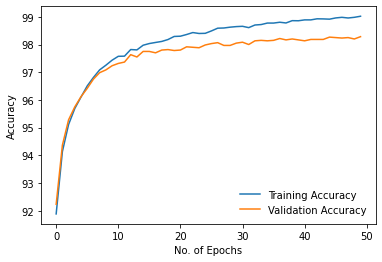

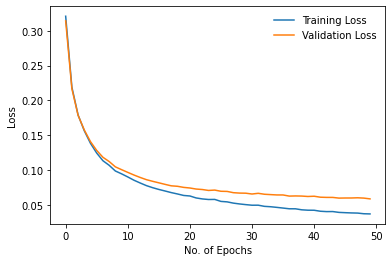

In [0]:
path_model_checkpoint = 'trained_models/MNIST/No_binary_models/with_bias'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

### Test no binary network:

In [0]:
# load model pre trained no binary
binary = False
model_no_binary, name_model = get_my_model_MNIST(binary)

path_model = 'trained_models/MNIST/No_binary_models/with_bias'
if torch.cuda.is_available():
  model_no_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_no_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded


In [0]:
evaluate(model_no_binary, test_loader)

Test Results - Avg accuracy: 98.22 Avg loss: 0.05


## Run Binary Netwwork:

In [0]:
# parameters model to load no Binary model
binary = True

model, name_model = get_my_model_MNIST(binary)
print(name_model)

MNIST_Stochastic_ST_first_conv_binary


ITERATION - loss: 0.45: 100%|█████████▉| 1680/1688 [00:21<00:00, 139.72it/s]

Training Results - Epoch: 1  Avg accuracy: 86.73 Avg loss: 0.50


ITERATION - loss: 0.38:   1%|          | 20/1688 [00:22<04:14,  6.56it/s]   

Validation Results - Epoch: 1  Avg accuracy: 86.90 Avg loss: 0.49


ITERATION - loss: 0.36: 1690it [00:43, 136.62it/s]

Training Results - Epoch: 2  Avg accuracy: 89.43 Avg loss: 0.37


ITERATION - loss: 0.31:   1%|          | 20/1688 [00:44<04:19,  6.42it/s]

Validation Results - Epoch: 2  Avg accuracy: 89.38 Avg loss: 0.36


ITERATION - loss: 0.24: 1690it [01:05, 134.95it/s]

Training Results - Epoch: 3  Avg accuracy: 90.96 Avg loss: 0.31


ITERATION - loss: 0.20:   1%|          | 20/1688 [01:06<04:13,  6.57it/s]

Validation Results - Epoch: 3  Avg accuracy: 90.95 Avg loss: 0.31


ITERATION - loss: 0.22: 1690it [01:27, 138.56it/s]

Training Results - Epoch: 4  Avg accuracy: 91.89 Avg loss: 0.28


ITERATION - loss: 0.29:   1%|          | 20/1688 [01:28<04:16,  6.51it/s]

Validation Results - Epoch: 4  Avg accuracy: 91.87 Avg loss: 0.28


ITERATION - loss: 0.28: 1690it [01:49, 139.77it/s]

Training Results - Epoch: 5  Avg accuracy: 92.62 Avg loss: 0.25


ITERATION - loss: 0.30:   1%|          | 20/1688 [01:50<04:19,  6.43it/s]

Validation Results - Epoch: 5  Avg accuracy: 92.47 Avg loss: 0.25


ITERATION - loss: 0.26: 100%|█████████▉| 1680/1688 [02:11<00:00, 132.54it/s]

Training Results - Epoch: 6  Avg accuracy: 93.23 Avg loss: 0.23


ITERATION - loss: 0.17:   1%|          | 20/1688 [02:12<04:08,  6.70it/s]   

Validation Results - Epoch: 6  Avg accuracy: 93.23 Avg loss: 0.23


ITERATION - loss: 0.37: 1690it [02:33, 132.05it/s]

Training Results - Epoch: 7  Avg accuracy: 93.71 Avg loss: 0.21


ITERATION - loss: 0.13:   1%|          | 20/1688 [02:34<04:19,  6.42it/s]

Validation Results - Epoch: 7  Avg accuracy: 93.70 Avg loss: 0.21


ITERATION - loss: 0.18: 1690it [02:55, 142.68it/s]

Training Results - Epoch: 8  Avg accuracy: 94.15 Avg loss: 0.20


ITERATION - loss: 0.08:   1%|          | 20/1688 [02:56<04:29,  6.18it/s]

Validation Results - Epoch: 8  Avg accuracy: 94.18 Avg loss: 0.20


ITERATION - loss: 0.13: 1690it [03:17, 135.13it/s]

Training Results - Epoch: 9  Avg accuracy: 94.48 Avg loss: 0.19


ITERATION - loss: 0.17:   1%|          | 20/1688 [03:19<04:21,  6.38it/s]

Validation Results - Epoch: 9  Avg accuracy: 94.50 Avg loss: 0.19


ITERATION - loss: 0.11: 1690it [03:40, 122.27it/s]

Training Results - Epoch: 10  Avg accuracy: 94.76 Avg loss: 0.18


ITERATION - loss: 0.08:   1%|          | 20/1688 [03:41<04:16,  6.50it/s]

Validation Results - Epoch: 10  Avg accuracy: 94.78 Avg loss: 0.18


ITERATION - loss: 0.19: 100%|█████████▉| 1680/1688 [04:03<00:00, 120.71it/s]

Training Results - Epoch: 11  Avg accuracy: 94.86 Avg loss: 0.17


ITERATION - loss: 0.14:   1%|          | 20/1688 [04:04<04:27,  6.23it/s]   

Validation Results - Epoch: 11  Avg accuracy: 94.88 Avg loss: 0.17


ITERATION - loss: 0.18: 1690it [04:25, 138.12it/s]

Training Results - Epoch: 12  Avg accuracy: 95.15 Avg loss: 0.17


ITERATION - loss: 0.12:   1%|          | 20/1688 [04:26<04:24,  6.31it/s]

Validation Results - Epoch: 12  Avg accuracy: 95.17 Avg loss: 0.17


ITERATION - loss: 0.18: 1690it [04:47, 137.97it/s]

Training Results - Epoch: 13  Avg accuracy: 95.37 Avg loss: 0.16


ITERATION - loss: 0.10:   1%|          | 20/1688 [04:49<04:24,  6.31it/s]

Validation Results - Epoch: 13  Avg accuracy: 95.20 Avg loss: 0.16


ITERATION - loss: 0.27: 1690it [05:10, 132.43it/s]

Training Results - Epoch: 14  Avg accuracy: 95.58 Avg loss: 0.15


ITERATION - loss: 0.12:   1%|          | 20/1688 [05:11<04:27,  6.24it/s]

Validation Results - Epoch: 14  Avg accuracy: 95.43 Avg loss: 0.15


ITERATION - loss: 0.03: 1690it [05:32, 132.90it/s]

Training Results - Epoch: 15  Avg accuracy: 95.67 Avg loss: 0.15


ITERATION - loss: 0.38:   1%|          | 20/1688 [05:33<04:13,  6.58it/s]

Validation Results - Epoch: 15  Avg accuracy: 95.53 Avg loss: 0.15


ITERATION - loss: 0.17: 100%|█████████▉| 1680/1688 [05:54<00:00, 132.73it/s]

Training Results - Epoch: 16  Avg accuracy: 95.82 Avg loss: 0.14


ITERATION - loss: 0.23:   1%|          | 20/1688 [05:55<04:19,  6.43it/s]   

Validation Results - Epoch: 16  Avg accuracy: 95.60 Avg loss: 0.15


ITERATION - loss: 0.04: 1690it [06:16, 133.45it/s]

Training Results - Epoch: 17  Avg accuracy: 95.93 Avg loss: 0.14


ITERATION - loss: 0.08:   1%|          | 20/1688 [06:17<04:16,  6.51it/s]

Validation Results - Epoch: 17  Avg accuracy: 95.87 Avg loss: 0.14


ITERATION - loss: 0.07: 1690it [06:38, 140.60it/s]

Training Results - Epoch: 18  Avg accuracy: 96.03 Avg loss: 0.14


ITERATION - loss: 0.10:   1%|          | 20/1688 [06:40<04:16,  6.50it/s]

Validation Results - Epoch: 18  Avg accuracy: 95.88 Avg loss: 0.14


ITERATION - loss: 0.07: 1690it [07:01, 134.44it/s]

Training Results - Epoch: 19  Avg accuracy: 96.12 Avg loss: 0.13


ITERATION - loss: 0.01:   1%|          | 20/1688 [07:02<04:19,  6.42it/s]

Validation Results - Epoch: 19  Avg accuracy: 95.83 Avg loss: 0.14


ITERATION - loss: 0.08: 1690it [07:23, 138.90it/s]

Training Results - Epoch: 20  Avg accuracy: 96.23 Avg loss: 0.13


ITERATION - loss: 0.08: 1690it [07:24, 138.90it/s]

Validation Results - Epoch: 20  Avg accuracy: 95.98 Avg loss: 0.13


ITERATION - loss: 0.14: 100%|█████████▉| 1680/1688 [07:45<00:00, 142.32it/s]

Training Results - Epoch: 21  Avg accuracy: 96.33 Avg loss: 0.13


ITERATION - loss: 0.05:   1%|          | 20/1688 [07:46<04:18,  6.46it/s]   

Validation Results - Epoch: 21  Avg accuracy: 96.08 Avg loss: 0.13


ITERATION - loss: 0.17: 1690it [08:07, 135.30it/s]

Training Results - Epoch: 22  Avg accuracy: 96.42 Avg loss: 0.12


ITERATION - loss: 0.15:   1%|          | 20/1688 [08:08<04:17,  6.48it/s]

Validation Results - Epoch: 22  Avg accuracy: 96.08 Avg loss: 0.13


ITERATION - loss: 0.12: 1690it [08:29, 142.85it/s]

Training Results - Epoch: 23  Avg accuracy: 96.48 Avg loss: 0.12


ITERATION - loss: 0.08:   1%|          | 20/1688 [08:30<04:22,  6.36it/s]

Validation Results - Epoch: 23  Avg accuracy: 96.28 Avg loss: 0.13


ITERATION - loss: 0.13: 1690it [08:51, 137.77it/s]

Training Results - Epoch: 24  Avg accuracy: 96.52 Avg loss: 0.12


ITERATION - loss: 0.05:   1%|          | 20/1688 [08:52<04:14,  6.56it/s]

Validation Results - Epoch: 24  Avg accuracy: 96.42 Avg loss: 0.12


ITERATION - loss: 0.39: 1690it [09:13, 142.70it/s]

Training Results - Epoch: 25  Avg accuracy: 96.58 Avg loss: 0.12


ITERATION - loss: 0.03:   1%|          | 20/1688 [09:14<04:18,  6.46it/s]

Validation Results - Epoch: 25  Avg accuracy: 96.47 Avg loss: 0.12


ITERATION - loss: 0.09: 100%|█████████▉| 1680/1688 [09:35<00:00, 136.89it/s]

Training Results - Epoch: 26  Avg accuracy: 96.67 Avg loss: 0.11


ITERATION - loss: 0.04:   1%|          | 20/1688 [09:36<04:21,  6.37it/s]   

Validation Results - Epoch: 26  Avg accuracy: 96.42 Avg loss: 0.12


ITERATION - loss: 0.08: 1690it [09:57, 139.91it/s]

Training Results - Epoch: 27  Avg accuracy: 96.73 Avg loss: 0.11


ITERATION - loss: 0.07:   1%|          | 20/1688 [09:58<04:19,  6.44it/s]

Validation Results - Epoch: 27  Avg accuracy: 96.52 Avg loss: 0.12


ITERATION - loss: 0.10: 1690it [10:19, 137.66it/s]

Training Results - Epoch: 28  Avg accuracy: 96.81 Avg loss: 0.11


ITERATION - loss: 0.07:   1%|          | 20/1688 [10:20<04:22,  6.35it/s]

Validation Results - Epoch: 28  Avg accuracy: 96.53 Avg loss: 0.12


ITERATION - loss: 0.38: 1690it [10:41, 140.29it/s]

Training Results - Epoch: 29  Avg accuracy: 96.83 Avg loss: 0.11


ITERATION - loss: 0.06:   1%|          | 20/1688 [10:42<04:28,  6.22it/s]

Validation Results - Epoch: 29  Avg accuracy: 96.55 Avg loss: 0.11


ITERATION - loss: 0.03: 1690it [11:04, 141.76it/s]

Training Results - Epoch: 30  Avg accuracy: 96.87 Avg loss: 0.11


ITERATION - loss: 0.01:   1%|          | 20/1688 [11:05<04:16,  6.50it/s]

Validation Results - Epoch: 30  Avg accuracy: 96.60 Avg loss: 0.11


ITERATION - loss: 0.08: 100%|█████████▉| 1680/1688 [11:26<00:00, 138.41it/s]

Training Results - Epoch: 31  Avg accuracy: 96.91 Avg loss: 0.11


ITERATION - loss: 0.21:   1%|          | 20/1688 [11:27<04:33,  6.09it/s]   

Validation Results - Epoch: 31  Avg accuracy: 96.73 Avg loss: 0.11


ITERATION - loss: 0.14: 1690it [11:48, 130.16it/s]

Training Results - Epoch: 32  Avg accuracy: 96.97 Avg loss: 0.10


ITERATION - loss: 0.04:   1%|          | 20/1688 [11:49<04:18,  6.46it/s]

Validation Results - Epoch: 32  Avg accuracy: 96.93 Avg loss: 0.11


ITERATION - loss: 0.26: 1690it [12:10, 146.38it/s]

Training Results - Epoch: 33  Avg accuracy: 96.99 Avg loss: 0.10


ITERATION - loss: 0.05:   1%|          | 20/1688 [12:11<04:15,  6.54it/s]

Validation Results - Epoch: 33  Avg accuracy: 96.87 Avg loss: 0.11


ITERATION - loss: 0.05: 1690it [12:32, 139.06it/s]

Training Results - Epoch: 34  Avg accuracy: 97.09 Avg loss: 0.10


ITERATION - loss: 0.12:   1%|          | 20/1688 [12:33<04:08,  6.71it/s]

Validation Results - Epoch: 34  Avg accuracy: 97.00 Avg loss: 0.11


ITERATION - loss: 0.04: 1690it [12:53, 140.53it/s]

Training Results - Epoch: 35  Avg accuracy: 97.10 Avg loss: 0.10


ITERATION - loss: 0.16:   1%|          | 20/1688 [12:54<04:19,  6.43it/s]

Validation Results - Epoch: 35  Avg accuracy: 96.87 Avg loss: 0.11


ITERATION - loss: 0.04: 100%|█████████▉| 1680/1688 [13:16<00:00, 136.69it/s]

Training Results - Epoch: 36  Avg accuracy: 97.12 Avg loss: 0.10


ITERATION - loss: 0.14:   1%|          | 20/1688 [13:17<04:26,  6.26it/s]   

Validation Results - Epoch: 36  Avg accuracy: 97.03 Avg loss: 0.10


ITERATION - loss: 0.03: 1690it [13:38, 141.94it/s]

Training Results - Epoch: 37  Avg accuracy: 97.22 Avg loss: 0.10


ITERATION - loss: 0.04:   1%|          | 20/1688 [13:39<04:20,  6.40it/s]

Validation Results - Epoch: 37  Avg accuracy: 97.00 Avg loss: 0.10


ITERATION - loss: 0.13: 1690it [14:00, 145.19it/s]

Training Results - Epoch: 38  Avg accuracy: 97.22 Avg loss: 0.10


ITERATION - loss: 0.16:   1%|          | 20/1688 [14:01<04:16,  6.50it/s]

Validation Results - Epoch: 38  Avg accuracy: 97.08 Avg loss: 0.10


ITERATION - loss: 0.13: 1690it [14:23, 134.14it/s]

Training Results - Epoch: 39  Avg accuracy: 97.24 Avg loss: 0.09


ITERATION - loss: 0.08:   1%|          | 20/1688 [14:24<04:26,  6.25it/s]

Validation Results - Epoch: 39  Avg accuracy: 97.17 Avg loss: 0.10


ITERATION - loss: 0.02: 1690it [14:45, 142.29it/s]

Training Results - Epoch: 40  Avg accuracy: 97.30 Avg loss: 0.09


ITERATION - loss: 0.22:   1%|          | 20/1688 [14:47<04:28,  6.22it/s]

Validation Results - Epoch: 40  Avg accuracy: 97.03 Avg loss: 0.10


ITERATION - loss: 0.11: 100%|█████████▉| 1680/1688 [15:07<00:00, 135.00it/s]

Training Results - Epoch: 41  Avg accuracy: 97.29 Avg loss: 0.09


ITERATION - loss: 0.03:   1%|          | 20/1688 [15:09<04:22,  6.35it/s]   

Validation Results - Epoch: 41  Avg accuracy: 97.05 Avg loss: 0.10


ITERATION - loss: 0.02: 1690it [15:30, 142.16it/s]

Training Results - Epoch: 42  Avg accuracy: 97.37 Avg loss: 0.09


ITERATION - loss: 0.11:   1%|          | 20/1688 [15:31<04:12,  6.61it/s]

Validation Results - Epoch: 42  Avg accuracy: 97.20 Avg loss: 0.10


ITERATION - loss: 0.12: 1690it [15:52, 137.16it/s]

Training Results - Epoch: 43  Avg accuracy: 97.36 Avg loss: 0.09


ITERATION - loss: 0.14:   1%|          | 20/1688 [15:53<04:21,  6.38it/s]

Validation Results - Epoch: 43  Avg accuracy: 97.17 Avg loss: 0.10


ITERATION - loss: 0.07: 1690it [16:14, 138.63it/s]

Training Results - Epoch: 44  Avg accuracy: 97.41 Avg loss: 0.09


ITERATION - loss: 0.06:   1%|          | 20/1688 [16:15<04:18,  6.45it/s]

Validation Results - Epoch: 44  Avg accuracy: 97.22 Avg loss: 0.10


ITERATION - loss: 0.19: 1690it [16:36, 137.86it/s]

Training Results - Epoch: 45  Avg accuracy: 97.44 Avg loss: 0.09


ITERATION - loss: 0.11:   1%|          | 20/1688 [16:38<04:14,  6.55it/s]

Validation Results - Epoch: 45  Avg accuracy: 97.37 Avg loss: 0.09


ITERATION - loss: 0.37: 100%|█████████▉| 1680/1688 [16:58<00:00, 135.37it/s]

Training Results - Epoch: 46  Avg accuracy: 97.44 Avg loss: 0.09


ITERATION - loss: 0.07:   1%|          | 20/1688 [17:00<04:22,  6.37it/s]   

Validation Results - Epoch: 46  Avg accuracy: 97.40 Avg loss: 0.10


ITERATION - loss: 0.11: 1690it [17:21, 142.19it/s]

Training Results - Epoch: 47  Avg accuracy: 97.49 Avg loss: 0.09


ITERATION - loss: 0.23:   1%|          | 20/1688 [17:22<04:22,  6.35it/s]

Validation Results - Epoch: 47  Avg accuracy: 97.27 Avg loss: 0.09


ITERATION - loss: 0.07: 1690it [17:44, 127.33it/s]

Training Results - Epoch: 48  Avg accuracy: 97.54 Avg loss: 0.08


ITERATION - loss: 0.04:   1%|          | 20/1688 [17:45<04:30,  6.17it/s]

Validation Results - Epoch: 48  Avg accuracy: 97.35 Avg loss: 0.09


ITERATION - loss: 0.15: 1690it [18:06, 137.68it/s]

Training Results - Epoch: 49  Avg accuracy: 97.56 Avg loss: 0.08


ITERATION - loss: 0.03:   1%|          | 20/1688 [18:07<04:28,  6.21it/s]

Validation Results - Epoch: 49  Avg accuracy: 97.40 Avg loss: 0.09


ITERATION - loss: 0.33: 1690it [18:28, 125.43it/s]

Training Results - Epoch: 50  Avg accuracy: 97.56 Avg loss: 0.08


ITERATION - loss: 0.33: 1690it [18:29, 125.43it/s]

Validation Results - Epoch: 50  Avg accuracy: 97.43 Avg loss: 0.09


ITERATION - loss: 0.33:   0%|          | 0/1688 [18:30<00:13, 125.43it/s]

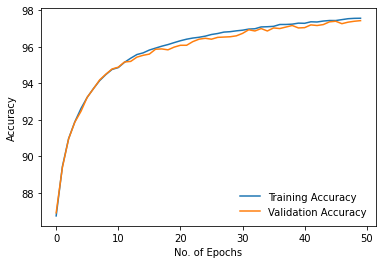

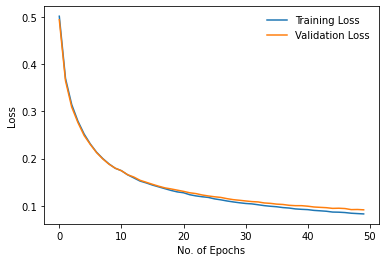

In [0]:
path_model_checkpoint = 'trained_models/MNIST/Binary_models/with_bias'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

### Test Binary network:

In [0]:
# load model pre trained binary
binary = True    
model_binary, name_model = get_my_model_MNIST(binary)

path_model = 'trained_models/MNIST/Binary_models/with_bias'
if torch.cuda.is_available():
  model_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded


In [0]:
evaluate(model_binary, test_loader)

Test Results - Avg accuracy: 97.51 Avg loss: 0.09


# Training wihtout bias:

## Training parameters:

In [0]:
epochs = 50
lr = 1e-3
momentum = 0.5
log_interval = 10  # how many batches to wait before logging training status
criterion =  F.nll_loss

## Run No binary network:

In [0]:
# parameters model to load no Binary model
binary = False
bias = False

model, name_model = get_my_model_MNIST(binary, bias=bias)
print(name_model)

MNIST_NonBinaryNet_without_bias


ITERATION - loss: 0.52: 100%|█████████▉| 840/844 [00:15<00:00, 94.73it/s]

Training Results - Epoch: 1  Avg accuracy: 88.37 Avg loss: 0.50


ITERATION - loss: 0.49:   2%|▏         | 20/844 [00:16<02:19,  5.89it/s]

Validation Results - Epoch: 1  Avg accuracy: 88.87 Avg loss: 0.49


ITERATION - loss: 0.24: 100%|█████████▉| 840/844 [00:31<00:00, 93.87it/s]

Training Results - Epoch: 2  Avg accuracy: 91.44 Avg loss: 0.34


ITERATION - loss: 0.19:   1%|          | 10/844 [00:32<03:18,  4.21it/s] 

Validation Results - Epoch: 2  Avg accuracy: 91.95 Avg loss: 0.33


ITERATION - loss: 0.32: 850it [00:48, 100.30it/s]

Training Results - Epoch: 3  Avg accuracy: 92.89 Avg loss: 0.27


ITERATION - loss: 0.32: 850it [00:48, 100.30it/s]

Validation Results - Epoch: 3  Avg accuracy: 93.37 Avg loss: 0.27


ITERATION - loss: 0.26: 100%|█████████▉| 840/844 [01:04<00:00, 93.42it/s]

Training Results - Epoch: 4  Avg accuracy: 93.88 Avg loss: 0.23


ITERATION - loss: 0.14:   2%|▏         | 20/844 [01:05<02:20,  5.85it/s]

Validation Results - Epoch: 4  Avg accuracy: 94.18 Avg loss: 0.23


ITERATION - loss: 0.21: 850it [01:20, 100.73it/s]

Training Results - Epoch: 5  Avg accuracy: 94.58 Avg loss: 0.20


ITERATION - loss: 0.21: 850it [01:21, 100.73it/s]

Validation Results - Epoch: 5  Avg accuracy: 94.67 Avg loss: 0.21


ITERATION - loss: 0.29: 100%|█████████▉| 840/844 [01:36<00:00, 98.20it/s]

Training Results - Epoch: 6  Avg accuracy: 95.02 Avg loss: 0.19


ITERATION - loss: 0.14:   1%|          | 10/844 [01:37<03:17,  4.22it/s] 

Validation Results - Epoch: 6  Avg accuracy: 95.03 Avg loss: 0.19


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [01:52<00:00, 100.04it/s]

Training Results - Epoch: 7  Avg accuracy: 95.35 Avg loss: 0.17


ITERATION - loss: 0.20:   2%|▏         | 20/844 [01:53<01:42,  8.05it/s]  

Validation Results - Epoch: 7  Avg accuracy: 95.20 Avg loss: 0.18


ITERATION - loss: 0.18: 850it [02:08, 99.21it/s]

Training Results - Epoch: 8  Avg accuracy: 95.64 Avg loss: 0.16


ITERATION - loss: 0.19:   1%|          | 10/844 [02:09<03:22,  4.13it/s]

Validation Results - Epoch: 8  Avg accuracy: 95.47 Avg loss: 0.17


ITERATION - loss: 0.13: 100%|█████████▉| 840/844 [02:24<00:00, 99.51it/s]

Training Results - Epoch: 9  Avg accuracy: 95.90 Avg loss: 0.15


ITERATION - loss: 0.11:   2%|▏         | 20/844 [02:25<02:18,  5.93it/s]

Validation Results - Epoch: 9  Avg accuracy: 95.75 Avg loss: 0.16


ITERATION - loss: 0.11: 850it [02:40, 96.54it/s]

Training Results - Epoch: 10  Avg accuracy: 96.05 Avg loss: 0.14


ITERATION - loss: 0.07:   1%|          | 10/844 [02:41<03:21,  4.15it/s]

Validation Results - Epoch: 10  Avg accuracy: 95.88 Avg loss: 0.15


ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [02:57<00:00, 96.30it/s]

Training Results - Epoch: 11  Avg accuracy: 96.25 Avg loss: 0.14


ITERATION - loss: 0.12:   1%|          | 10/844 [02:57<03:17,  4.22it/s] 

Validation Results - Epoch: 11  Avg accuracy: 96.05 Avg loss: 0.15


ITERATION - loss: 0.12: 100%|█████████▉| 840/844 [03:12<00:00, 94.78it/s]

Training Results - Epoch: 12  Avg accuracy: 96.40 Avg loss: 0.13


ITERATION - loss: 0.11:   1%|          | 10/844 [03:13<03:20,  4.15it/s] 

Validation Results - Epoch: 12  Avg accuracy: 96.18 Avg loss: 0.14


ITERATION - loss: 0.11: 850it [03:29, 89.85it/s]

Training Results - Epoch: 13  Avg accuracy: 96.56 Avg loss: 0.13


ITERATION - loss: 0.07:   1%|          | 10/844 [03:30<03:19,  4.17it/s]

Validation Results - Epoch: 13  Avg accuracy: 96.32 Avg loss: 0.14


ITERATION - loss: 0.13: 100%|█████████▉| 840/844 [03:45<00:00, 102.47it/s]

Training Results - Epoch: 14  Avg accuracy: 96.65 Avg loss: 0.12


ITERATION - loss: 0.18:   2%|▏         | 20/844 [03:46<01:40,  8.19it/s]  

Validation Results - Epoch: 14  Avg accuracy: 96.45 Avg loss: 0.13


ITERATION - loss: 0.03: 850it [04:01, 104.59it/s]

Training Results - Epoch: 15  Avg accuracy: 96.79 Avg loss: 0.12


ITERATION - loss: 0.03: 850it [04:01, 104.59it/s]

Validation Results - Epoch: 15  Avg accuracy: 96.55 Avg loss: 0.13


ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [04:17<00:00, 100.80it/s]

Training Results - Epoch: 16  Avg accuracy: 96.92 Avg loss: 0.11


ITERATION - loss: 0.07:   2%|▏         | 20/844 [04:18<01:42,  8.05it/s]  

Validation Results - Epoch: 16  Avg accuracy: 96.60 Avg loss: 0.13


ITERATION - loss: 0.06: 100%|█████████▉| 840/844 [04:32<00:00, 100.75it/s]

Training Results - Epoch: 17  Avg accuracy: 96.99 Avg loss: 0.11


ITERATION - loss: 0.03:   2%|▏         | 20/844 [04:33<01:41,  8.09it/s]  

Validation Results - Epoch: 17  Avg accuracy: 96.65 Avg loss: 0.12


ITERATION - loss: 0.10: 850it [04:48, 98.62it/s]

Training Results - Epoch: 18  Avg accuracy: 97.08 Avg loss: 0.11


ITERATION - loss: 0.17:   1%|          | 10/844 [04:49<03:18,  4.20it/s]

Validation Results - Epoch: 18  Avg accuracy: 96.73 Avg loss: 0.12


ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [05:04<00:00, 100.28it/s]

Training Results - Epoch: 19  Avg accuracy: 97.19 Avg loss: 0.10


ITERATION - loss: 0.08:   2%|▏         | 20/844 [05:05<01:41,  8.16it/s]  

Validation Results - Epoch: 19  Avg accuracy: 96.72 Avg loss: 0.12


ITERATION - loss: 0.08: 850it [05:20, 101.03it/s]

Training Results - Epoch: 20  Avg accuracy: 97.26 Avg loss: 0.10


ITERATION - loss: 0.08: 850it [05:21, 101.03it/s]

Validation Results - Epoch: 20  Avg accuracy: 96.77 Avg loss: 0.12


ITERATION - loss: 0.15: 100%|█████████▉| 840/844 [05:36<00:00, 101.64it/s]

Training Results - Epoch: 21  Avg accuracy: 97.34 Avg loss: 0.10


ITERATION - loss: 0.07:   2%|▏         | 20/844 [05:37<01:39,  8.25it/s]  

Validation Results - Epoch: 21  Avg accuracy: 96.80 Avg loss: 0.12


ITERATION - loss: 0.23: 100%|█████████▉| 840/844 [05:51<00:00, 102.25it/s]

Training Results - Epoch: 22  Avg accuracy: 97.39 Avg loss: 0.10


ITERATION - loss: 0.03:   2%|▏         | 20/844 [05:52<01:40,  8.22it/s]  

Validation Results - Epoch: 22  Avg accuracy: 96.85 Avg loss: 0.11


ITERATION - loss: 0.03: 850it [06:07, 102.12it/s]

Training Results - Epoch: 23  Avg accuracy: 97.46 Avg loss: 0.09


ITERATION - loss: 0.03: 850it [06:08, 102.12it/s]

Validation Results - Epoch: 23  Avg accuracy: 96.83 Avg loss: 0.11


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [06:24<00:00, 101.30it/s]

Training Results - Epoch: 24  Avg accuracy: 97.50 Avg loss: 0.09


ITERATION - loss: 0.10:   2%|▏         | 20/844 [06:25<01:43,  7.98it/s]  

Validation Results - Epoch: 24  Avg accuracy: 96.92 Avg loss: 0.11


ITERATION - loss: 0.15: 850it [06:40, 95.31it/s]

Training Results - Epoch: 25  Avg accuracy: 97.53 Avg loss: 0.09


ITERATION - loss: 0.13:   1%|          | 10/844 [06:41<03:20,  4.16it/s]

Validation Results - Epoch: 25  Avg accuracy: 96.98 Avg loss: 0.11


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [06:56<00:00, 99.83it/s]

Training Results - Epoch: 26  Avg accuracy: 97.55 Avg loss: 0.09


ITERATION - loss: 0.07:   2%|▏         | 20/844 [06:57<01:42,  8.02it/s] 

Validation Results - Epoch: 26  Avg accuracy: 96.95 Avg loss: 0.11


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [07:12<00:00, 97.40it/s]

Training Results - Epoch: 27  Avg accuracy: 97.60 Avg loss: 0.09


ITERATION - loss: 0.08:   1%|          | 10/844 [07:13<03:16,  4.25it/s] 

Validation Results - Epoch: 27  Avg accuracy: 97.02 Avg loss: 0.10


ITERATION - loss: 0.09: 850it [07:28, 99.88it/s]

Training Results - Epoch: 28  Avg accuracy: 97.70 Avg loss: 0.08


ITERATION - loss: 0.09: 850it [07:29, 99.88it/s]

Validation Results - Epoch: 28  Avg accuracy: 97.10 Avg loss: 0.10


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [07:44<00:00, 100.58it/s]

Training Results - Epoch: 29  Avg accuracy: 97.72 Avg loss: 0.08


ITERATION - loss: 0.05:   2%|▏         | 20/844 [07:45<01:42,  8.04it/s]  

Validation Results - Epoch: 29  Avg accuracy: 97.12 Avg loss: 0.10


ITERATION - loss: 0.03: 850it [08:00, 102.76it/s]

Training Results - Epoch: 30  Avg accuracy: 97.77 Avg loss: 0.08


ITERATION - loss: 0.03: 850it [08:01, 102.76it/s]

Validation Results - Epoch: 30  Avg accuracy: 97.08 Avg loss: 0.10


ITERATION - loss: 0.10: 100%|█████████▉| 840/844 [08:16<00:00, 99.99it/s]

Training Results - Epoch: 31  Avg accuracy: 97.81 Avg loss: 0.08


ITERATION - loss: 0.04:   2%|▏         | 20/844 [08:17<01:42,  8.04it/s] 

Validation Results - Epoch: 31  Avg accuracy: 97.18 Avg loss: 0.10


ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [08:32<00:00, 98.88it/s]

Training Results - Epoch: 32  Avg accuracy: 97.88 Avg loss: 0.08


ITERATION - loss: 0.06:   1%|          | 10/844 [08:33<03:19,  4.19it/s] 

Validation Results - Epoch: 32  Avg accuracy: 97.20 Avg loss: 0.10


ITERATION - loss: 0.18: 850it [08:48, 103.40it/s]

Training Results - Epoch: 33  Avg accuracy: 97.87 Avg loss: 0.08


ITERATION - loss: 0.10:   2%|▏         | 20/844 [08:49<01:40,  8.17it/s]

Validation Results - Epoch: 33  Avg accuracy: 97.25 Avg loss: 0.10


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [09:04<00:00, 101.76it/s]

Training Results - Epoch: 34  Avg accuracy: 97.92 Avg loss: 0.08


ITERATION - loss: 0.03:   2%|▏         | 20/844 [09:04<01:40,  8.18it/s]  

Validation Results - Epoch: 34  Avg accuracy: 97.23 Avg loss: 0.10


ITERATION - loss: 0.06: 850it [09:19, 104.68it/s]

Training Results - Epoch: 35  Avg accuracy: 97.96 Avg loss: 0.08


ITERATION - loss: 0.06: 850it [09:20, 104.68it/s]

Validation Results - Epoch: 35  Avg accuracy: 97.20 Avg loss: 0.10


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [09:35<00:00, 101.42it/s]

Training Results - Epoch: 36  Avg accuracy: 97.97 Avg loss: 0.07


ITERATION - loss: 0.08:   2%|▏         | 20/844 [09:36<01:40,  8.18it/s]  

Validation Results - Epoch: 36  Avg accuracy: 97.33 Avg loss: 0.09


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [09:51<00:00, 101.56it/s]

Training Results - Epoch: 37  Avg accuracy: 98.01 Avg loss: 0.07


ITERATION - loss: 0.10:   2%|▏         | 20/844 [09:52<01:40,  8.17it/s]  

Validation Results - Epoch: 37  Avg accuracy: 97.30 Avg loss: 0.09


ITERATION - loss: 0.12: 850it [10:07, 103.13it/s]

Training Results - Epoch: 38  Avg accuracy: 98.03 Avg loss: 0.07


ITERATION - loss: 0.12: 850it [10:07, 103.13it/s]

Validation Results - Epoch: 38  Avg accuracy: 97.30 Avg loss: 0.09


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [10:23<00:00, 99.82it/s]

Training Results - Epoch: 39  Avg accuracy: 98.10 Avg loss: 0.07


ITERATION - loss: 0.02:   2%|▏         | 20/844 [10:24<01:41,  8.10it/s] 

Validation Results - Epoch: 39  Avg accuracy: 97.37 Avg loss: 0.09


ITERATION - loss: 0.08: 850it [10:38, 103.63it/s]

Training Results - Epoch: 40  Avg accuracy: 98.08 Avg loss: 0.07


ITERATION - loss: 0.08: 850it [10:39, 103.63it/s]

Validation Results - Epoch: 40  Avg accuracy: 97.47 Avg loss: 0.09


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [10:54<00:00, 103.03it/s]

Training Results - Epoch: 41  Avg accuracy: 98.11 Avg loss: 0.07


ITERATION - loss: 0.03:   2%|▏         | 20/844 [10:55<01:40,  8.24it/s]  

Validation Results - Epoch: 41  Avg accuracy: 97.45 Avg loss: 0.09


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [11:10<00:00, 104.64it/s]

Training Results - Epoch: 42  Avg accuracy: 98.16 Avg loss: 0.07


ITERATION - loss: 0.04:   2%|▏         | 20/844 [11:11<01:41,  8.13it/s]  

Validation Results - Epoch: 42  Avg accuracy: 97.47 Avg loss: 0.09


ITERATION - loss: 0.08: 850it [11:26, 100.30it/s]

Training Results - Epoch: 43  Avg accuracy: 98.16 Avg loss: 0.07


ITERATION - loss: 0.04:   2%|▏         | 20/844 [11:27<01:42,  8.07it/s]

Validation Results - Epoch: 43  Avg accuracy: 97.50 Avg loss: 0.09


ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [11:42<00:00, 104.74it/s]

Training Results - Epoch: 44  Avg accuracy: 98.21 Avg loss: 0.07


ITERATION - loss: 0.12:   2%|▏         | 20/844 [11:43<01:42,  8.05it/s]  

Validation Results - Epoch: 44  Avg accuracy: 97.52 Avg loss: 0.09


ITERATION - loss: 0.02: 850it [11:57, 97.79it/s]

Training Results - Epoch: 45  Avg accuracy: 98.25 Avg loss: 0.07


ITERATION - loss: 0.02:   1%|          | 10/844 [11:58<03:18,  4.20it/s]

Validation Results - Epoch: 45  Avg accuracy: 97.57 Avg loss: 0.09


ITERATION - loss: 0.03: 100%|█████████▉| 840/844 [12:13<00:00, 100.05it/s]

Training Results - Epoch: 46  Avg accuracy: 98.28 Avg loss: 0.06


ITERATION - loss: 0.16:   2%|▏         | 20/844 [12:14<01:40,  8.17it/s]  

Validation Results - Epoch: 46  Avg accuracy: 97.45 Avg loss: 0.09


ITERATION - loss: 0.12: 100%|█████████▉| 840/844 [12:29<00:00, 100.66it/s]

Training Results - Epoch: 47  Avg accuracy: 98.28 Avg loss: 0.06


ITERATION - loss: 0.20:   2%|▏         | 20/844 [12:30<01:41,  8.14it/s]  

Validation Results - Epoch: 47  Avg accuracy: 97.55 Avg loss: 0.08


ITERATION - loss: 0.02: 850it [12:45, 101.99it/s]

Training Results - Epoch: 48  Avg accuracy: 98.29 Avg loss: 0.06


ITERATION - loss: 0.02: 850it [12:46, 101.99it/s]

Validation Results - Epoch: 48  Avg accuracy: 97.58 Avg loss: 0.08


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [13:01<00:00, 103.98it/s]

Training Results - Epoch: 49  Avg accuracy: 98.30 Avg loss: 0.06


ITERATION - loss: 0.01:   2%|▏         | 20/844 [13:02<01:41,  8.12it/s]  

Validation Results - Epoch: 49  Avg accuracy: 97.67 Avg loss: 0.08


ITERATION - loss: 0.05: 850it [13:16, 103.38it/s]

Training Results - Epoch: 50  Avg accuracy: 98.36 Avg loss: 0.06


ITERATION - loss: 0.05: 850it [13:17, 103.38it/s]

Validation Results - Epoch: 50  Avg accuracy: 97.58 Avg loss: 0.08


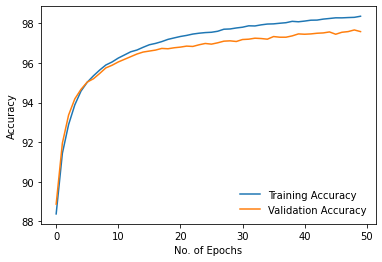

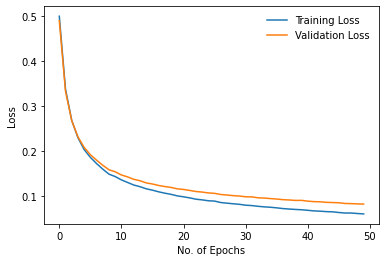

In [0]:
path_model_checkpoint = 'trained_models/MNIST/No_binary_models/without_bias'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

### Test no binary network:

In [0]:
# load model pre trained no binary
binary = False
bias=False
model_no_binary_wt_bias, name_model = get_my_model_MNIST(binary, bias=bias)

path_model = 'trained_models/MNIST/No_binary_models/without_bias'
if torch.cuda.is_available():
  model_no_binary_wt_bias.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_no_binary_wt_bias.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_NonBinaryNet_without_bias


In [0]:
evaluate(model_no_binary_wt_bias, test_loader)

Test Results - Avg accuracy: 98.05 Avg loss: 0.06


## Run Binary Netwwork:

In [0]:
# parameters model to load no Binary model
binary = True
bias=False

model, name_model = get_my_model_MNIST(binary, bias=bias)
print(name_model)

MNIST_Stochastic_ST_first_conv_binary_without_bias



ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [00:09<00:00, 90.04it/s]

ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [00:16<00:00, 90.04it/s]

Training Results - Epoch: 1  Avg accuracy: 87.64 Avg loss: 0.44



ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [00:17<00:00, 90.04it/s]

Validation Results - Epoch: 1  Avg accuracy: 87.75 Avg loss: 0.44



ITERATION - loss: 0.31: 100%|█████████▉| 840/844 [00:26<00:00, 85.76it/s]

ITERATION - loss: 0.31: 100%|█████████▉| 840/844 [00:33<00:00, 85.76it/s]

Training Results - Epoch: 2  Avg accuracy: 88.81 Avg loss: 0.39



ITERATION - loss: 0.37:   2%|▏         | 20/844 [00:34<02:26,  5.62it/s]

Validation Results - Epoch: 2  Avg accuracy: 88.85 Avg loss: 0.39



ITERATION - loss: 0.25: 100%|█████████▉| 840/844 [00:44<00:00, 91.80it/s]
ITERATION - loss: 0.41: 850it [00:44, 91.73it/s]                         

ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [01:24<00:00, 93.64it/s]
ITERATION - loss: 0.41: 850it [00:51, 91.73it/s]

Training Results - Epoch: 3  Avg accuracy: 89.79 Avg loss: 0.35



ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [01:25<00:00, 93.64it/s]
ITERATION - loss: 0.41: 850it [00:52, 91.73it/s]
ITERATION - loss: 0.34:   1%|          | 10/844 [00:52<03:25,  4.06it/s]

Validation Results - Epoch: 3  Avg accuracy: 89.57 Avg loss: 0.35



ITERATION - loss: 0.38: 100%|█████████▉| 840/844 [01:01<00:00, 90.87it/s]

ITERATION - loss: 0.38: 100%|█████████▉| 840/844 [01:08<00:00, 90.87it/s]

Training Results - Epoch: 4  Avg accuracy: 90.52 Avg loss: 0.33



ITERATION - loss: 0.23:   2%|▏         | 20/844 [01:09<02:22,  5.77it/s]

Validation Results - Epoch: 4  Avg accuracy: 90.35 Avg loss: 0.33



ITERATION - loss: 0.18: 100%|█████████▉| 840/844 [01:18<00:00, 91.54it/s]
ITERATION - loss: 0.33: 850it [01:18, 92.70it/s]                         

ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [01:58<00:00, 93.64it/s]
ITERATION - loss: 0.33: 850it [01:25, 92.70it/s]

Training Results - Epoch: 5  Avg accuracy: 91.11 Avg loss: 0.31



ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [01:59<00:00, 93.64it/s]
ITERATION - loss: 0.33: 850it [01:26, 92.70it/s]
ITERATION - loss: 0.29:   1%|          | 10/844 [01:26<03:25,  4.07it/s]

Validation Results - Epoch: 5  Avg accuracy: 90.67 Avg loss: 0.31



ITERATION - loss: 0.50: 100%|█████████▉| 840/844 [01:35<00:00, 88.74it/s]

ITERATION - loss: 0.50: 100%|█████████▉| 840/844 [01:42<00:00, 88.74it/s]

Training Results - Epoch: 6  Avg accuracy: 91.56 Avg loss: 0.29



ITERATION - loss: 0.22:   1%|          | 10/844 [01:43<03:26,  4.04it/s] 

Validation Results - Epoch: 6  Avg accuracy: 91.18 Avg loss: 0.29



ITERATION - loss: 0.18: 100%|█████████▉| 840/844 [01:52<00:00, 90.20it/s]

ITERATION - loss: 0.18: 100%|█████████▉| 840/844 [01:59<00:00, 90.20it/s]

Training Results - Epoch: 7  Avg accuracy: 91.96 Avg loss: 0.28



ITERATION - loss: 0.25:   2%|▏         | 20/844 [02:00<02:23,  5.73it/s]

Validation Results - Epoch: 7  Avg accuracy: 91.60 Avg loss: 0.28



ITERATION - loss: 0.25: 100%|█████████▉| 840/844 [02:09<00:00, 89.94it/s]
ITERATION - loss: 0.28: 850it [02:09, 88.36it/s]                         

ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [02:50<00:00, 93.64it/s]
ITERATION - loss: 0.28: 850it [02:16, 88.36it/s]

Training Results - Epoch: 8  Avg accuracy: 92.35 Avg loss: 0.26



ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [02:51<00:00, 93.64it/s]
ITERATION - loss: 0.28: 850it [02:17, 88.36it/s]
ITERATION - loss: 0.29:   1%|          | 10/844 [02:17<03:25,  4.06it/s]

Validation Results - Epoch: 8  Avg accuracy: 92.17 Avg loss: 0.27



ITERATION - loss: 0.25: 100%|█████████▉| 840/844 [02:27<00:00, 91.68it/s]

ITERATION - loss: 0.25: 100%|█████████▉| 840/844 [02:34<00:00, 91.68it/s]

Training Results - Epoch: 9  Avg accuracy: 92.74 Avg loss: 0.25



ITERATION - loss: 0.21:   2%|▏         | 20/844 [02:35<02:24,  5.70it/s]

Validation Results - Epoch: 9  Avg accuracy: 92.47 Avg loss: 0.26



ITERATION - loss: 0.21: 100%|█████████▉| 840/844 [02:44<00:00, 83.65it/s]
ITERATION - loss: 0.29: 850it [02:44, 85.10it/s]                         

ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [03:24<00:00, 93.64it/s]
ITERATION - loss: 0.29: 850it [02:51, 85.10it/s]

Training Results - Epoch: 10  Avg accuracy: 92.94 Avg loss: 0.24



ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [03:25<00:00, 93.64it/s]
ITERATION - loss: 0.29: 850it [02:52, 85.10it/s]
ITERATION - loss: 0.14:   1%|          | 10/844 [02:52<03:26,  4.05it/s]

Validation Results - Epoch: 10  Avg accuracy: 92.63 Avg loss: 0.25



ITERATION - loss: 0.19: 100%|█████████▉| 840/844 [03:01<00:00, 92.86it/s]

ITERATION - loss: 0.19: 100%|█████████▉| 840/844 [03:08<00:00, 92.86it/s]

Training Results - Epoch: 11  Avg accuracy: 93.29 Avg loss: 0.23



ITERATION - loss: 0.23:   1%|          | 10/844 [03:09<03:24,  4.07it/s] 

Validation Results - Epoch: 11  Avg accuracy: 93.02 Avg loss: 0.24



ITERATION - loss: 0.24: 100%|█████████▉| 840/844 [03:18<00:00, 93.59it/s]

ITERATION - loss: 0.24: 100%|█████████▉| 840/844 [03:25<00:00, 93.59it/s]

Training Results - Epoch: 12  Avg accuracy: 93.59 Avg loss: 0.22



ITERATION - loss: 0.47:   2%|▏         | 20/844 [03:26<02:24,  5.69it/s]

Validation Results - Epoch: 12  Avg accuracy: 93.23 Avg loss: 0.23



ITERATION - loss: 0.14: 100%|█████████▉| 840/844 [03:35<00:00, 91.40it/s]
ITERATION - loss: 0.18: 850it [03:35, 90.61it/s]                         

ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [04:16<00:00, 93.64it/s]
ITERATION - loss: 0.18: 850it [03:42, 90.61it/s]

Training Results - Epoch: 13  Avg accuracy: 93.76 Avg loss: 0.22



ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [04:17<00:00, 93.64it/s]
ITERATION - loss: 0.18: 850it [03:43, 90.61it/s]
ITERATION - loss: 0.15:   1%|          | 10/844 [03:43<03:26,  4.04it/s]

Validation Results - Epoch: 13  Avg accuracy: 93.30 Avg loss: 0.22



ITERATION - loss: 0.33: 100%|█████████▉| 840/844 [03:52<00:00, 91.73it/s]

ITERATION - loss: 0.33: 100%|█████████▉| 840/844 [03:59<00:00, 91.73it/s]

Training Results - Epoch: 14  Avg accuracy: 93.98 Avg loss: 0.21



ITERATION - loss: 0.25:   2%|▏         | 20/844 [04:00<02:23,  5.73it/s]

Validation Results - Epoch: 14  Avg accuracy: 93.63 Avg loss: 0.22



ITERATION - loss: 0.22: 100%|█████████▉| 840/844 [04:09<00:00, 91.44it/s]
ITERATION - loss: 0.06: 850it [04:09, 93.04it/s]                         

ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [04:50<00:00, 93.64it/s]
ITERATION - loss: 0.06: 850it [04:16, 93.04it/s]

Training Results - Epoch: 15  Avg accuracy: 94.17 Avg loss: 0.20



ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [04:51<00:00, 93.64it/s]
ITERATION - loss: 0.06: 850it [04:17, 93.04it/s]
ITERATION - loss: 0.21:   1%|          | 10/844 [04:17<03:25,  4.06it/s]

Validation Results - Epoch: 15  Avg accuracy: 93.80 Avg loss: 0.21



ITERATION - loss: 0.13: 100%|█████████▉| 840/844 [04:27<00:00, 92.49it/s]

ITERATION - loss: 0.13: 100%|█████████▉| 840/844 [04:34<00:00, 92.49it/s]

Training Results - Epoch: 16  Avg accuracy: 94.33 Avg loss: 0.20



ITERATION - loss: 0.22:   1%|          | 10/844 [04:35<03:26,  4.03it/s] 

Validation Results - Epoch: 16  Avg accuracy: 93.87 Avg loss: 0.21



ITERATION - loss: 0.12: 100%|█████████▉| 840/844 [04:44<00:00, 93.27it/s]

ITERATION - loss: 0.12: 100%|█████████▉| 840/844 [04:51<00:00, 93.27it/s]

Training Results - Epoch: 17  Avg accuracy: 94.53 Avg loss: 0.19



ITERATION - loss: 0.08:   2%|▏         | 20/844 [04:52<02:27,  5.59it/s]

Validation Results - Epoch: 17  Avg accuracy: 94.02 Avg loss: 0.20



ITERATION - loss: 0.21: 100%|█████████▉| 840/844 [05:01<00:00, 90.03it/s]
ITERATION - loss: 0.19: 850it [05:01, 92.21it/s]                         

ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [05:42<00:00, 93.64it/s]
ITERATION - loss: 0.19: 850it [05:08, 92.21it/s]

Training Results - Epoch: 18  Avg accuracy: 94.65 Avg loss: 0.18



ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [05:43<00:00, 93.64it/s]
ITERATION - loss: 0.19: 850it [05:09, 92.21it/s]
ITERATION - loss: 0.19:   1%|          | 10/844 [05:09<03:24,  4.07it/s]

Validation Results - Epoch: 18  Avg accuracy: 94.18 Avg loss: 0.20



ITERATION - loss: 0.14: 100%|█████████▉| 840/844 [05:19<00:00, 91.16it/s]

ITERATION - loss: 0.14: 100%|█████████▉| 840/844 [05:26<00:00, 91.16it/s]

Training Results - Epoch: 19  Avg accuracy: 94.77 Avg loss: 0.18



ITERATION - loss: 0.11:   1%|          | 10/844 [05:27<03:26,  4.04it/s] 

Validation Results - Epoch: 19  Avg accuracy: 94.38 Avg loss: 0.19



ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [05:36<00:00, 92.63it/s]
ITERATION - loss: 0.18: 850it [05:36, 94.63it/s]                         

ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [06:17<00:00, 93.64it/s]
ITERATION - loss: 0.18: 850it [05:43, 94.63it/s]

Training Results - Epoch: 20  Avg accuracy: 94.94 Avg loss: 0.18



ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [06:17<00:00, 93.64it/s]
ITERATION - loss: 0.18: 850it [05:44, 94.63it/s]
ITERATION - loss: 0.15:   1%|          | 10/844 [05:44<03:27,  4.02it/s]

Validation Results - Epoch: 20  Avg accuracy: 94.57 Avg loss: 0.19



ITERATION - loss: 0.18: 100%|█████████▉| 840/844 [05:53<00:00, 90.03it/s]

ITERATION - loss: 0.18: 100%|█████████▉| 840/844 [06:00<00:00, 90.03it/s]

Training Results - Epoch: 21  Avg accuracy: 95.07 Avg loss: 0.17



ITERATION - loss: 0.22:   1%|          | 10/844 [06:01<03:25,  4.05it/s] 

Validation Results - Epoch: 21  Avg accuracy: 94.73 Avg loss: 0.18



ITERATION - loss: 0.29: 100%|█████████▉| 840/844 [06:10<00:00, 89.90it/s]

ITERATION - loss: 0.29: 100%|█████████▉| 840/844 [06:17<00:00, 89.90it/s]

Training Results - Epoch: 22  Avg accuracy: 95.26 Avg loss: 0.17



ITERATION - loss: 0.10:   2%|▏         | 20/844 [06:18<02:23,  5.73it/s]

Validation Results - Epoch: 22  Avg accuracy: 94.70 Avg loss: 0.18



ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [06:27<00:00, 89.62it/s]
ITERATION - loss: 0.10: 850it [06:27, 88.43it/s]                         

ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [07:08<00:00, 93.64it/s]
ITERATION - loss: 0.10: 850it [06:34, 88.43it/s]

Training Results - Epoch: 23  Avg accuracy: 95.33 Avg loss: 0.16



ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [07:09<00:00, 93.64it/s]
ITERATION - loss: 0.10: 850it [06:35, 88.43it/s]
ITERATION - loss: 0.10:   1%|          | 10/844 [06:35<03:25,  4.06it/s]

Validation Results - Epoch: 23  Avg accuracy: 94.88 Avg loss: 0.17



ITERATION - loss: 0.22: 100%|█████████▉| 840/844 [06:44<00:00, 91.39it/s]

ITERATION - loss: 0.22: 100%|█████████▉| 840/844 [06:52<00:00, 91.39it/s]

Training Results - Epoch: 24  Avg accuracy: 95.48 Avg loss: 0.16



ITERATION - loss: 0.19:   2%|▏         | 20/844 [06:53<02:24,  5.69it/s]

Validation Results - Epoch: 24  Avg accuracy: 94.87 Avg loss: 0.17



ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [07:02<00:00, 92.24it/s]
ITERATION - loss: 0.14: 850it [07:02, 93.22it/s]                         

ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [07:42<00:00, 93.64it/s]
ITERATION - loss: 0.14: 850it [07:09, 93.22it/s]

Training Results - Epoch: 25  Avg accuracy: 95.51 Avg loss: 0.16



ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [07:43<00:00, 93.64it/s]
ITERATION - loss: 0.14: 850it [07:09, 93.22it/s]
ITERATION - loss: 0.22:   1%|          | 10/844 [07:10<03:25,  4.07it/s]

Validation Results - Epoch: 25  Avg accuracy: 95.05 Avg loss: 0.17



ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [07:19<00:00, 90.22it/s]

ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [07:26<00:00, 90.22it/s]

Training Results - Epoch: 26  Avg accuracy: 95.57 Avg loss: 0.15



ITERATION - loss: 0.20:   1%|          | 10/844 [07:27<03:22,  4.12it/s] 

Validation Results - Epoch: 26  Avg accuracy: 95.07 Avg loss: 0.17



ITERATION - loss: 0.15: 100%|█████████▉| 840/844 [07:36<00:00, 91.10it/s]

ITERATION - loss: 0.15: 100%|█████████▉| 840/844 [07:43<00:00, 91.10it/s]

Training Results - Epoch: 27  Avg accuracy: 95.68 Avg loss: 0.15



ITERATION - loss: 0.12:   2%|▏         | 20/844 [07:44<02:22,  5.77it/s]

Validation Results - Epoch: 27  Avg accuracy: 95.33 Avg loss: 0.16



ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [07:53<00:00, 93.68it/s]
ITERATION - loss: 0.23: 850it [07:53, 95.03it/s]                         

ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [08:33<00:00, 93.64it/s]
ITERATION - loss: 0.23: 850it [08:00, 95.03it/s]

Training Results - Epoch: 28  Avg accuracy: 95.75 Avg loss: 0.15



ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [08:34<00:00, 93.64it/s]
ITERATION - loss: 0.23: 850it [08:01, 95.03it/s]
ITERATION - loss: 0.15:   1%|          | 10/844 [08:01<03:22,  4.11it/s]

Validation Results - Epoch: 28  Avg accuracy: 95.33 Avg loss: 0.16



ITERATION - loss: 0.13: 100%|█████████▉| 840/844 [08:10<00:00, 94.09it/s]

ITERATION - loss: 0.13: 100%|█████████▉| 840/844 [08:17<00:00, 94.09it/s]

Training Results - Epoch: 29  Avg accuracy: 95.83 Avg loss: 0.14



ITERATION - loss: 0.13:   2%|▏         | 20/844 [08:18<02:24,  5.70it/s]

Validation Results - Epoch: 29  Avg accuracy: 95.48 Avg loss: 0.16



ITERATION - loss: 0.20: 100%|█████████▉| 840/844 [08:27<00:00, 90.40it/s]
ITERATION - loss: 0.05: 850it [08:27, 91.30it/s]                         

ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [09:07<00:00, 93.64it/s]
ITERATION - loss: 0.05: 850it [08:34, 91.30it/s]

Training Results - Epoch: 30  Avg accuracy: 95.87 Avg loss: 0.14



ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [09:08<00:00, 93.64it/s]
ITERATION - loss: 0.05: 850it [08:35, 91.30it/s]
ITERATION - loss: 0.11:   1%|          | 10/844 [08:35<03:24,  4.08it/s]

Validation Results - Epoch: 30  Avg accuracy: 95.52 Avg loss: 0.16



ITERATION - loss: 0.21: 100%|█████████▉| 840/844 [08:44<00:00, 95.41it/s]

ITERATION - loss: 0.21: 100%|█████████▉| 840/844 [08:51<00:00, 95.41it/s]

Training Results - Epoch: 31  Avg accuracy: 95.98 Avg loss: 0.14



ITERATION - loss: 0.12:   1%|          | 10/844 [08:52<03:25,  4.07it/s] 

Validation Results - Epoch: 31  Avg accuracy: 95.63 Avg loss: 0.15



ITERATION - loss: 0.28: 100%|█████████▉| 840/844 [09:01<00:00, 92.99it/s]

ITERATION - loss: 0.28: 100%|█████████▉| 840/844 [09:08<00:00, 92.99it/s]

Training Results - Epoch: 32  Avg accuracy: 96.04 Avg loss: 0.14



ITERATION - loss: 0.09:   2%|▏         | 20/844 [09:09<02:24,  5.72it/s]

Validation Results - Epoch: 32  Avg accuracy: 95.58 Avg loss: 0.15



ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [09:18<00:00, 87.93it/s]
ITERATION - loss: 0.32: 850it [09:18, 89.24it/s]                         

ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [09:59<00:00, 93.64it/s]
ITERATION - loss: 0.32: 850it [09:25, 89.24it/s]

Training Results - Epoch: 33  Avg accuracy: 96.09 Avg loss: 0.14



ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [09:59<00:00, 93.64it/s]
ITERATION - loss: 0.32: 850it [09:26, 89.24it/s]
ITERATION - loss: 0.07:   1%|          | 10/844 [09:26<03:24,  4.07it/s]

Validation Results - Epoch: 33  Avg accuracy: 95.65 Avg loss: 0.15



ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [09:35<00:00, 93.70it/s]

ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [09:42<00:00, 93.70it/s]

Training Results - Epoch: 34  Avg accuracy: 96.17 Avg loss: 0.13



ITERATION - loss: 0.09:   2%|▏         | 20/844 [09:43<02:22,  5.77it/s]

Validation Results - Epoch: 34  Avg accuracy: 95.87 Avg loss: 0.15



ITERATION - loss: 0.13: 100%|█████████▉| 840/844 [09:52<00:00, 89.56it/s]
ITERATION - loss: 0.07: 850it [09:52, 91.63it/s]                         

ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [10:33<00:00, 93.64it/s]
ITERATION - loss: 0.07: 850it [09:59, 91.63it/s]

Training Results - Epoch: 35  Avg accuracy: 96.22 Avg loss: 0.13



ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [10:34<00:00, 93.64it/s]
ITERATION - loss: 0.07: 850it [10:00, 91.63it/s]
ITERATION - loss: 0.13:   1%|          | 10/844 [10:00<03:21,  4.13it/s]

Validation Results - Epoch: 35  Avg accuracy: 95.78 Avg loss: 0.15



ITERATION - loss: 0.18: 100%|█████████▉| 840/844 [10:09<00:00, 90.21it/s]

ITERATION - loss: 0.18: 100%|█████████▉| 840/844 [10:16<00:00, 90.21it/s]

Training Results - Epoch: 36  Avg accuracy: 96.24 Avg loss: 0.13



ITERATION - loss: 0.09:   1%|          | 10/844 [10:17<03:26,  4.04it/s] 

Validation Results - Epoch: 36  Avg accuracy: 95.68 Avg loss: 0.14



ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [10:26<00:00, 94.52it/s]

ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [10:33<00:00, 94.52it/s]

Training Results - Epoch: 37  Avg accuracy: 96.32 Avg loss: 0.13



ITERATION - loss: 0.10:   2%|▏         | 20/844 [10:34<02:22,  5.78it/s]

Validation Results - Epoch: 37  Avg accuracy: 95.83 Avg loss: 0.14



ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [10:43<00:00, 84.09it/s]
ITERATION - loss: 0.17: 850it [10:43, 81.55it/s]                         

ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [11:24<00:00, 93.64it/s]
ITERATION - loss: 0.17: 850it [10:50, 81.55it/s]

Training Results - Epoch: 38  Avg accuracy: 96.41 Avg loss: 0.13



ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [11:25<00:00, 93.64it/s]
ITERATION - loss: 0.17: 850it [10:51, 81.55it/s]
ITERATION - loss: 0.08:   1%|          | 10/844 [10:51<03:24,  4.07it/s]

Validation Results - Epoch: 38  Avg accuracy: 95.95 Avg loss: 0.14



ITERATION - loss: 0.17: 100%|█████████▉| 840/844 [11:00<00:00, 90.65it/s]

ITERATION - loss: 0.17: 100%|█████████▉| 840/844 [11:07<00:00, 90.65it/s]

Training Results - Epoch: 39  Avg accuracy: 96.43 Avg loss: 0.12



ITERATION - loss: 0.04:   2%|▏         | 20/844 [11:08<02:23,  5.75it/s]

Validation Results - Epoch: 39  Avg accuracy: 95.92 Avg loss: 0.14



ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [11:17<00:00, 88.15it/s]
ITERATION - loss: 0.10: 850it [11:18, 90.59it/s]                         

ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [11:58<00:00, 93.64it/s]
ITERATION - loss: 0.10: 850it [11:25, 90.59it/s]

Training Results - Epoch: 40  Avg accuracy: 96.50 Avg loss: 0.12



ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [11:59<00:00, 93.64it/s]
ITERATION - loss: 0.10: 850it [11:25, 90.59it/s]
ITERATION - loss: 0.14:   1%|          | 10/844 [11:26<03:24,  4.08it/s]

Validation Results - Epoch: 40  Avg accuracy: 96.13 Avg loss: 0.14



ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [11:35<00:00, 95.27it/s]

ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [11:42<00:00, 95.27it/s]

Training Results - Epoch: 41  Avg accuracy: 96.54 Avg loss: 0.12



ITERATION - loss: 0.13:   1%|          | 10/844 [11:43<03:21,  4.13it/s] 

Validation Results - Epoch: 41  Avg accuracy: 96.12 Avg loss: 0.14



ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [11:52<00:00, 90.17it/s]

ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [11:59<00:00, 90.17it/s]

Training Results - Epoch: 42  Avg accuracy: 96.61 Avg loss: 0.12



ITERATION - loss: 0.09:   2%|▏         | 20/844 [12:00<02:23,  5.74it/s]

Validation Results - Epoch: 42  Avg accuracy: 96.03 Avg loss: 0.13



ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [12:09<00:00, 93.96it/s]
ITERATION - loss: 0.12: 850it [12:09, 94.78it/s]                         

ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [12:49<00:00, 93.64it/s]
ITERATION - loss: 0.12: 850it [12:16, 94.78it/s]

Training Results - Epoch: 43  Avg accuracy: 96.64 Avg loss: 0.12



ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [12:50<00:00, 93.64it/s]
ITERATION - loss: 0.12: 850it [12:16, 94.78it/s]
ITERATION - loss: 0.03:   1%|          | 10/844 [12:16<03:22,  4.11it/s]

Validation Results - Epoch: 43  Avg accuracy: 96.07 Avg loss: 0.13



ITERATION - loss: 0.20: 100%|█████████▉| 840/844 [12:26<00:00, 93.17it/s]

ITERATION - loss: 0.20: 100%|█████████▉| 840/844 [12:33<00:00, 93.17it/s]

Training Results - Epoch: 44  Avg accuracy: 96.71 Avg loss: 0.12



ITERATION - loss: 0.10:   2%|▏         | 20/844 [12:34<02:24,  5.70it/s]

Validation Results - Epoch: 44  Avg accuracy: 96.18 Avg loss: 0.13



ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [12:42<00:00, 94.36it/s]
ITERATION - loss: 0.08: 850it [12:43, 94.25it/s]                         

ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [13:23<00:00, 93.64it/s]
ITERATION - loss: 0.08: 850it [12:50, 94.25it/s]

Training Results - Epoch: 45  Avg accuracy: 96.71 Avg loss: 0.11



ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [13:24<00:00, 93.64it/s]
ITERATION - loss: 0.08: 850it [12:50, 94.25it/s]
ITERATION - loss: 0.05:   1%|          | 10/844 [12:51<03:24,  4.07it/s]

Validation Results - Epoch: 45  Avg accuracy: 96.05 Avg loss: 0.13



ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [13:00<00:00, 89.17it/s]

ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [13:07<00:00, 89.17it/s]

Training Results - Epoch: 46  Avg accuracy: 96.76 Avg loss: 0.11



ITERATION - loss: 0.06:   1%|          | 10/844 [13:07<03:21,  4.13it/s] 

Validation Results - Epoch: 46  Avg accuracy: 96.12 Avg loss: 0.13



ITERATION - loss: 0.25: 100%|█████████▉| 840/844 [13:16<00:00, 93.74it/s]

ITERATION - loss: 0.25: 100%|█████████▉| 840/844 [13:23<00:00, 93.74it/s]

Training Results - Epoch: 47  Avg accuracy: 96.79 Avg loss: 0.11



ITERATION - loss: 0.26:   2%|▏         | 20/844 [13:24<02:20,  5.85it/s]

Validation Results - Epoch: 47  Avg accuracy: 96.30 Avg loss: 0.13



ITERATION - loss: 0.10: 100%|█████████▉| 840/844 [13:33<00:00, 91.53it/s]
ITERATION - loss: 0.08: 850it [13:33, 92.61it/s]                         

ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [14:14<00:00, 93.64it/s]
ITERATION - loss: 0.08: 850it [13:40, 92.61it/s]

Training Results - Epoch: 48  Avg accuracy: 96.81 Avg loss: 0.11



ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [14:15<00:00, 93.64it/s]
ITERATION - loss: 0.08: 850it [13:41, 92.61it/s]
ITERATION - loss: 0.08:   1%|          | 10/844 [13:41<03:23,  4.09it/s]

Validation Results - Epoch: 48  Avg accuracy: 96.30 Avg loss: 0.13



ITERATION - loss: 0.12: 100%|█████████▉| 840/844 [13:51<00:00, 89.77it/s]

ITERATION - loss: 0.12: 100%|█████████▉| 840/844 [13:58<00:00, 89.77it/s]

Training Results - Epoch: 49  Avg accuracy: 96.89 Avg loss: 0.11



ITERATION - loss: 0.06:   2%|▏         | 20/844 [13:59<02:24,  5.70it/s]

Validation Results - Epoch: 49  Avg accuracy: 96.37 Avg loss: 0.13



ITERATION - loss: 0.10: 100%|█████████▉| 840/844 [14:08<00:00, 90.94it/s]
ITERATION - loss: 0.14: 850it [14:08, 90.17it/s]                         

ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [14:48<00:00, 93.64it/s]
ITERATION - loss: 0.14: 850it [14:15, 90.17it/s]

Training Results - Epoch: 50  Avg accuracy: 96.89 Avg loss: 0.11



ITERATION - loss: 0.44: 100%|█████████▉| 840/844 [14:49<00:00, 93.64it/s]
ITERATION - loss: 0.14: 850it [14:15, 90.17it/s]

Validation Results - Epoch: 50  Avg accuracy: 96.27 Avg loss: 0.13


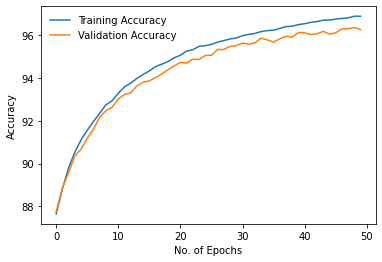

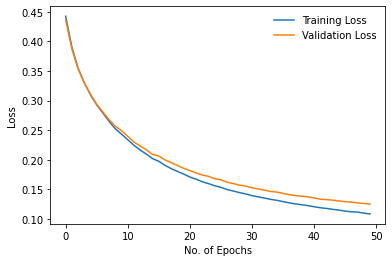

In [0]:
path_model_checkpoint = 'trained_models/MNIST/Binary_models/without_bias'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

### Test Binary network:

In [0]:
# load model pre trained binary
binary = True    
bias=False
model_binary_wt_bias, name_model = get_my_model_MNIST(binary, bias=bias)

path_model = 'trained_models/MNIST/Binary_models/without_bias'
if torch.cuda.is_available():
  model_binary_wt_bias.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_binary_wt_bias.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_Stochastic_ST_first_conv_binary_without_bias


In [0]:
evaluate(model_binary_wt_bias, test_loader)

Test Results - Avg accuracy: 96.92 Avg loss: 0.11


# Visualization:

In [0]:
from visualize.viz import visTensor, get_activation, viz_activations, viz_filters
from visualize.viz import viz_heatmap, test_predict_few_examples, standardize_and_clip, format_for_plotting
from visualize.viz import apply_transforms, GradientAscent, get_filter_layer2
from visualize.viz import get_region_layer1, get_region_layer2, get_regions_interest, get_all_regions_max

# for regions extraction
import collections
from functools import partial
import cv2

## Load model:

In [7]:
# load model pre trained no binary
binary = False
model_no_binary, name_model = get_my_model_MNIST(binary)

path_model = 'trained_models/MNIST/No_binary_models/with_bias'
if torch.cuda.is_available():
  model_no_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_no_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_NonBinaryNet


In [8]:
# load model pre trained binary
binary = True    
model_binary, name_model = get_my_model_MNIST(binary)

path_model = 'trained_models/MNIST/Binary_models/with_bias'
if torch.cuda.is_available():
  model_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_Stochastic_ST_first_conv_binary


In [9]:
# load model pre trained no binary
binary = False
bias=False
model_no_binary_wt_bias, name_model = get_my_model_MNIST(binary, bias=bias)

path_model = 'trained_models/MNIST/No_binary_models/without_bias'
if torch.cuda.is_available():
  model_no_binary_wt_bias.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_no_binary_wt_bias.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_NonBinaryNet_without_bias


In [10]:
# load model pre trained binary
binary = True    
bias=False
model_binary_wt_bias, name_model = get_my_model_MNIST(binary, bias=bias)

path_model = 'trained_models/MNIST/Binary_models/without_bias'
if torch.cuda.is_available():
  model_binary_wt_bias.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_binary_wt_bias.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_Stochastic_ST_first_conv_binary_without_bias


In [0]:
print(model_no_binary)

NoBinaryNetMnist(
  (layer1): Conv2d(1, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer1): ReLU()
  (layer2): Conv2d(10, 20, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm2): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer2): ReLU()
  (fc): Linear(in_features=980, out_features=10, bias=True)
)


In [0]:
print(model_binary)

BinaryNetMNIST(
  (layer1): Conv2d(1, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer1): StochasticBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (layer2): Conv2d(10, 20, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm2): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer2): ReLU()
  (fc): Linear(in_features=980, out_features=10, bias=True)
)


In [0]:
print(model_no_binary_wt_bias)

NoBinaryNetMnist(
  (layer1): Conv2d(1, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (batchnorm1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer1): ReLU()
  (layer2): Conv2d(10, 20, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (batchnorm2): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer2): ReLU()
  (fc): Linear(in_features=980, out_features=10, bias=True)
)


In [0]:
print(model_binary_wt_bias)

BinaryNetMNIST(
  (layer1): Conv2d(1, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (batchnorm1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer1): StochasticBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (layer2): Conv2d(10, 20, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (batchnorm2): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer2): ReLU()
  (fc): Linear(in_features=980, out_features=10, bias=True)
)


## Visualization few predictions:

No binary model


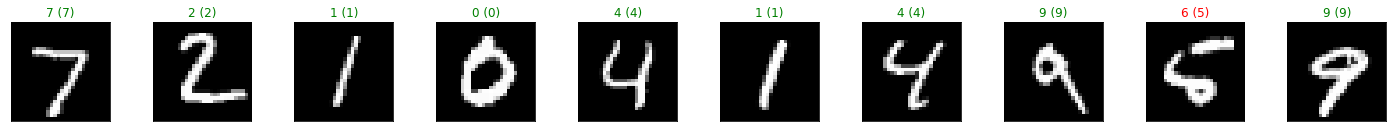

Binary model


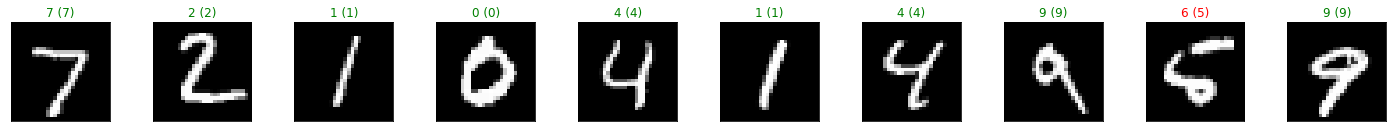

In [0]:
print('No binary model')
test_predict_few_examples(model_no_binary, test_loader)
plt.show()
print('Binary model')
test_predict_few_examples(model_binary, test_loader)
plt.show()

## Visualization Activations values for a specific data:

act_layer1 for label 0


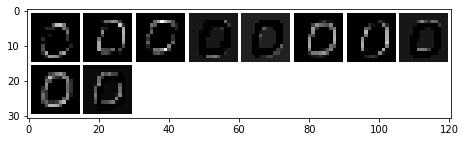

act_layer2 for label 0


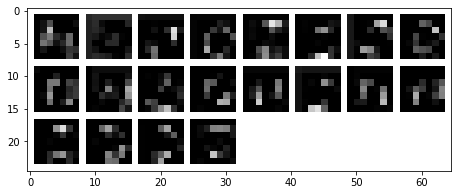

In [0]:
index_data = 10
viz_activations(model_no_binary, test_loader, index_data)

act_layer1.act for label 0


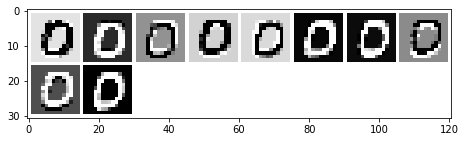

act_layer2 for label 0


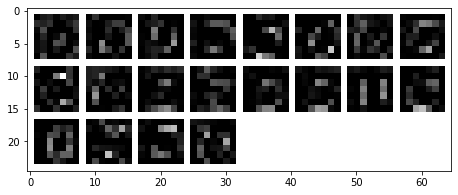

In [0]:
index_data = 10
viz_activations(model_binary, test_loader, index_data)

## Visualization heatmap for a specific data:


layer:act_layer1 :heatrmap for an image of label 0 with model MNIST_Stochastic_ST_first_conv_binary


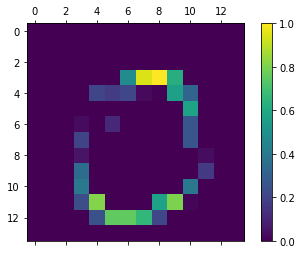

layer:act_layer2 :heatrmap for an image of label 0 with model MNIST_Stochastic_ST_first_conv_binary


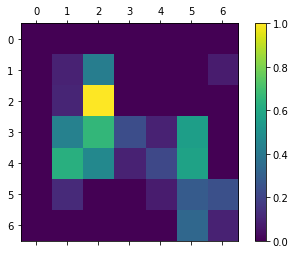

In [0]:
index_data = 10
viz_heatmap(model_no_binary, name_model, test_loader, index_data)

layer:act_layer1.act :heatrmap for an image of label 0 with model MNIST_Stochastic_ST_first_conv_binary


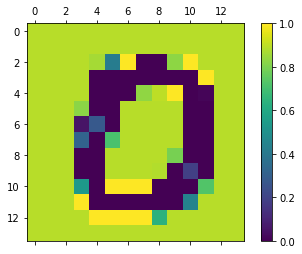

layer:act_layer2 :heatrmap for an image of label 0 with model MNIST_Stochastic_ST_first_conv_binary


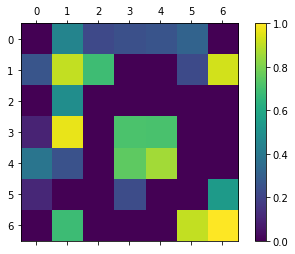

In [0]:
index_data = 10
viz_heatmap(model_binary, name_model, test_loader, index_data)

## Visualization filters trained:

In [0]:
for name, m in model_no_binary.named_modules():
    if type(m) == nn.Conv2d:
        filters = m.weight.data.clone()
        break

In [0]:
filter_0 = filters[0][0]

In [25]:
filter_0

tensor([[-0.0100,  0.2919,  0.1254],
        [ 0.0844,  0.0426,  0.0630],
        [-0.2353, -0.3480, -0.0394]])

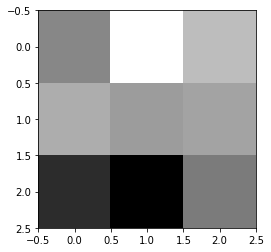

In [26]:
plt.imshow(filter_0, cmap='gray')

tensor(-0.3480) tensor(0.2919)
tensor([[0.5283, 1.0000, 0.7398],
        [0.6758, 0.6104, 0.6423],
        [0.1761, 0.0000, 0.4822]])


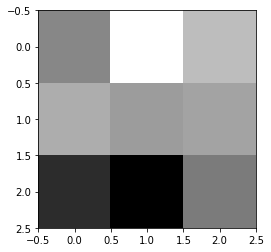

In [29]:
# normalized between 0 et 1:
val_min = filter_0.min()
val_max = filter_0.max()

filter_0_normalized = (filter_0 - val_min)/(val_max - val_min)

print(val_min, val_max)
print(filter_0_normalized)

plt.imshow(filter_0_normalized, cmap='gray')

Visualization filters learned for layer: layer1


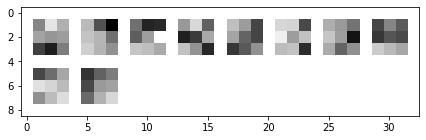

Visualization filters learned for layer: layer2


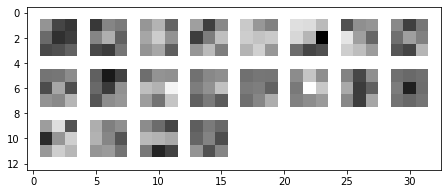

In [11]:
viz_filters(model_no_binary)

Visualization filters learned for layer: layer1


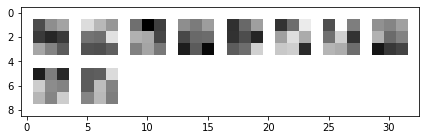

Visualization filters learned for layer: layer2


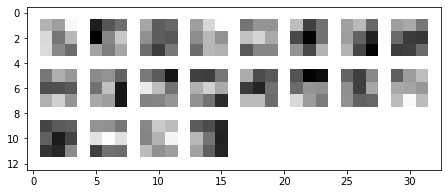

In [0]:
viz_filters(model_binary)

Visualization filters learned for layer: layer1


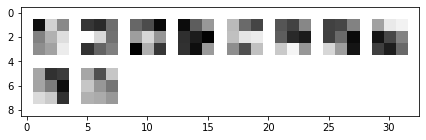

Visualization filters learned for layer: layer2


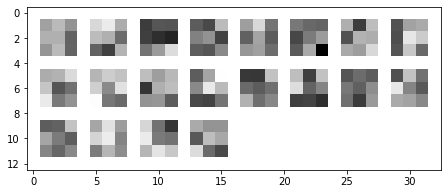

In [0]:
viz_filters(model_no_binary_wt_bias)

Visualization filters learned for layer: layer1


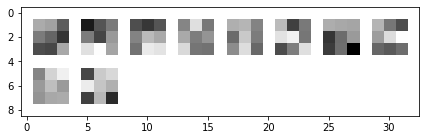

Visualization filters learned for layer: layer2


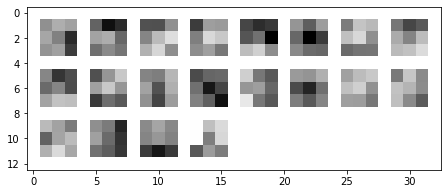

In [0]:
viz_filters(model_binary_wt_bias)

## Visualization image that maximizes a specific activation in a specific layer for a specifc filter:

### No binary model:

In [0]:
g_ascent_no_binary = GradientAscent(model_no_binary, nb_channels=1, img_size=28)
g_ascent_no_binary.use_gpu = True

In [0]:
conv1_no_binary = model_no_binary.layer1
conv1_filters_no_binary = [0,1,2,3,4,5,6,7,8,9]
mean_gradient_layer1 = False
ind_x_layer1 = 7
ind_y_layer1 = 7

conv2_no_binary = model_no_binary.layer2
conv2_filters_no_binary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
mean_gradient_layer2 = False
ind_x_layer2 = 3
ind_y_layer2 = 3

lr=0.0001
num_iter=1000
MNIST = True

Visualization filters learned for layer: layer1


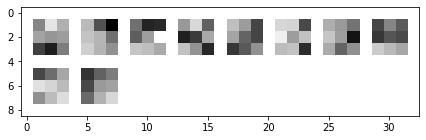

Visualization filters learned for layer: layer2


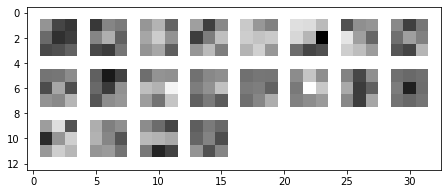

In [0]:
viz_filters(model_no_binary)

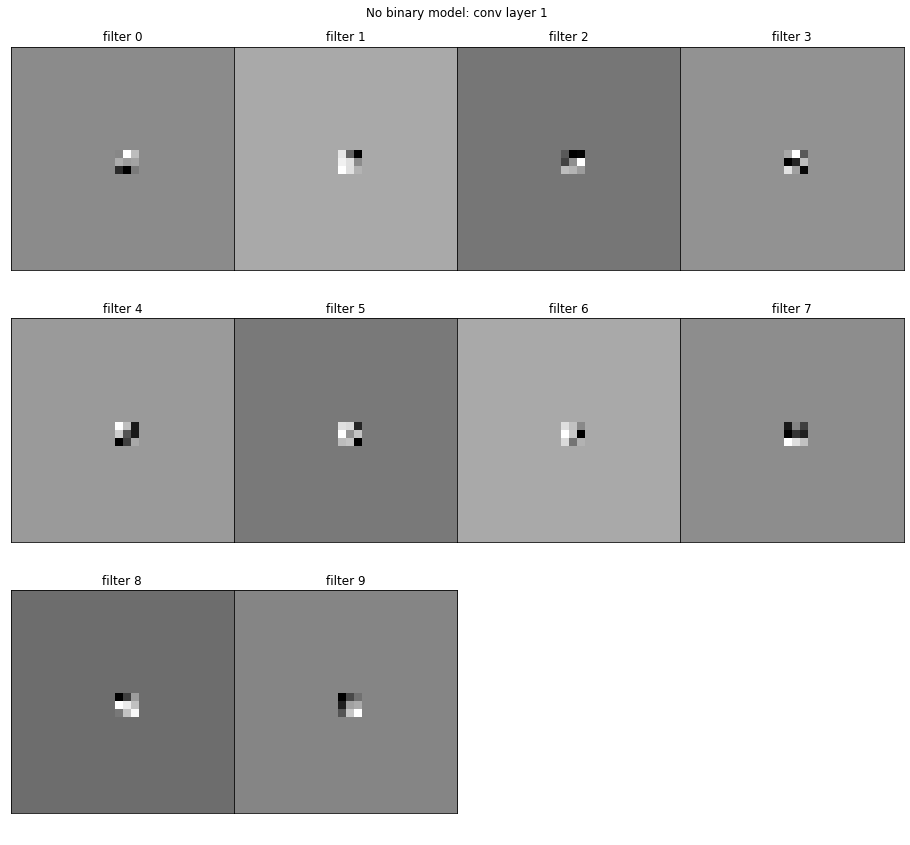

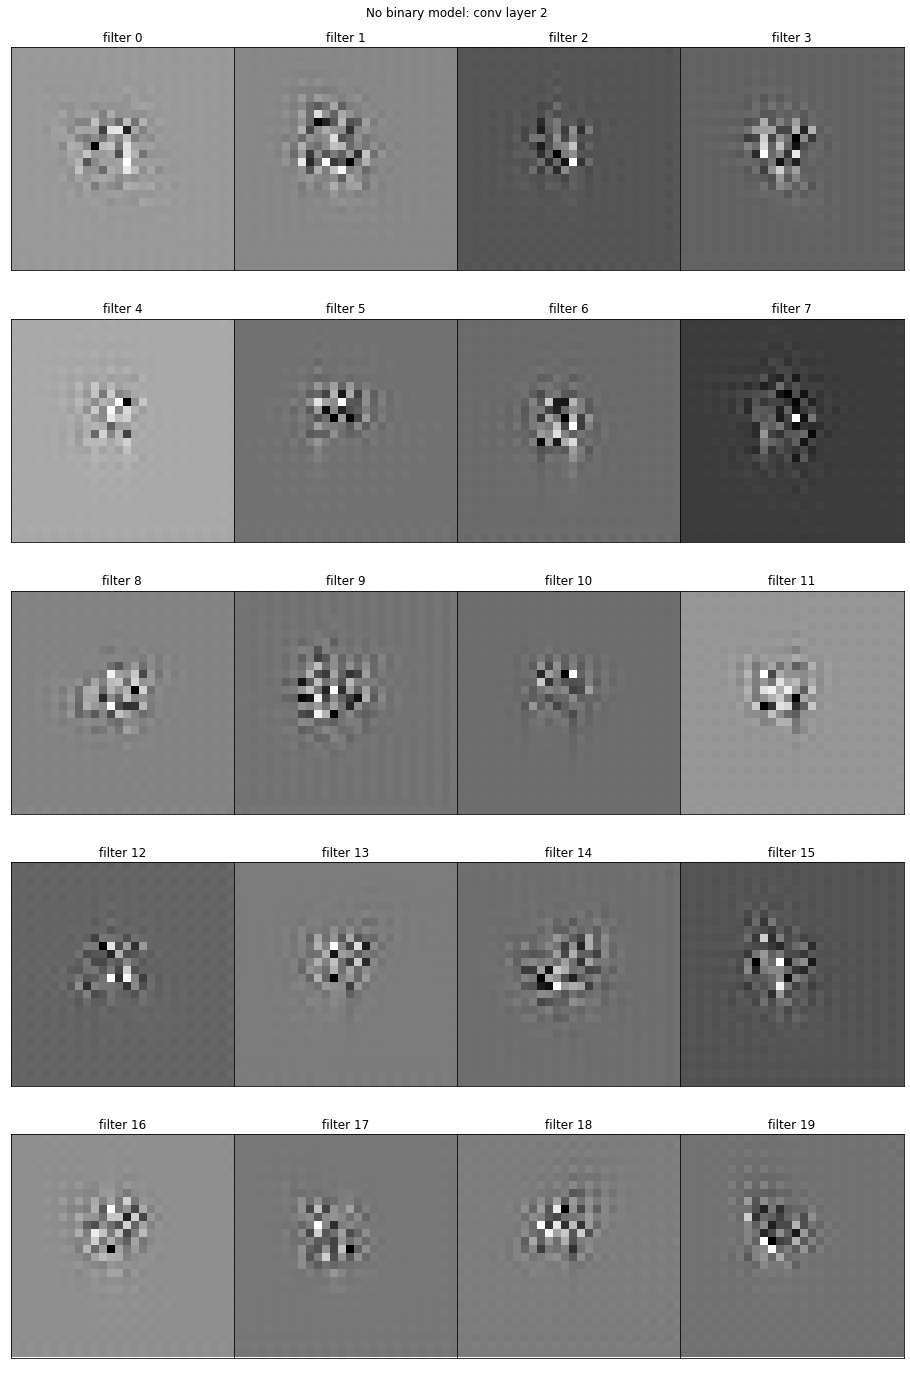

In [0]:
g_ascent_no_binary.visualize(conv1_no_binary, MNIST, conv1_filters_no_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, lr=lr, num_iter=num_iter, title='No binary model: conv layer 1')
g_ascent_no_binary.visualize(conv2_no_binary, MNIST, conv2_filters_no_binary, mean_gradient_layer2,
                             ind_x_layer2, ind_y_layer2, lr=lr, num_iter=num_iter, title='No binary model: conv layer 2')

In [0]:
g_ascent_no_binary = GradientAscent(model_no_binary, nb_channels=1, img_size=28)
g_ascent_no_binary.use_gpu = True

conv1_no_binary = model_no_binary.layer1
conv1_filters_no_binary = [0,1,2,3,4,5,6,7,8,9]
mean_gradient_layer1 = True
ind_x_layer1 = 7
ind_y_layer1 = 7

conv2_no_binary = model_no_binary.layer2
conv2_filters_no_binary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
mean_gradient_layer2 = True
ind_x_layer2 = 3
ind_y_layer2 = 3

lr=0.0001
num_iter=1000
MNIST = True

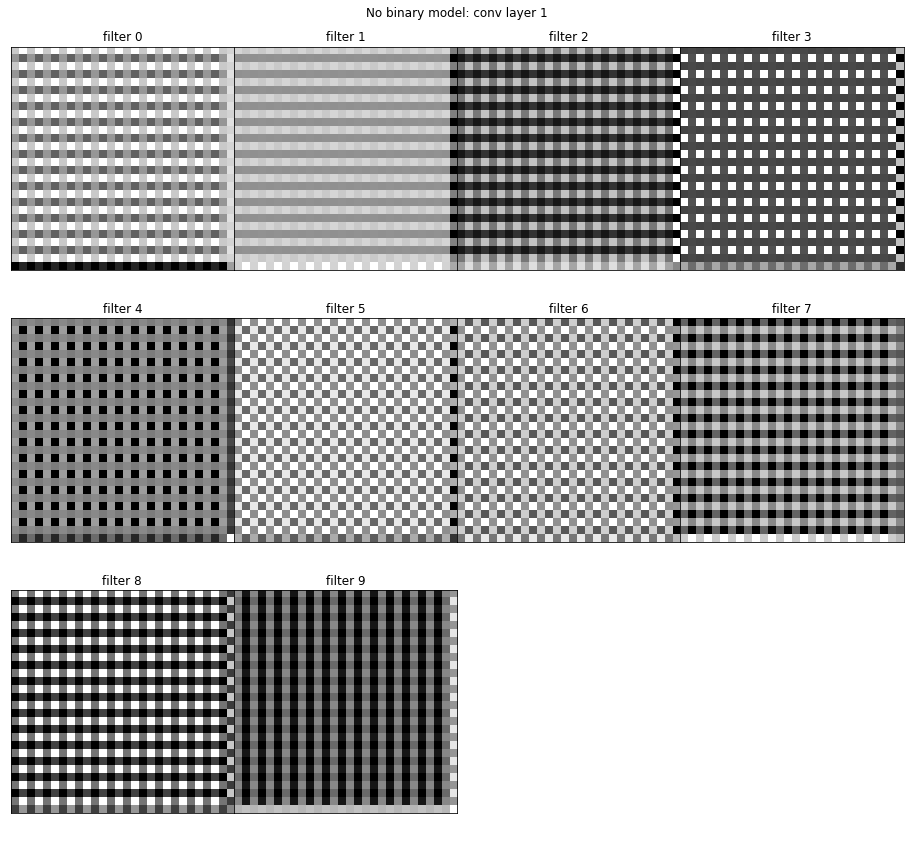

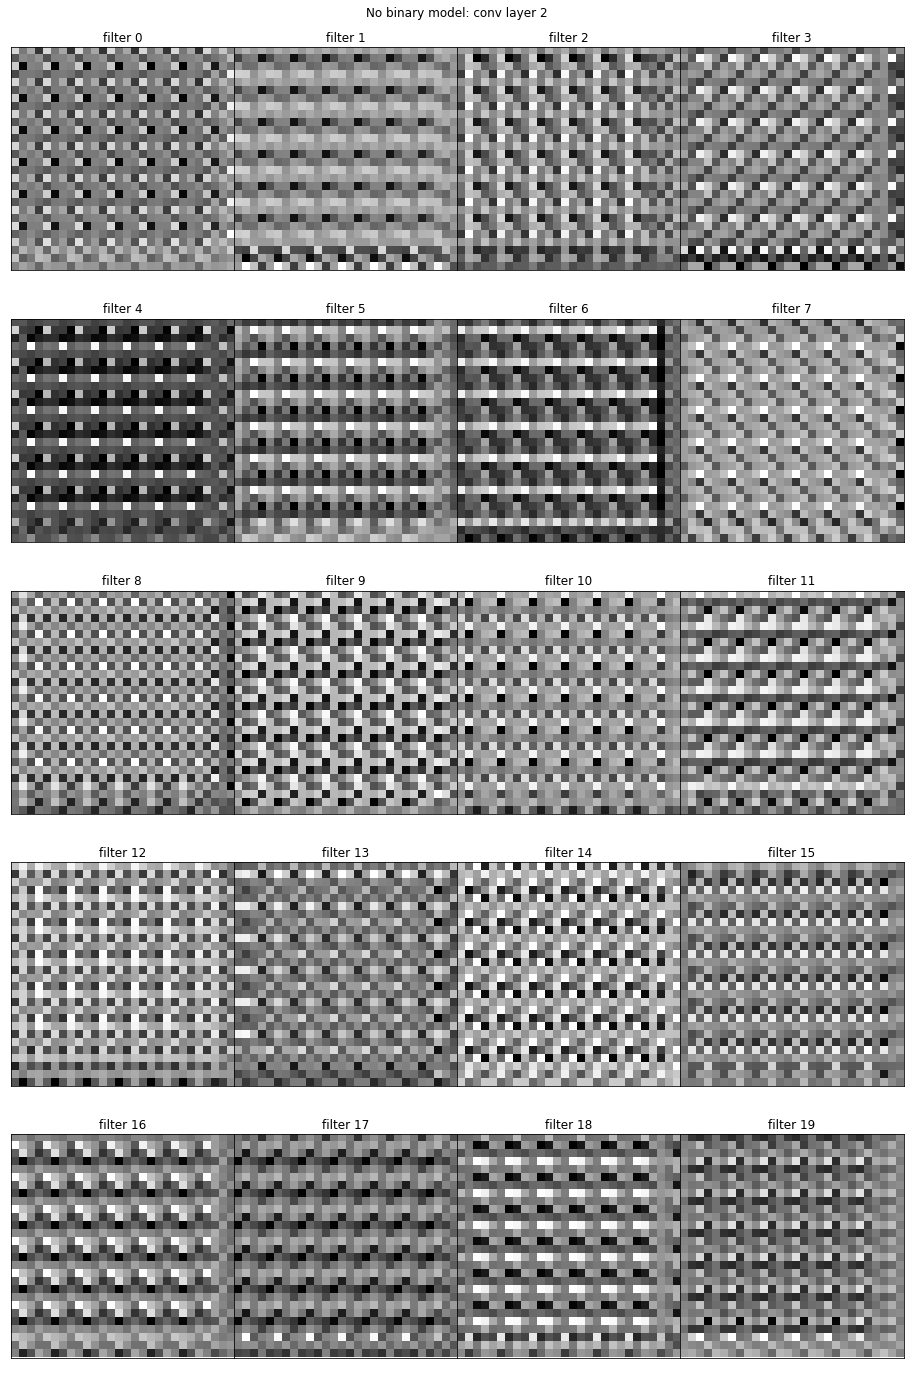

In [0]:
g_ascent_no_binary.visualize(conv1_no_binary, MNIST, conv1_filters_no_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, lr=lr, num_iter=num_iter, title='No binary model: conv layer 1')
g_ascent_no_binary.visualize(conv2_no_binary, MNIST, conv2_filters_no_binary, mean_gradient_layer2,
                             ind_x_layer2, ind_y_layer2, lr=lr, num_iter=num_iter, title='No binary model: conv layer 2')

### Binary model:

In [0]:
g_ascent_binary = GradientAscent(model_binary, nb_channels=1, img_size=28)
g_ascent_binary.use_gpu = True

In [0]:
conv1_binary = model_binary.layer1
conv1_filters_binary = [0,1,2,3,4,5,6,7,8,9]
mean_gradient_layer1 = False
ind_x_layer1 = 7
ind_y_layer1 = 7

conv2_binary = model_binary.layer2
conv2_filters_binary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
mean_gradient_layer2 = False
ind_x_layer2 = 3
ind_y_layer2 = 3

lr=0.0001
num_iter=1000
MNIST = True

Visualization filters learned for layer: layer1


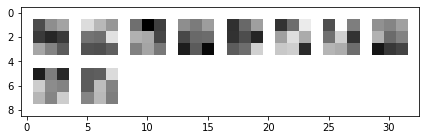

Visualization filters learned for layer: layer2


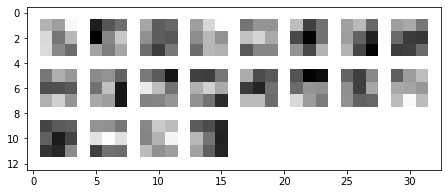

In [0]:
viz_filters(model_binary)

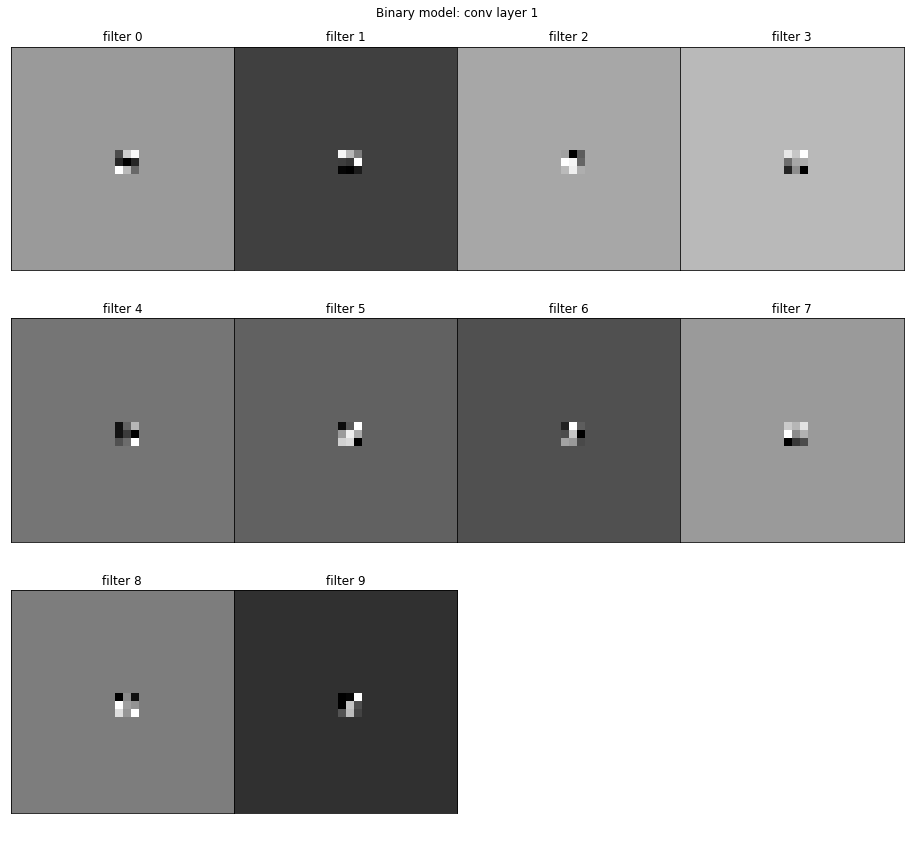

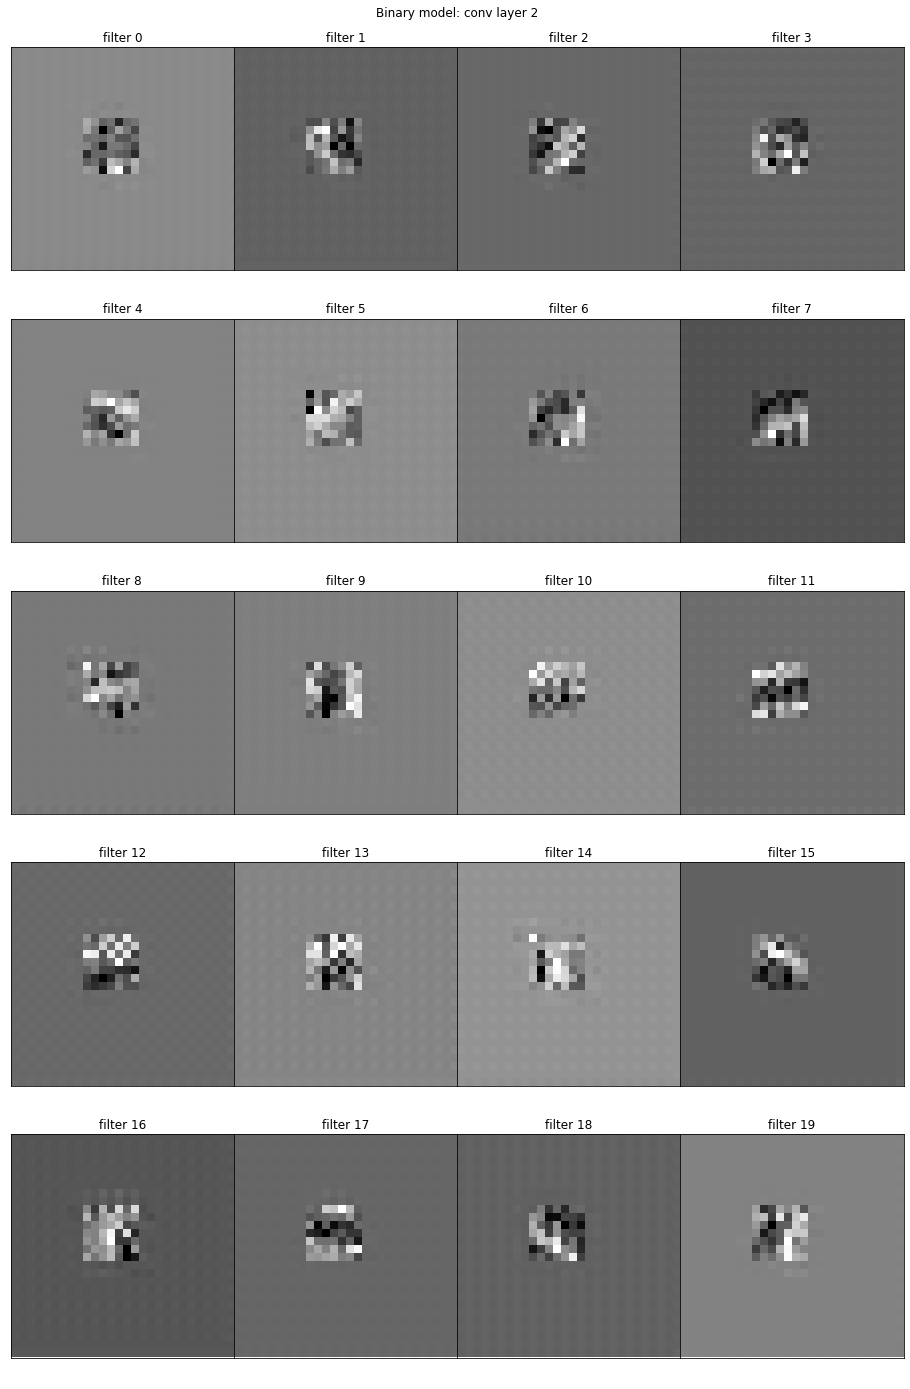

In [0]:
g_ascent_binary.visualize(conv1_binary, MNIST, conv1_filters_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, lr=lr, num_iter=num_iter, title='Binary model: conv layer 1')
g_ascent_binary.visualize(conv2_binary, MNIST, conv2_filters_binary, mean_gradient_layer2,
                             ind_x_layer2, ind_y_layer2, lr=lr, num_iter=num_iter, title='Binary model: conv layer 2')

## Visuazation regions that maximizes a specific layer and filter:

### Run:

#### Extract and save regions and activations:

##### No binary model:

In [0]:
activations_no_binary = collections.defaultdict(list)

In [0]:
def save_activation_no_binary(name, mod, inp, out):
    activations_no_binary[name].append(out.cpu())
     

In [0]:
for name, m in model_no_binary.named_modules():
    if type(m)==nn.Conv2d:
      # partial to assign the layer name to each hook
      m.register_forward_hook(partial(save_activation_no_binary, name))

for batch in train_loader:
  out = model_no_binary(batch[0])
  break  # for only one batch

activations_no_binary = {name: torch.cat(outputs, 0) for name, outputs in activations_no_binary.items()}

for k,v in activations_no_binary.items():
      print (k, v.size())

layer1 torch.Size([10000, 10, 14, 14])
layer2 torch.Size([10000, 20, 7, 7])


In [0]:
stride = 2
padding = 1
filter_size = 3
len_img_w = 28
len_img_h = 28
loader = train_loader

region_final, activation_final, activation_final_normalized = get_all_regions_max(loader, activations_no_binary, stride, padding, filter_size, len_img_h, len_img_w)

region_layer1_no_binary = region_final['layer1']
region_layer2_no_binary = region_final['layer2']
activation_layer1_no_binary = activation_final['layer1']
activation_layer2_no_binary = activation_final['layer2']
activation_layer1_no_binary_normalized = activation_final_normalized['layer1']
activation_layer2_no_binary_normalized = activation_final_normalized['layer2']

print(region_layer1_no_binary.shape)
print(region_layer2_no_binary.shape)
print(activation_layer1_no_binary.shape)
print(activation_layer2_no_binary.shape)
print(activation_layer1_no_binary_normalized.shape)
print(activation_layer2_no_binary_normalized.shape)

In [0]:
np.save('results/MNIST_results/MNIST_regions/No_binary_MNIST_regions_max_layer1.npy', region_layer1_no_binary)
np.save('results/MNIST_results/MNIST_regions/No_binary_MNIST_regions_max_layer2.npy', region_layer2_no_binary)
np.save('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer1.npy', activation_layer1_no_binary)
np.save('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer2.npy', activation_layer2_no_binary)
np.save('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer1_normalized.npy', activation_layer1_no_binary_normalized)
np.save('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer2_normalized.npy', activation_layer2_no_binary_normalized)

##### Binary model:

In [0]:
activations_binary = collections.defaultdict(list)

In [0]:
def save_activation_binary(name, mod, inp, out):
    activations_binary[name].append(out.cpu())

In [0]:
for name, m in model_binary.named_modules():
    if type(m)==nn.Conv2d:
      # partial to assign the layer name to each hook
      m.register_forward_hook(partial(save_activation_binary, name))

for batch in train_loader:
  out = model_binary(batch[0])
  break  # for only one batch

activations_binary = {name: torch.cat(outputs, 0) for name, outputs in activations_binary.items()}

for k,v in activations_binary.items():
      print (k, v.size())

layer1 torch.Size([10000, 10, 14, 14])
layer2 torch.Size([10000, 20, 7, 7])


In [0]:
stride = 2
padding = 1
filter_size = 3
len_img_w = 28
len_img_h = 28
loader = train_loader

region_final, activation_final, activation_final_normalized = get_all_regions_max(loader, activations_binary, stride, padding, filter_size, len_img_h, len_img_w)

region_layer1_binary = region_final['layer1']
region_layer2_binary = region_final['layer2']
activation_layer1_binary = activation_final['layer1']
activation_layer2_binary = activation_final['layer2']
activation_layer1_binary_normalized = activation_final_normalized['layer1']
activation_layer2_binary_normalized = activation_final_normalized['layer2']

print(region_layer1_binary.shape)
print(region_layer2_binary.shape)
print(activation_layer1_binary.shape)
print(activation_layer2_binary.shape)
print(activation_layer1_binary_normalized.shape)
print(activation_layer2_binary_normalized.shape)

In [0]:
np.save('results/MNIST_results/MNIST_regions/Binary_MNIST_regions_max_layer1.npy', region_layer1_binary)
np.save('results/MNIST_results/MNIST_regions/Binary_MNIST_regions_max_layer2.npy', region_layer2_binary)
np.save('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer1.npy', activation_layer1_binary)
np.save('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer2.npy', activation_layer2_binary)
np.save('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer1_normalized.npy', activation_layer1_binary_normalized)
np.save('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer2_normalized.npy', activation_layer2_binary_normalized)

##### No binary model without bias:

In [0]:
activations_no_binary_without_bias = collections.defaultdict(list)

In [0]:
def save_activation_no_binary(name, mod, inp, out):
    activations_no_binary_without_bias[name].append(out.cpu())

In [0]:
for name, m in model_no_binary_wt_bias.named_modules():
    if type(m)==nn.Conv2d:
      # partial to assign the layer name to each hook
      m.register_forward_hook(partial(activations_no_binary_without_bias, name))

for batch in train_loader:
  out = model_no_binary_wt_bias(batch[0])
  break  # for only one batch

activations_no_binary_without_bias = {name: torch.cat(outputs, 0) for name, outputs in activations_no_binary_without_bias.items()}

for k,v in activations_no_binary_without_bias.items():
      print (k, v.size())

TypeError: ignored

In [0]:
stride = 2
padding = 1
filter_size = 3
len_img_w = 28
len_img_h = 28
loader = train_loader

region_final, activation_final, activation_final_normalized = get_all_regions_max(loader, activations_no_binary_without_bias, stride, padding, filter_size, len_img_h, len_img_w)

region_layer1_no_binary_without_bias = region_final['layer1']
region_layer2_no_binary_without_bias = region_final['layer2']
activation_layer1_no_binary_without_bias = activation_final['layer1']
activation_layer2_no_binary_without_bias = activation_final['layer2']
activation_layer1_no_binary_normalized_without_bias = activation_final_normalized['layer1']
activation_layer2_no_binary_normalized_without_bias = activation_final_normalized['layer2']

print(region_layer1_no_binary_without_bias.shape)
print(region_layer2_no_binary_without_bias.shape)
print(activation_layer1_no_binary_without_bias.shape)
print(activation_layer2_no_binary_without_bias.shape)
print(activation_layer1_no_binary_normalized_without_bias.shape)
print(activation_layer2_no_binary_normalized_without_bias.shape)

In [0]:
np.save('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_regions_max_layer1.npy', region_layer1_no_binary_without_bias)
np.save('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_regions_max_layer2.npy', region_layer2_no_binary_without_bias)
np.save('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_activations_max_layer1.npy', activation_layer1_no_binary_without_bias)
np.save('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_activations_max_layer2.npy', activation_layer2_no_binary_without_bias)
np.save('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_activations_max_layer1_normalized.npy', activation_layer1_no_binary_normalized_without_bias)
np.save('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_activations_max_layer2_normalized.npy', activation_layer2_no_binary_normalized_without_bias)

##### Binary model without bias:

In [0]:
activations_binary_without_bias = collections.defaultdict(list)

In [0]:
def save_activation_binary(name, mod, inp, out):
    activations_binary_without_bias[name].append(out.cpu())

In [0]:
for name, m in model_binary_wt_bias.named_modules():
    if type(m)==nn.Conv2d:
      # partial to assign the layer name to each hook
      m.register_forward_hook(partial(activations_binary_without_bias, name))

for batch in train_loader:
  out = model_binary_wt_bias(batch[0])
  break  # for only one batch

activations_binary_without_bias = {name: torch.cat(outputs, 0) for name, outputs in activations_binary_without_bias.items()}

for k,v in activations_binary_without_bias.items():
      print (k, v.size())

In [0]:
stride = 2
padding = 1
filter_size = 3
len_img_w = 28
len_img_h = 28
loader = train_loader

region_final, activation_final, activation_final_normalized = get_all_regions_max(loader, activations_binary_without_bias, stride, padding, filter_size, len_img_h, len_img_w)

region_layer1_binary_without_bias = region_final['layer1']
region_layer2_binary_without_bias = region_final['layer2']
activation_layer1_binary_without_bias = activation_final['layer1']
activation_layer2_binary_without_bias = activation_final['layer2']
activation_layer1_binary_normalized_without_bias = activation_final_normalized['layer1']
activation_layer2_binary_normalized_without_bias = activation_final_normalized['layer2']

print(region_layer1_binary_without_bias.shape)
print(region_layer2_binary_without_bias.shape)
print(activation_layer1_binary_without_bias.shape)
print(activation_layer2_binary_without_bias.shape)
print(activation_layer1_binary_normalized_without_bias.shape)
print(activation_layer2_binary_normalized_without_bias.shape)

In [0]:
np.save('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_regions_max_layer1.npy', region_layer1_binary_without_bias)
np.save('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_regions_max_layer2.npy', region_layer2_binary_without_bias)
np.save('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_activations_max_layer1.npy', activation_layer1_binary_without_bias)
np.save('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_activations_max_layer2.npy', activation_layer2_binary_without_bias)
np.save('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_activations_max_layer1_normalized.npy', activation_layer1_binary_normalized_without_bias)
np.save('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_activations_max_layer2_normalized.npy', activation_layer2_binary_normalized_without_bias)

### Visualize max regions:

#### Load regions and activations:

In [0]:
region_layer1_no_binary = np.load('results/MNIST_results/MNIST_regions/No_binary_MNIST_regions_max_layer1.npy', allow_pickle=True)
region_layer2_no_binary = np.load('results/MNIST_results/MNIST_regions/No_binary_MNIST_regions_max_layer2.npy', allow_pickle=True)
activation_layer1_no_binary = np.load('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer1.npy', allow_pickle=True)
activation_layer2_no_binary = np.load('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer2.npy', allow_pickle=True)
activation_layer1_no_binary_normalized = np.load('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer1_normalized.npy', allow_pickle=True)
activation_layer2_no_binary_normalized = np.load('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer2_normalized.npy', allow_pickle=True)

In [0]:
region_layer1_binary = np.load('results/MNIST_results/MNIST_regions/Binary_MNIST_regions_max_layer1.npy', allow_pickle=True)
region_layer2_binary = np.load('results/MNIST_results/MNIST_regions/Binary_MNIST_regions_max_layer2.npy', allow_pickle=True)
activation_layer1_binary = np.load('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer1.npy', allow_pickle=True)
activation_layer2_binary = np.load('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer2.npy', allow_pickle=True)
activation_layer1_binary_normalized = np.load('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer1_normalized.npy', allow_pickle=True)
activation_layer2_binary_normalized = np.load('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer2_normalized.npy', allow_pickle=True)

In [0]:
region_layer1_no_binary_without_bias = np.load('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_regions_max_layer1.npy', allow_pickle=True)
region_layer2_no_binary_without_bias = np.load('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_regions_max_layer2.npy', allow_pickle=True)
activation_layer1_no_binary_without_bias = np.load('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_activations_max_layer1.npy', allow_pickle=True)
activation_layer2_no_binary_without_bias = np.load('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_activations_max_layer2.npy', allow_pickle=True)
activation_layer1_no_binary_normalized_without_bias = np.load('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_activations_max_layer1_normalized.npy', allow_pickle=True)
activation_layer2_no_binary_normalized_without_bias = np.load('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_activations_max_layer2_normalized.npy', allow_pickle=True)

In [0]:
region_layer1_binary_without_bias = np.load('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_regions_max_layer1.npy', allow_pickle=True)
region_layer2_binary_without_bias = np.load('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_regions_max_layer2.npy', allow_pickle=True)
activation_layer1_binary_without_bias = np.load('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_activations_max_layer1.npy', allow_pickle=True)
activation_layer2_binary_without_bias = np.load('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_activations_max_layer2.npy', allow_pickle=True)
activation_layer1_binary_normalized_without_bias = np.load('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_activations_max_layer1_normalized.npy', allow_pickle=True)
activation_layer2_binary_normalized_without_bias = np.load('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_activations_max_layer2_normalized.npy', allow_pickle=True)

#### Viz:

Visualization filters learned for layer: layer1


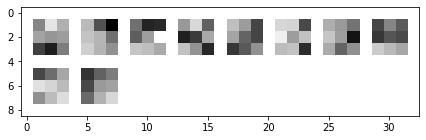

Visualization filters learned for layer: layer2


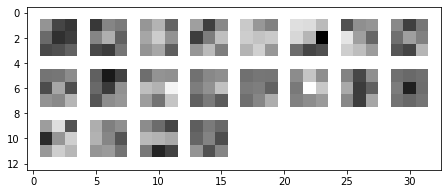

In [0]:
viz_filters(model_no_binary)

##### No binary model layer1:

Interest of filters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Consider 1% image regions = 100 images
mean image:
mean regions of 100 regions more=True or worst=False active for filter number: 0 :


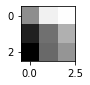

normalized region:


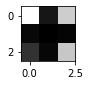

mean regions of 100 regions more=True or worst=False active for filter number: 1 :


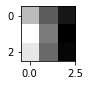

normalized region:


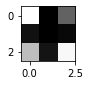

mean regions of 100 regions more=True or worst=False active for filter number: 2 :


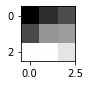

normalized region:


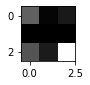

mean regions of 100 regions more=True or worst=False active for filter number: 3 :


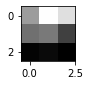

normalized region:


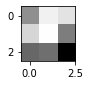

mean regions of 100 regions more=True or worst=False active for filter number: 4 :


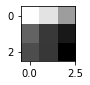

normalized region:


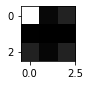

mean regions of 100 regions more=True or worst=False active for filter number: 5 :


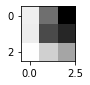

normalized region:


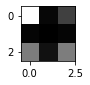

mean regions of 100 regions more=True or worst=False active for filter number: 6 :


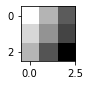

normalized region:


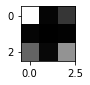

mean regions of 100 regions more=True or worst=False active for filter number: 7 :


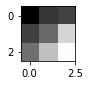

normalized region:


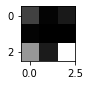

mean regions of 100 regions more=True or worst=False active for filter number: 8 :


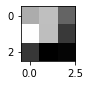

normalized region:


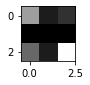

mean regions of 100 regions more=True or worst=False active for filter number: 9 :


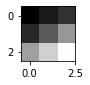

normalized region:


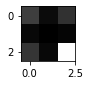

grid image
grid regions of 100 regions more=True or worst=False active for filter number: 0 :


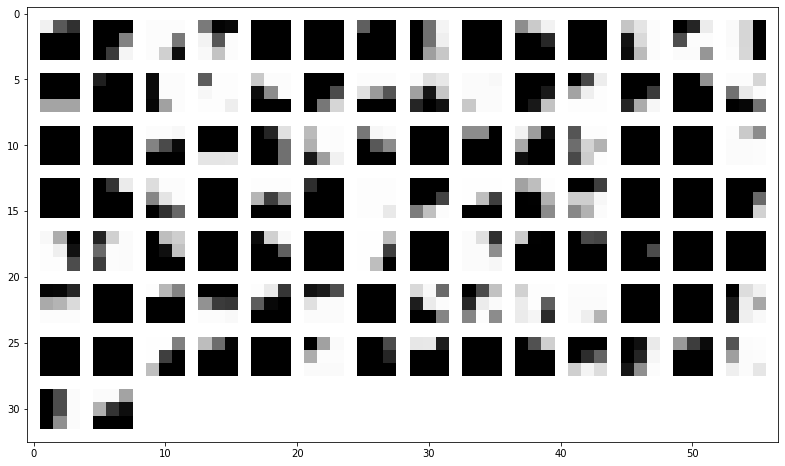

normalized regions:


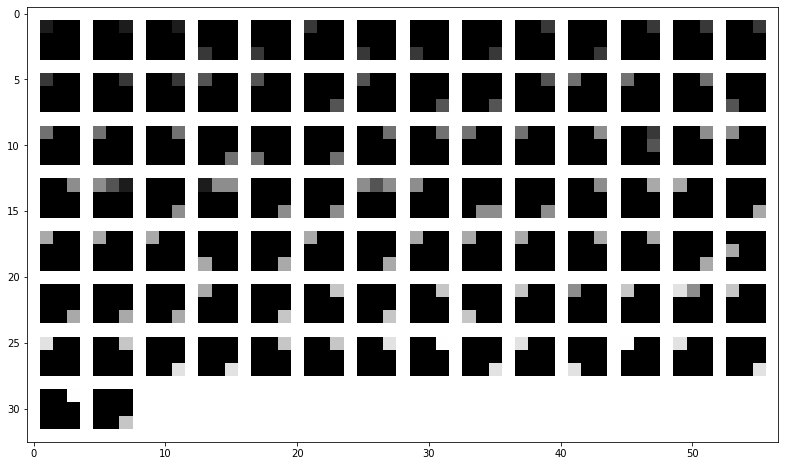

grid regions of 100 regions more=True or worst=False active for filter number: 1 :


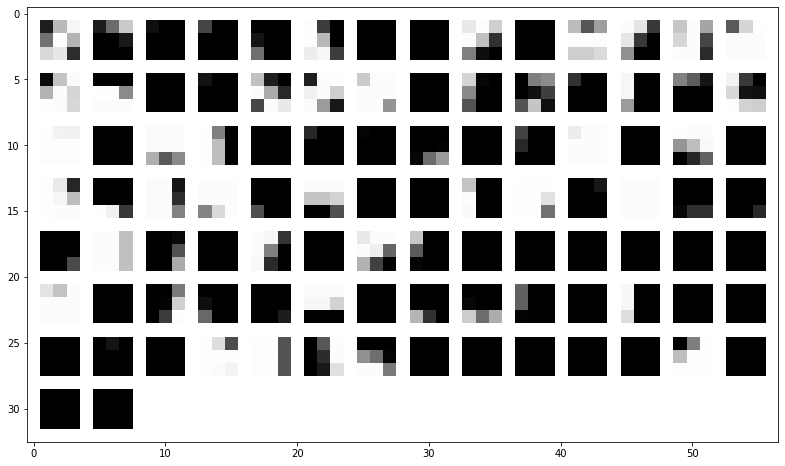

normalized regions:


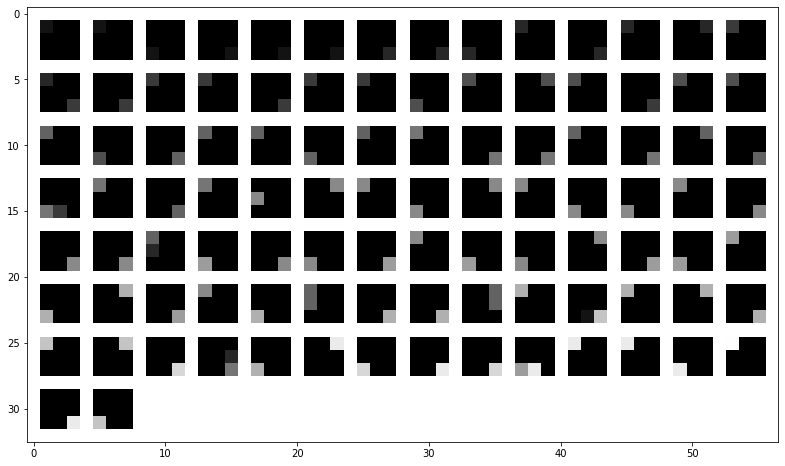

grid regions of 100 regions more=True or worst=False active for filter number: 2 :


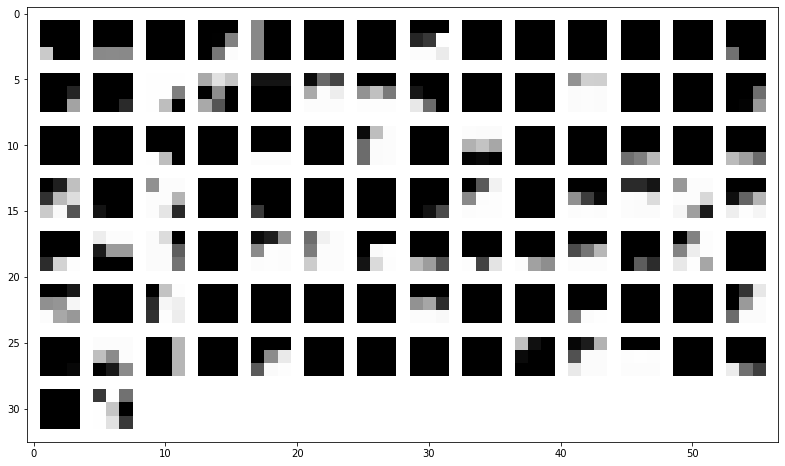

normalized regions:


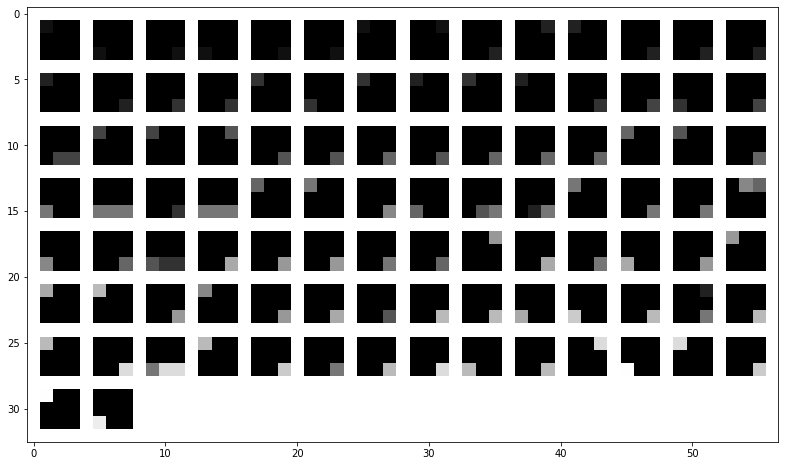

grid regions of 100 regions more=True or worst=False active for filter number: 3 :


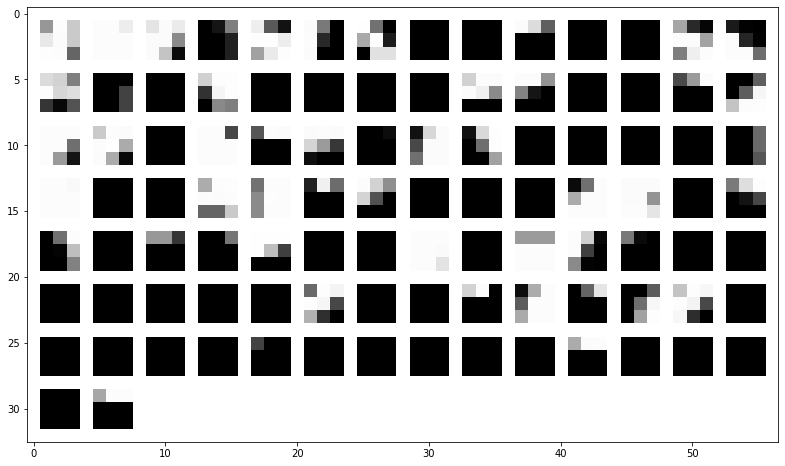

normalized regions:


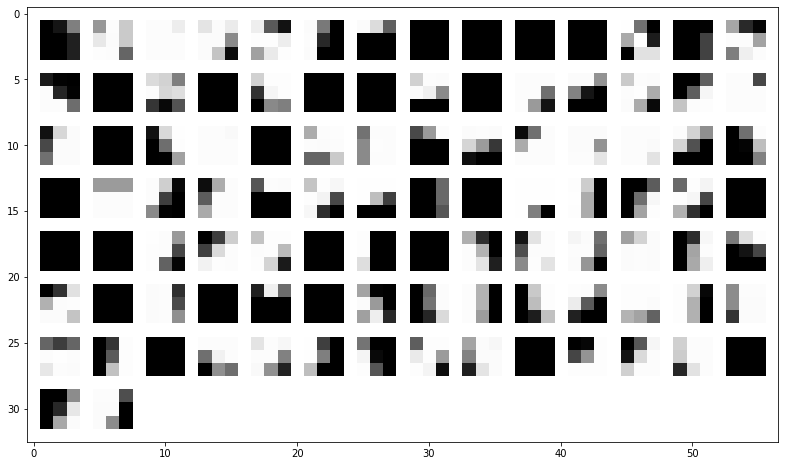

grid regions of 100 regions more=True or worst=False active for filter number: 4 :


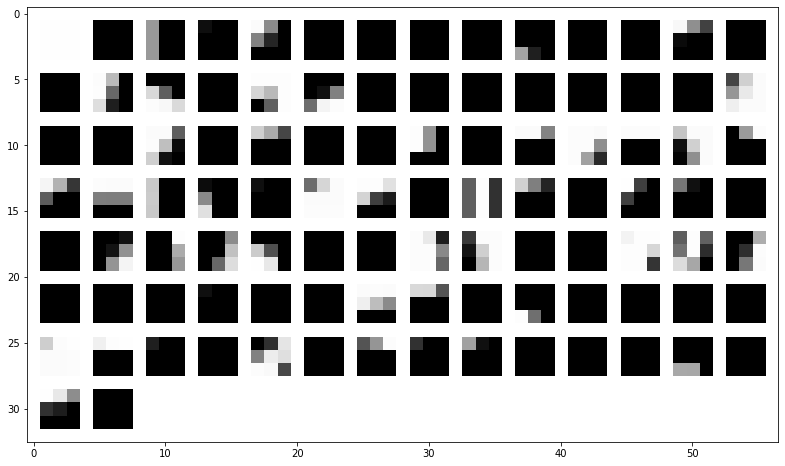

normalized regions:


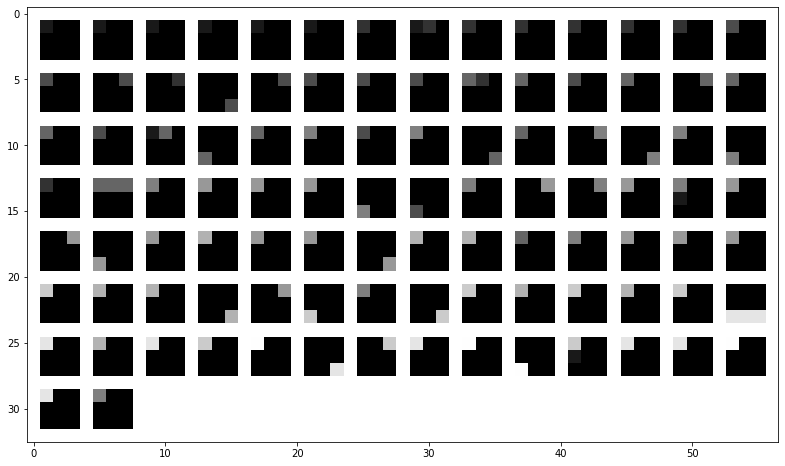

grid regions of 100 regions more=True or worst=False active for filter number: 5 :


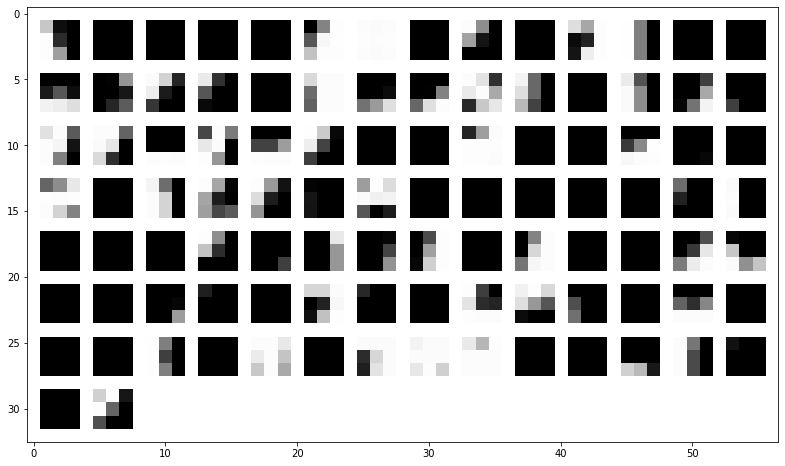

normalized regions:


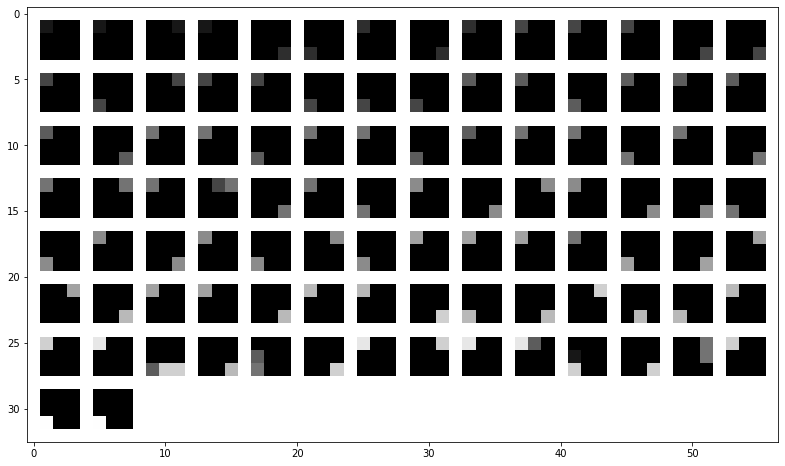

grid regions of 100 regions more=True or worst=False active for filter number: 6 :


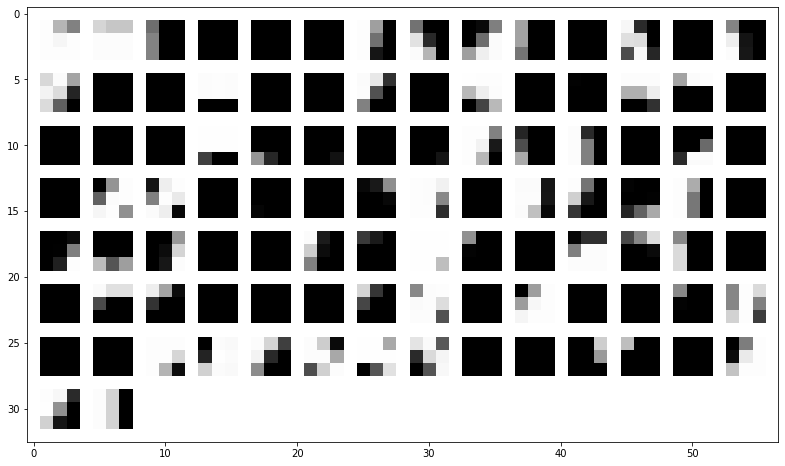

normalized regions:


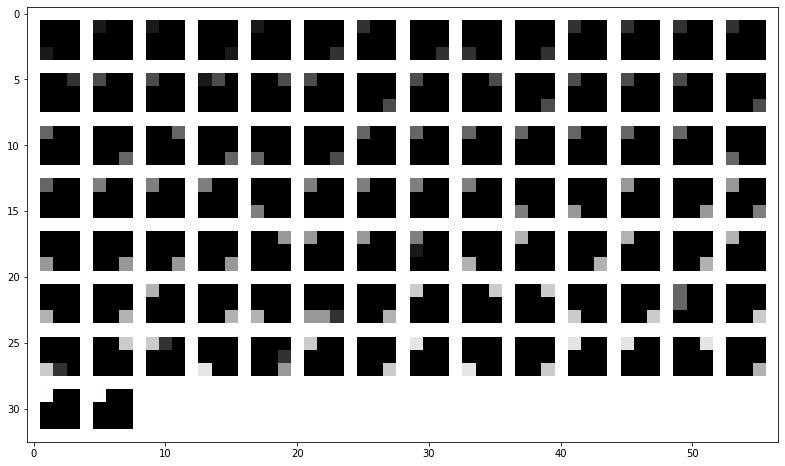

grid regions of 100 regions more=True or worst=False active for filter number: 7 :


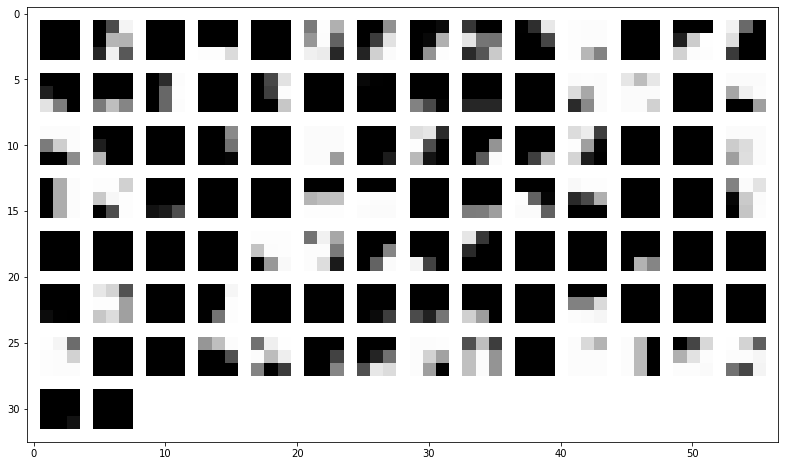

normalized regions:


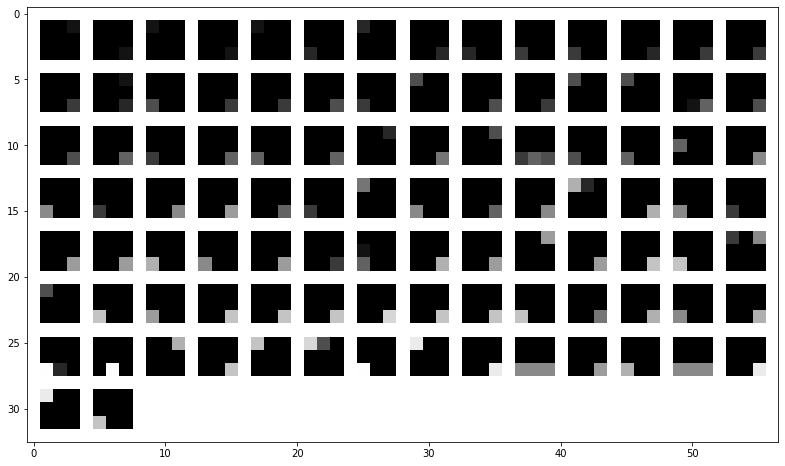

grid regions of 100 regions more=True or worst=False active for filter number: 8 :


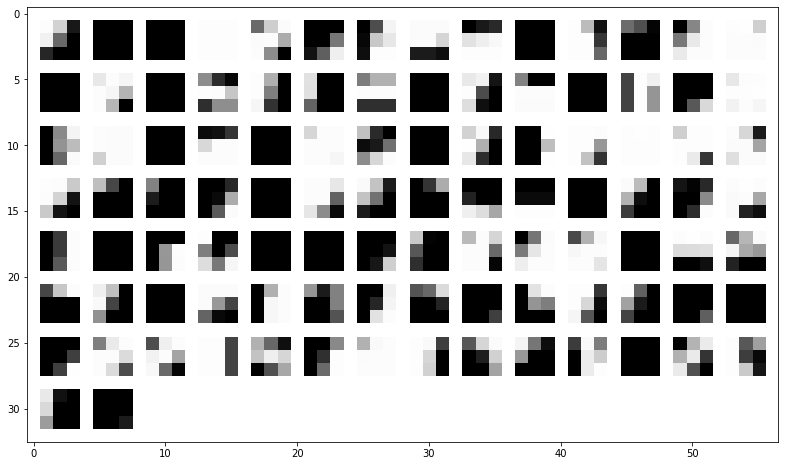

normalized regions:


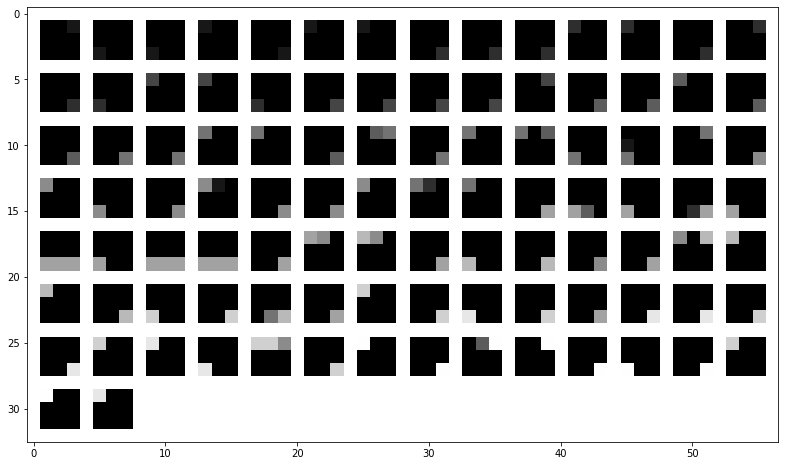

grid regions of 100 regions more=True or worst=False active for filter number: 9 :


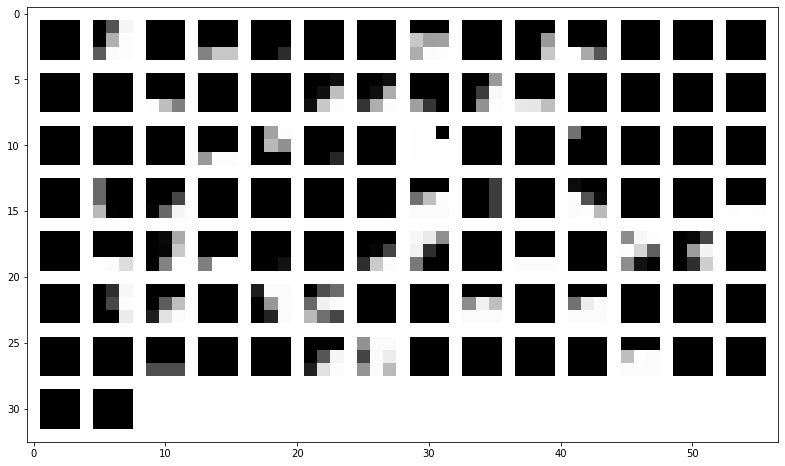

normalized regions:


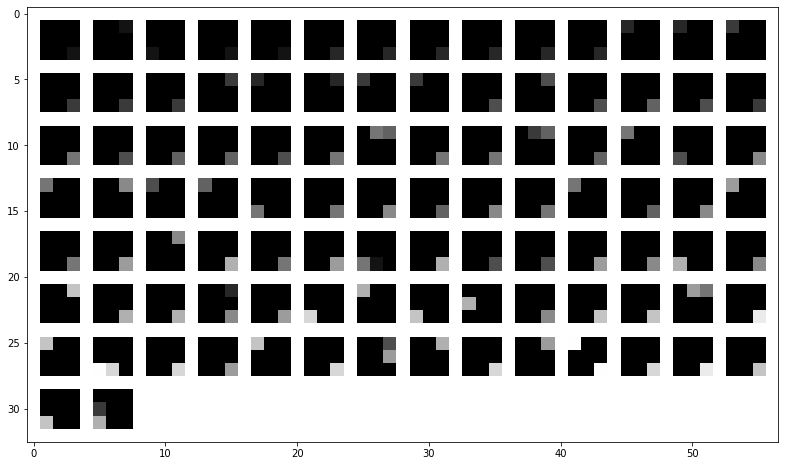

In [0]:
# parameters
list_filter_interest_layer1 = [0,1,2,3,4,5,6,7,8,9]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 1
nrow=14

# regions and activation of interest
regions = region_layer1_no_binary
activations = activation_layer1_no_binary
activations_normalized = activation_layer1_no_binary_normalized

selected_regions, activation_values, activation_values_normalized = get_regions_interest(regions, activations, activations_normalized, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer1, nrow=nrow)

In [0]:
activation_values

[array([0.79804754, 0.79804754, 0.79558432, 0.79558432, 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.7923367 ,
        0.79191238, 0.79183894, 0.79148471, 0.7914781 , 0.79117286,
        0.79107058, 0.79107058, 0.79098642, 0.79

In [0]:
activation_values_normalized

[array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf

##### No binary model layer2:

In [0]:
# parameters
list_filter_interest_layer2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer2_no_binary
activations = activation_layer2_no_binary
activations_normalized = activation_layer2_no_binary_normalized

selected_regions, activation_values, activation_values_normalized = get_regions_interest(regions, activations, activations_normalized, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer2)

Output hidden; open in https://colab.research.google.com to view.

##### Binary model layer1:

Visualization filters learned for layer: layer1


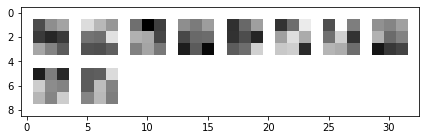

Visualization filters learned for layer: layer2


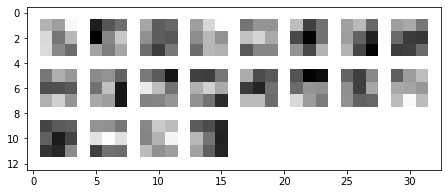

In [0]:
viz_filters(model_binary)

Interest of filters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Consider 10% image regions = 1000 images
mean image:
mean regions of 1000 regions more=True or worst=False active for filter number: 0 :


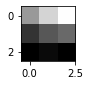

normalized region:


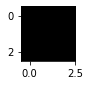

mean regions of 1000 regions more=True or worst=False active for filter number: 1 :


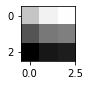

normalized region:


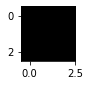

mean regions of 1000 regions more=True or worst=False active for filter number: 2 :


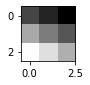

normalized region:


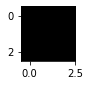

mean regions of 1000 regions more=True or worst=False active for filter number: 3 :


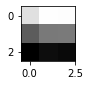

normalized region:


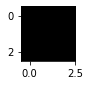

mean regions of 1000 regions more=True or worst=False active for filter number: 4 :


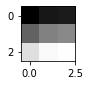

normalized region:


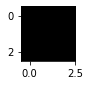

mean regions of 1000 regions more=True or worst=False active for filter number: 5 :


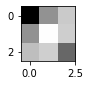

normalized region:


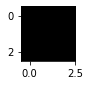

mean regions of 1000 regions more=True or worst=False active for filter number: 6 :


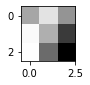

normalized region:


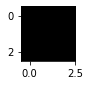

mean regions of 1000 regions more=True or worst=False active for filter number: 7 :


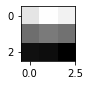

normalized region:


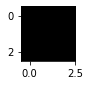

mean regions of 1000 regions more=True or worst=False active for filter number: 8 :


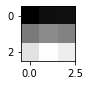

normalized region:


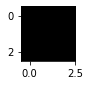

mean regions of 1000 regions more=True or worst=False active for filter number: 9 :


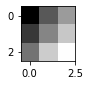

normalized region:


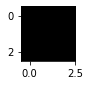

grid image
grid regions of 1000 regions more=True or worst=False active for filter number: 0 :


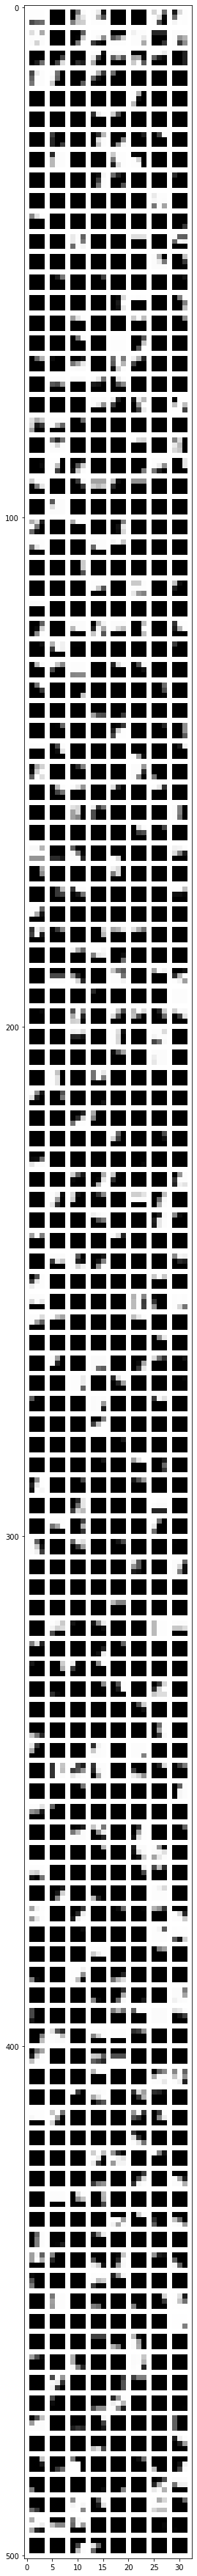

normalized regions:


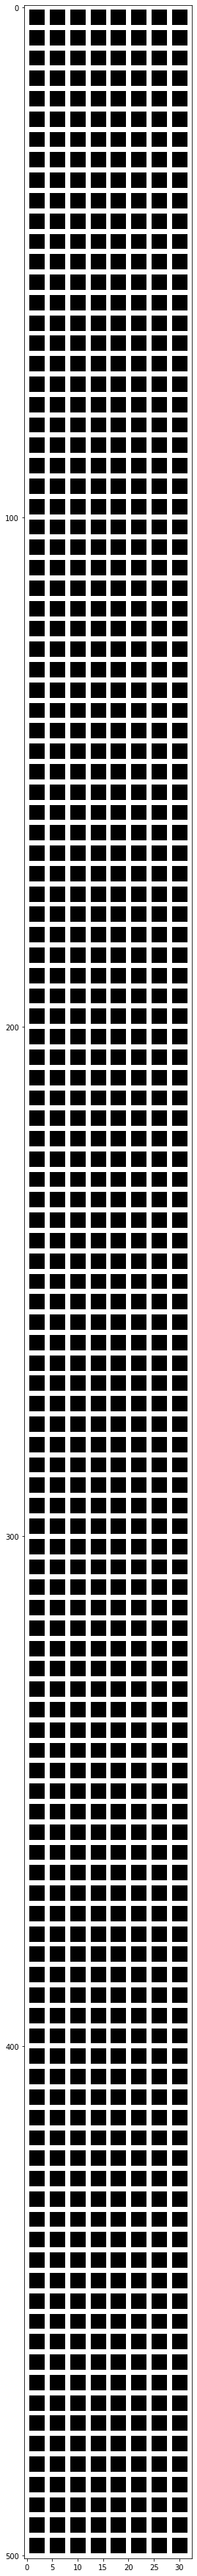

grid regions of 1000 regions more=True or worst=False active for filter number: 1 :


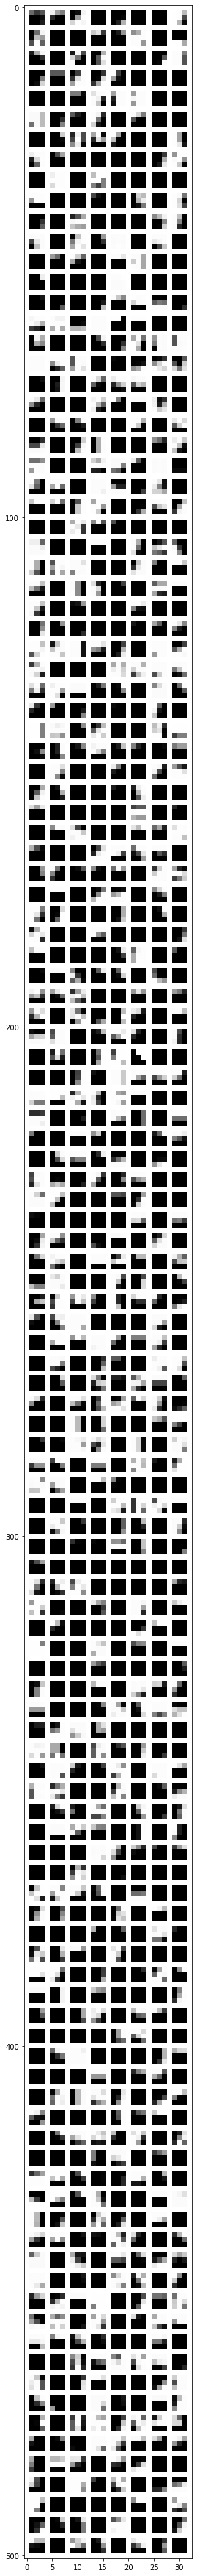

normalized regions:


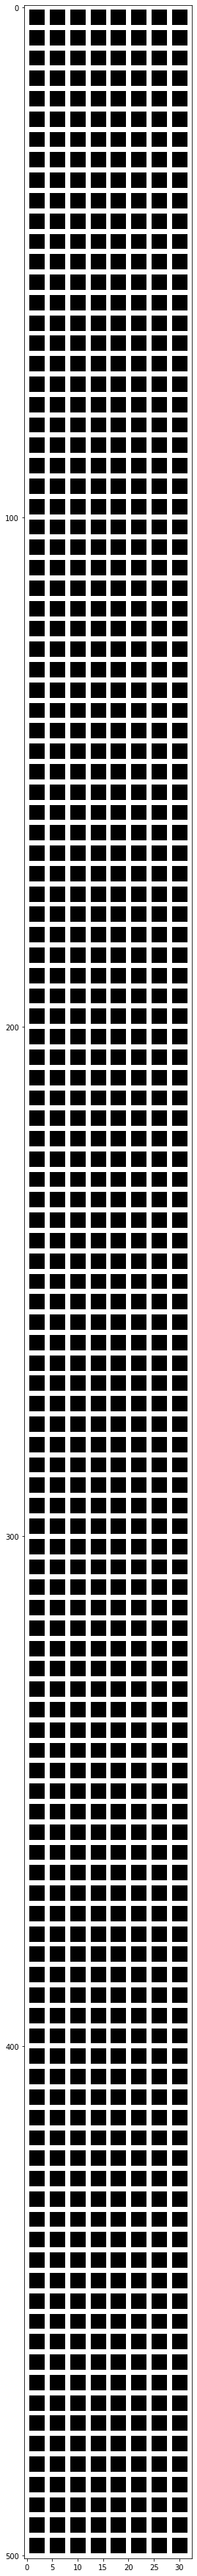

grid regions of 1000 regions more=True or worst=False active for filter number: 2 :


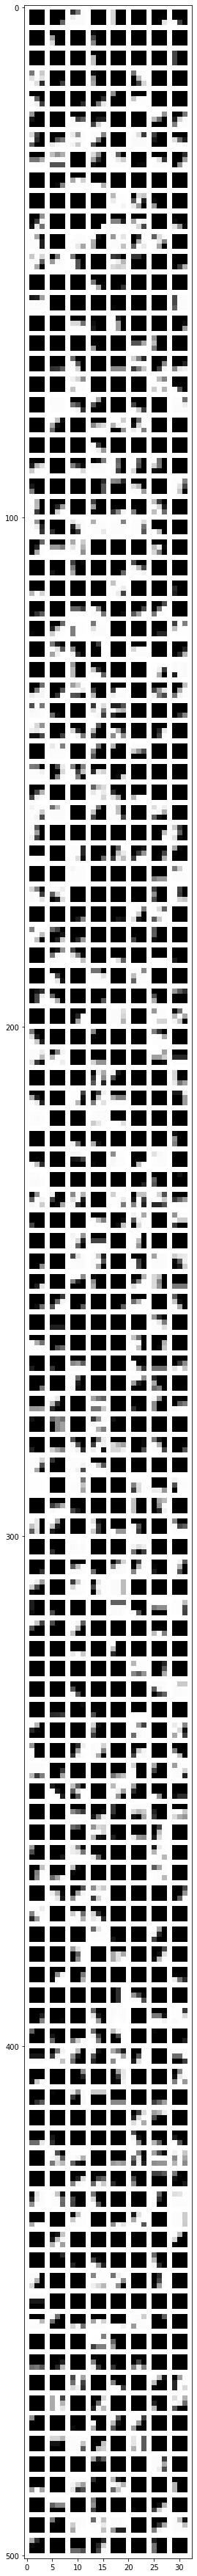

normalized regions:


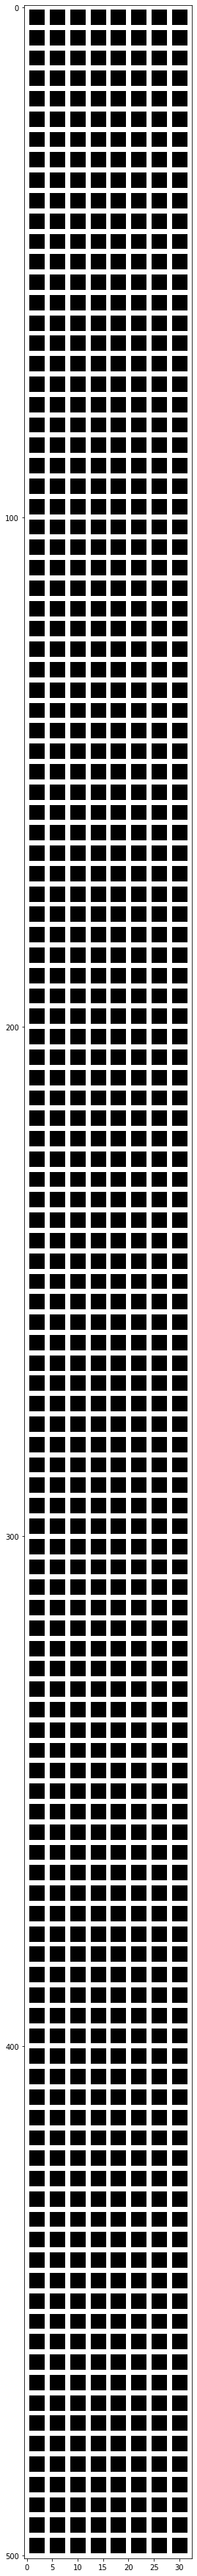

grid regions of 1000 regions more=True or worst=False active for filter number: 3 :


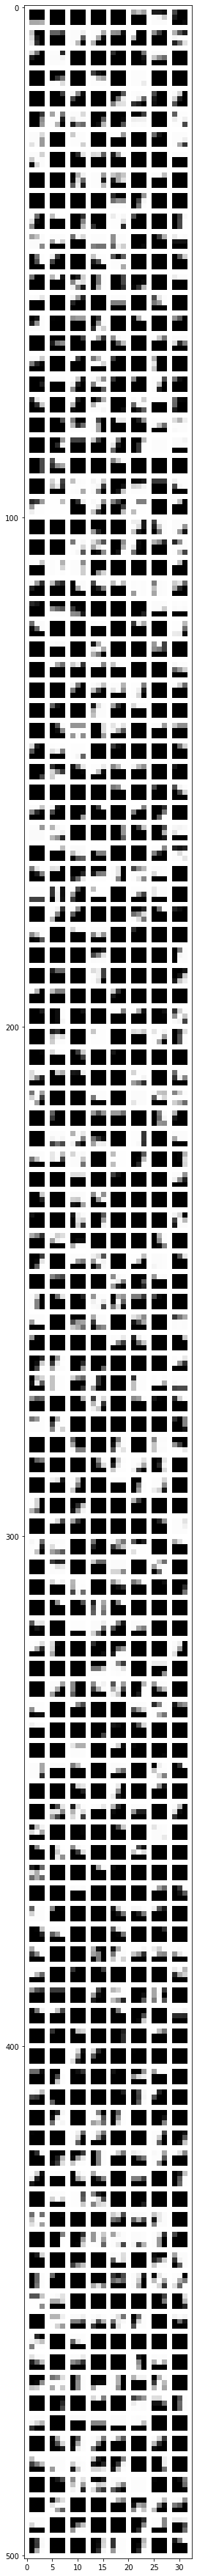

normalized regions:


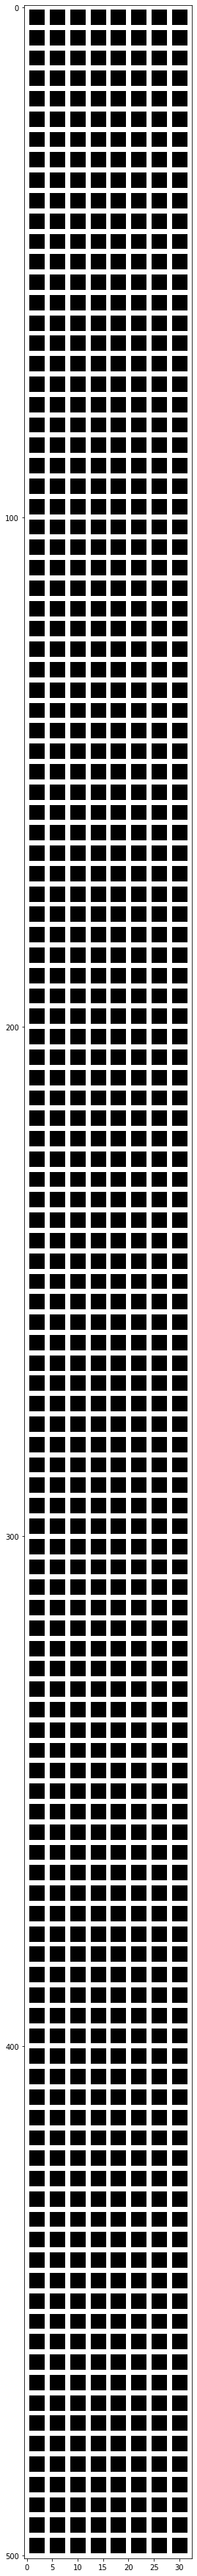

grid regions of 1000 regions more=True or worst=False active for filter number: 4 :


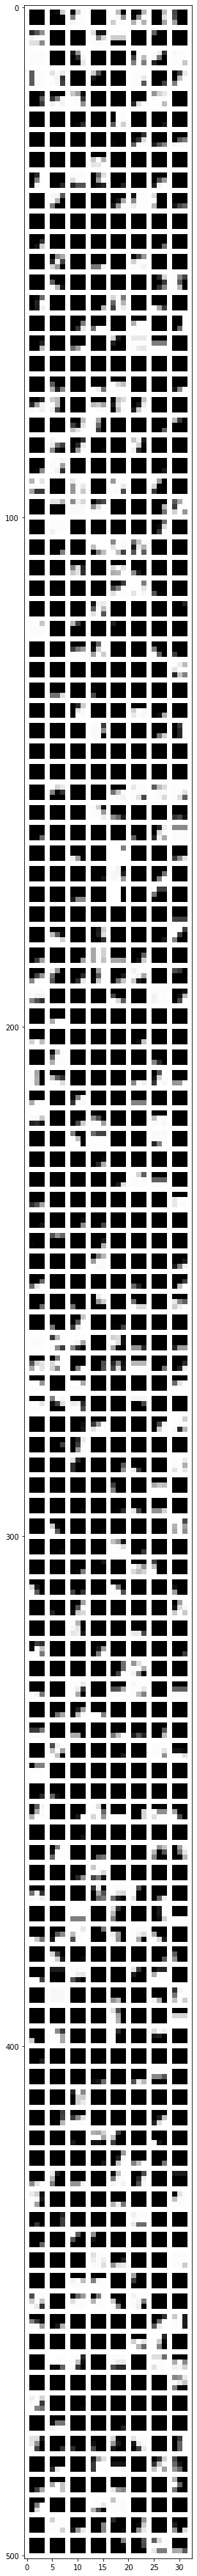

normalized regions:


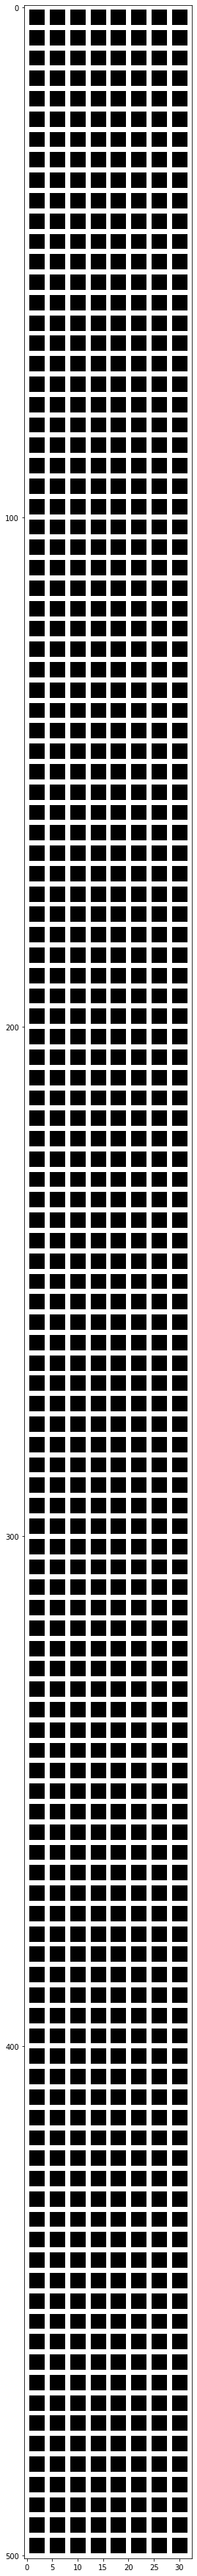

grid regions of 1000 regions more=True or worst=False active for filter number: 5 :


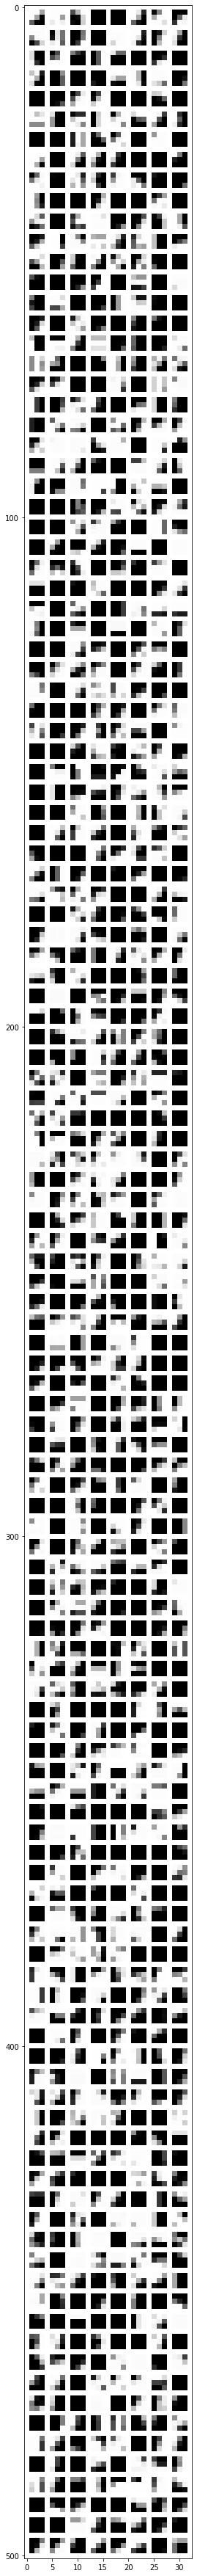

normalized regions:


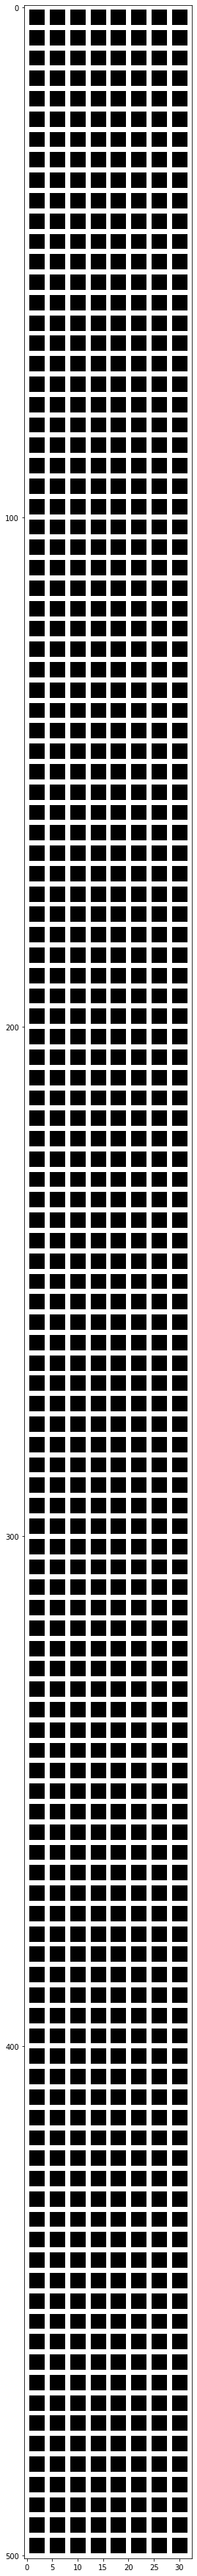

grid regions of 1000 regions more=True or worst=False active for filter number: 6 :


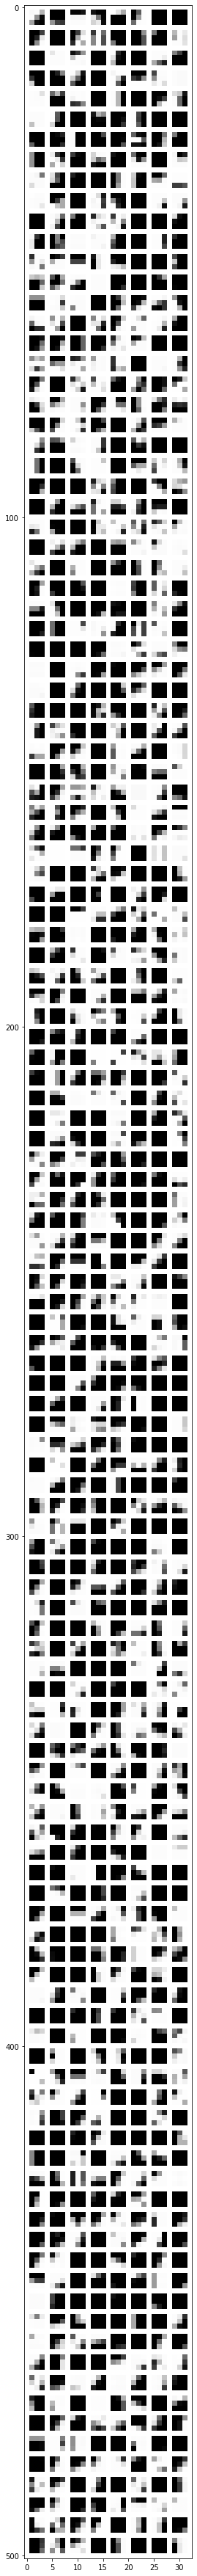

normalized regions:


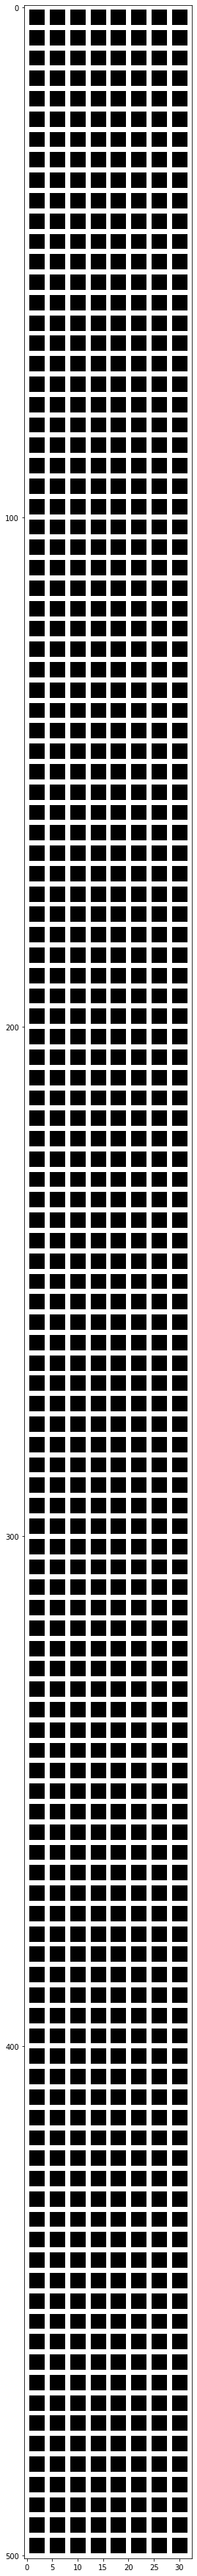

grid regions of 1000 regions more=True or worst=False active for filter number: 7 :


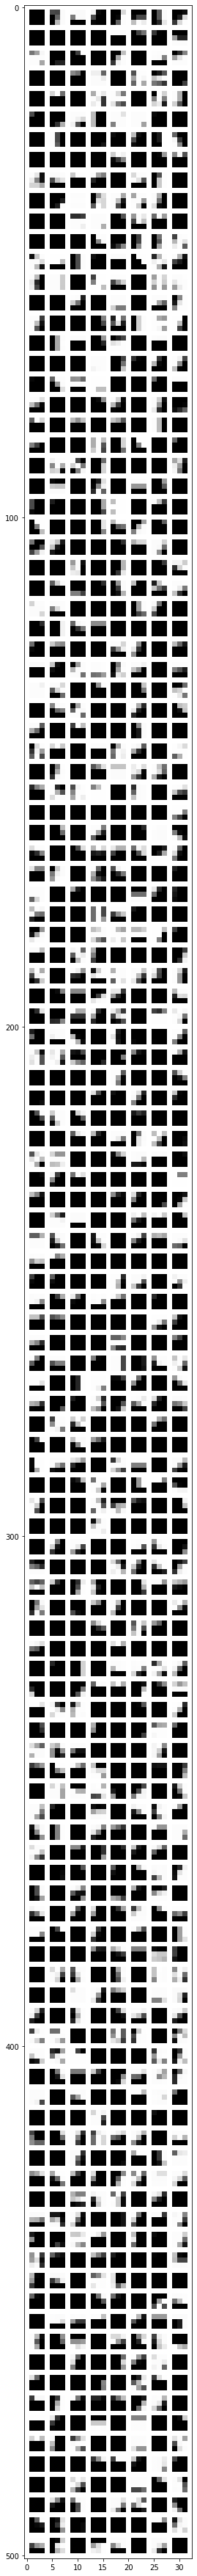

normalized regions:


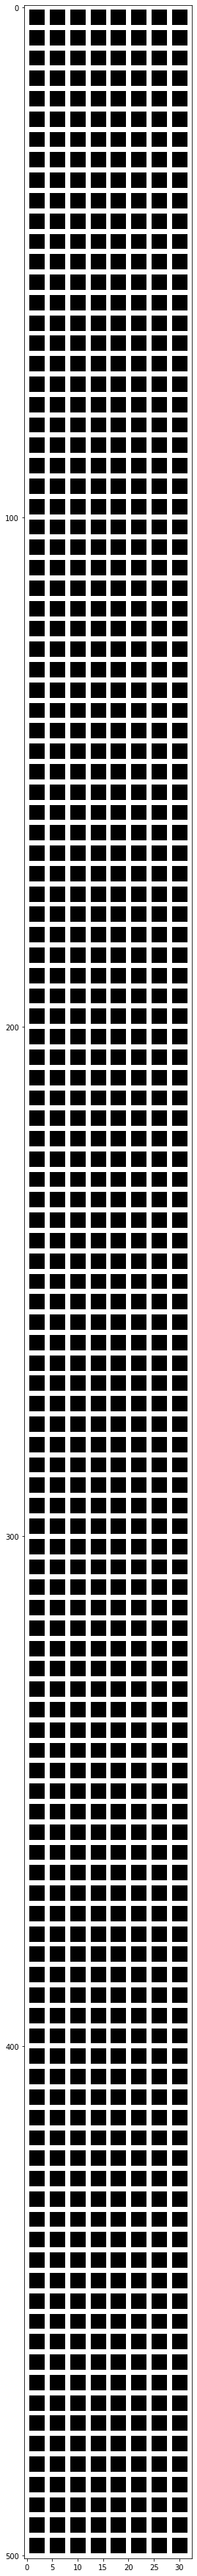

grid regions of 1000 regions more=True or worst=False active for filter number: 8 :


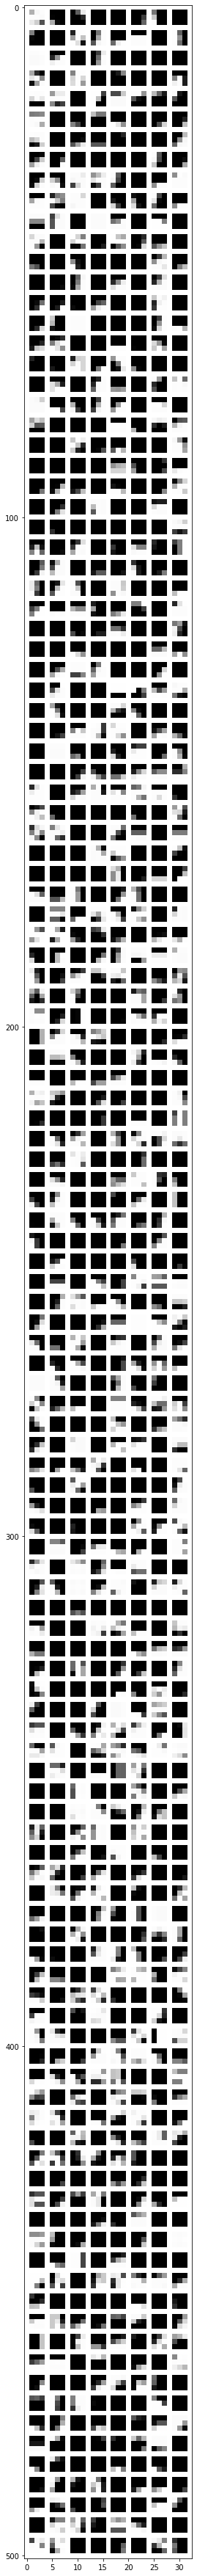

normalized regions:


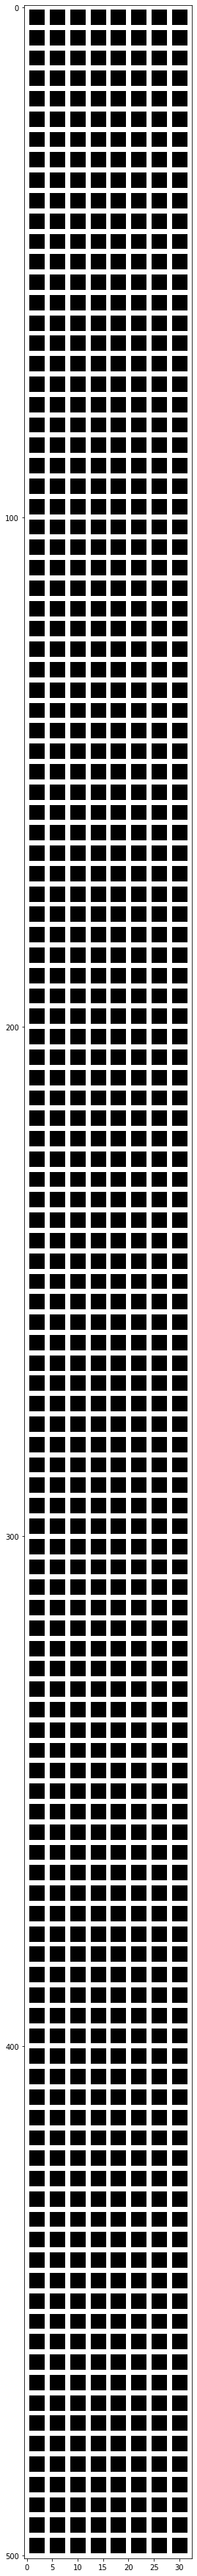

grid regions of 1000 regions more=True or worst=False active for filter number: 9 :


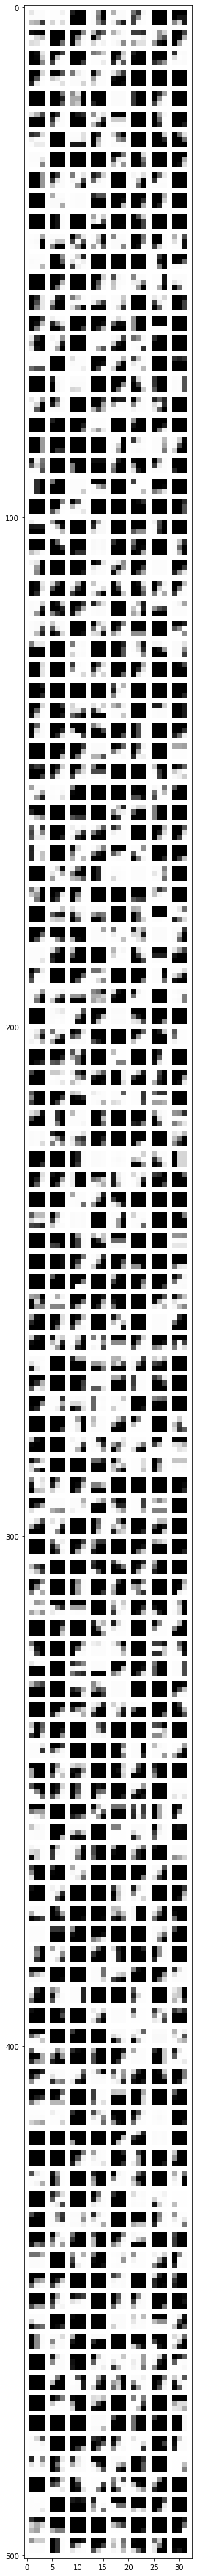

normalized regions:


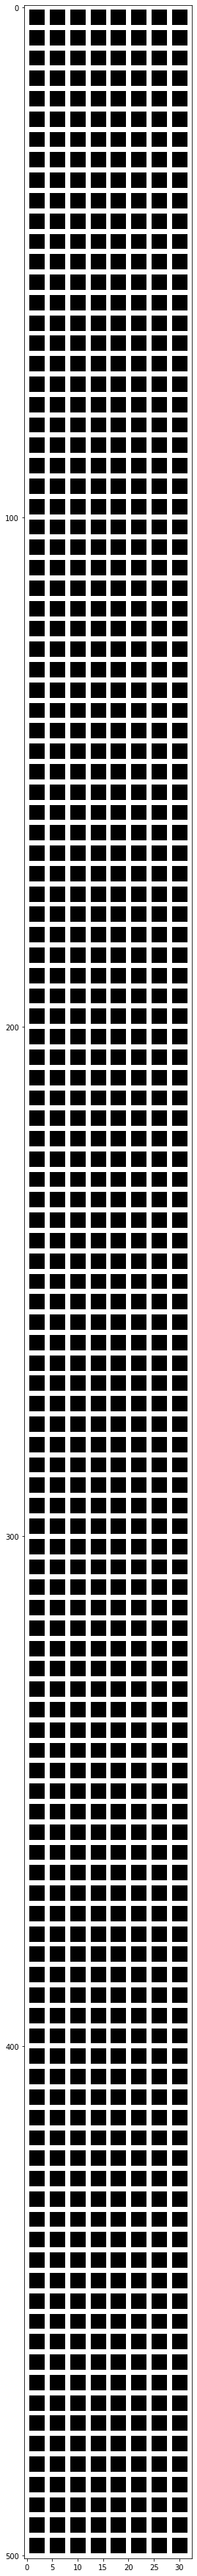

In [0]:
# parameters
list_filter_interest_layer1 = [0,1,2,3,4,5,6,7,8,9]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer1_binary
activations = activation_layer1_binary
activations_normalized = activation_layer1_binary_normalized

selected_regions, activation_values, activation_values_normalized = get_regions_interest(regions, activations, activations_normalized, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer1)

##### Binary model layer2:

In [0]:
# parameters
list_filter_interest_layer2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer2_binary
activations = activation_layer2_binary
activations_normalized = activation_layer2_binary_normalized

selected_regions, activation_values, activation_values_normalized = get_regions_interest(regions, activations, activations_normalized, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer2)

Output hidden; open in https://colab.research.google.com to view.

##### No binary model without bias layer1:

In [0]:
# parameters
list_filter_interest_layer1 = [0,1,2,3,4,5,6,7,8,9]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 1
nrow=14

# regions and activation of interest
regions = region_layer1_no_binary_without_bias
activations = activation_layer1_no_binary_without_bias
activations_normalized = activation_layer1_no_binary_normalized_without_bias

selected_regions, activation_values, activation_values_normalized = get_regions_interest(regions, activations, activations_normalized, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer1, nrow=nrow)

##### No binary model without bias layer2:

In [0]:
# parameters
list_filter_interest_layer2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 1
nrow=14

# regions and activation of interest
regions = region_layer2_no_binary_without_bias
activations = activation_layer2_no_binary_without_bias
activations_normalized = activation_layer2_no_binary_normalized_without_bias

selected_regions, activation_values, activation_values_normalized = get_regions_interest(regions, activations, activations_normalized, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer2, nrow=nrow)

##### Binary model without bias layer1:

In [0]:
# parameters
list_filter_interest_layer1 = [0,1,2,3,4,5,6,7,8,9]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 1
nrow=14

# regions and activation of interest
regions = region_layer1_binary_without_bias
activations = activation_layer1_binary_without_bias
activations_normalized = activation_layer1_binary_normalized_without_bias

selected_regions, activation_values, activation_values_normalized = get_regions_interest(regions, activations, activations_normalized, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer1, nrow=nrow)

##### Binary model without bias layer2:

In [0]:
# parameters
list_filter_interest_layer2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 1
nrow=14

# regions and activation of interest
regions = region_layer2_binary_without_bias
activations = activation_layer2_binary_without_bias
activations_normalized = activation_layer2_binary_normalized_without_bias

selected_regions, activation_values, activation_values_normalized = get_regions_interest(regions, activations, activations_normalized, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer2, nrow=nrow)

# Draft

## Test region's score:

In [0]:
from numpy import linalg as LA

In [0]:
def get_activation(name, activation):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

def test_score_region(model, filter_choice):

  dataiter = iter(train_loader)
  images, _ = dataiter.next()

  index = np.random.randint(0,1000)
  image = images[index]
  print('image test number: {} with shape: {}'.format(index, image.shape))
  plt.imshow(image[0], cmap='gray')
  plt.show()

  activation = {}

  for name, m in model.named_modules():
      if type(m) == nn.Conv2d:
          m.register_forward_hook(get_activation(name, activation))

  out = model(image.unsqueeze(0)) 

  activation_layer1 = activation['layer1'][0]
  activation_layer2 = activation['layer2'][0]

  print('prediction:{}'.format(out.data.numpy().argmax()))       

  filter = filter_choice
  act_max_layer1 = activation_layer1[filter].max()
  print('value activation max for filte {} :{}'.format(filter, act_max_layer1))

  ind_x = int((np.where(activation_layer1[filter] == act_max_layer1)[0])[0]) 
  ind_y = int((np.where(activation_layer1[filter] == act_max_layer1)[1])[0])

  print('index of max value: x: {}, y: {}'.format(ind_x, ind_y))

  name = 'layer1'
  stride = 2
  padding=1
  filter_size=3
  len_img_h=28
  len_img_w=28
  im = image[0]

  region, begin_col, end_col, begin_raw, end_raw = get_region_layer1(im, ind_x, ind_y, name, stride, padding, filter_size, len_img_h, len_img_w, return_all=True)

  print('region extracted: {}'.format(region))
  plt.imshow(region, cmap='gray')
  plt.show()

  random_im = np.uint8(np.random.uniform(0, 255, (28, 28)))/255
  print('random image generated:')
  plt.imshow(random_im, cmap='gray')
  plt.show()

  random_im[begin_col:end_col, begin_raw:end_raw] = region
  plt.imshow(random_im, cmap='gray')
  print('random image generated with region that maximize filter activation:')
  plt.show()

  activation_random_im = {}

  for name, m in model_no_binary.named_modules():
      if type(m) == nn.Conv2d:
          m.register_forward_hook(get_activation(name, activation_random_im))

  random_image = (torch.tensor(random_im.reshape((1,1,28,28))))
  out = model_no_binary(random_image.float())
  activation_layer1_random = activation_random_im['layer1'][0]

  act_max_random = activation_layer1_random[filter].max()

  ind_x_random = int((np.where(activation_layer1_random[filter] == act_max_random)[0])[0]) 
  ind_y_random = int((np.where(activation_layer1_random[filter] == act_max_random)[1])[0])

  activation_value_index_random = activation_layer1_random[filter][ind_x][ind_y]
  activation_value_index = activation_layer1[filter][ind_x][ind_y]

  print('activation max for image: {} with index: x:{}, y:{}'.format(act_max_layer1, ind_x, ind_y))
  print('activation max for random image with region: {} with index: x:{}, y:{}'.format(act_max_random, ind_x_random, ind_y_random))  

  print('activation value for ind_x: {} and ind_y: {} = {}'.format(ind_x, ind_y, activation_value_index))
  print('random activation value for ind_x: {} and ind_y: {} = {}'.format(ind_x_random, ind_y_random, activation_value_index_random))
  
  region_new_random, begin_col, end_col, begin_raw, end_raw = get_region_layer1(random_im, ind_x_random, ind_y_random, name, stride, padding, filter_size, len_img_h, len_img_w, return_all=True)

  plt.imshow(region_new_random, cmap='gray')
  print('region_new_random')
  plt.show()

  return region

image test number: 295 with shape: torch.Size([1, 28, 28])


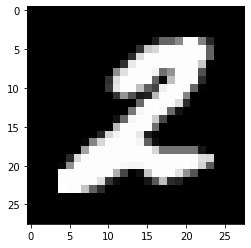

prediction:2
value activation max for filte 9 :0.15805275738239288
index of max value: x: 10, y: 2
region extracted: tensor([[0.0000, 0.0000, 0.1569],
        [0.0000, 0.0314, 0.5725],
        [0.0000, 0.9961, 0.9922]])


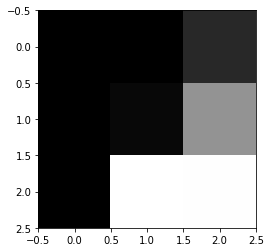

random image generated:


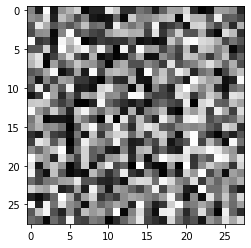

random image generated with region that maximize filter activation:


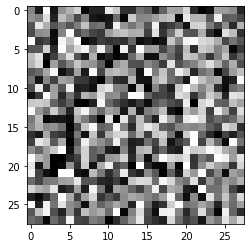

activation max for image: 0.15805275738239288 with index: x:10, y:2
activation max for random image with region: 0.15805275738239288 with index: x:10, y:2
activation value for ind_x: 10 and ind_y: 2 = 0.15805275738239288
random activation value for ind_x: 10 and ind_y: 2 = 0.15805275738239288
region_new_random


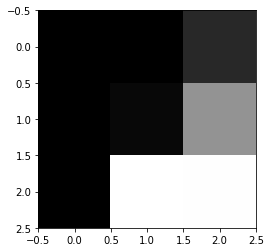

In [0]:
model = model_no_binary
filter_choice = 9

region = test_score_region(model, filter_choice)

## filter value:

In [0]:
for name, m in model_no_binary.named_modules():
    if type(m) == nn.Conv2d:
        filters = m.weight.data.clone()
        break

In [0]:
filters.shape

torch.Size([10, 1, 3, 3])

In [0]:
model_no_binary.layer1.bias

Parameter containing:
tensor([ 0.1957,  0.1620, -0.0787, -0.2980,  0.0367, -0.0169,  0.0877,  0.1401,
        -0.1020, -0.2601], requires_grad=True)

In [0]:
filter_0 = filters[0][0]

In [0]:
print(filter_0)

tensor([[-0.0100,  0.2919,  0.1254],
        [ 0.0844,  0.0426,  0.0630],
        [-0.2353, -0.3480, -0.0394]])


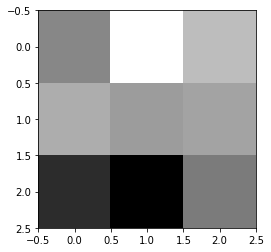

In [0]:
plt.imshow(filter_0, cmap='gray')

Visualization filters learned for layer: layer1


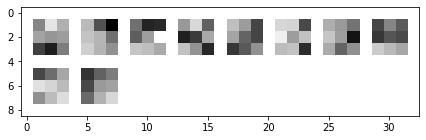

Visualization filters learned for layer: layer2


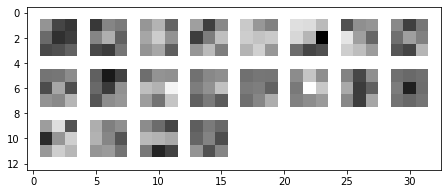

In [0]:
viz_filters(model_no_binary)